# **Business Understanding**

## Judul


Enhancing Retail Management Strategy: Analyzing Sales Prediction and Inventory of Category Bakery Products at Supermarket UK Mart using Time Series Forecasting Method to Boost Revenue

## Context

UK Mart, sebagai pemimpin pasar dalam industri supermarket, telah berhasil mempertahankan posisinya menjadi supermarket dengan pendapatan tertinggi selama tiga tahun berturut-turut. Namun, tantangan yang dihadapi adalah meramalkan penjualan produk dengan akurat untuk meningkatkan keuntungan dan terus mempertahankan dominasinya di pasar. Tingginya variabilitas permintaan dan fluktuasi tren pasar membuat pengambilan keputusan dalam manajemen persediaan dan strategi pemasaran menjadi sulit. Oleh karena itu, langkah-langkah strategis yang tepat harus diambil untuk mengatasi tantangan ini dan memperkuat posisi UK Mart dalam persaingan bisnis yang semakin ketat.

## Problem Statement

Meskipun UK Mart telah mempertahankan posisinya sebagai pemimpin pasar, namun terdapat ketimpangan yang signifikan dalam kontribusi pendapatan dari setiap kategori produk. Salah satu kategori yang mengalami ketimpangan pendapatan yang mencolok adalah kategori bakery. Supermarket ini membutuhkan sistem yang dapat memprediksi penjualan dan persediaan produk mereka dengan tingkat akurasi yang tinggi. Hal ini penting agar mereka dapat mengelola persediaan secara efisien, menghindari kekurangan atau kelebihan stok, dan pada akhirnya meningkatkan keuntungan.

## Goals

Untuk memahami tren dan pola permintaan pelanggan lebih mendalam, analisis dilakukan terhadap pola penjualan produk kategori bakery di UK Mart menggunakan metode time series forecasting. Hasil analisis tersebut kemudian digunakan untuk membuat model prediksi penjualan dan persediaan dengan tingkat akurasi yang tinggi, khususnya untuk kategori bakery. Tujuan dari pembuatan model ini adalah untuk membantu UK Mart merencanakan manajemen persediaan secara lebih efisien. Hasil dari analisis dan model prediksi tersebut kemudian digunakan sebagai dasar untuk menyusun rekomendasi strategis bagi UK Mart. Rekomendasi ini bertujuan untuk memperkuat posisi UK Mart sebagai pemimpin pasar dalam kategori bakery dan meningkatkan keuntungan dari penjualan produk bakery. Dengan demikian, perusahaan dapat mengambil langkah-langkah yang lebih tepat dan efektif dalam mengoptimalkan penjualan dan manajemen persediaan mereka.


## Analytic Approach

Dalam kasus ini, prediksi penjualan dan persediaan produk bakery UK Mart akan dilakukan menggunakan metode forecasting time series. Metode forecasting time series adalah sebuah pendekatan statistik yang digunakan untuk memodelkan dan menganalisis data time series dengan mempertimbangkan hubungan antara variabel dependen (seri waktu yang ingin diprediksi) dengan satu atau lebih variabel independen (variabel prediktor atau covariate) yang berkaitan dengan waktu. Tujuan utama dari forecasting time series adalah untuk membuat prediksi atau estimasi nilai-nilai masa depan dari seri waktu berdasarkan pola dan tren historis serta faktor-faktor lain yang dapat mempengaruhinya.

## Metric Evaluation

Untuk metric evaluation, dapat menggunakan berbagai metrik yang sesuai dengan karakteristik data time series dan tujuan analisis. Salah satu metrik yang umum digunakan adalah Mean Absolute Error (MAE) dan Mean Absolute Percentage Error (MAPE). Dalam konteks peramalan penjualan dan persediaan produk bakery, keduanya bisa memberikan gambaran yang komprehensif tentang kinerja model. MAE memberikan informasi tentang kesalahan absolut dalam unit satuan (misalnya, berapa banyak penjualan yang diprediksi berbeda dari nilai sebenarnya), sementara MAPE memberikan informasi tentang kesalahan relatif dalam persentase (misalnya, berapa persen prediksi penjualan yang berbeda dari nilai sebenarnya). Semakin rendah nilai MAE dan MAPE, semakin baik model dalam memprediksi data time series tersebut.

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set(style='darkgrid', color_codes = True)
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from google.colab import drive
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Akses folder gdrive tim

d1 = pd.read_csv('/content/drive/MyDrive/Dataset 5/CVFamz.csv')
d2 =  pd.read_csv('/content/drive/MyDrive/Dataset 5/CVanyMart.csv')
d3 = pd.read_csv('/content/drive/MyDrive/Dataset 5/ScottishMart.csv')
d4 = pd.read_csv('/content/drive/MyDrive/Dataset 5/BritishMart.csv')
d5 = pd.read_csv('/content/drive/MyDrive/Dataset 5/UKMart.csv')

# **Preprocessing**

### Read data

In [ ]:
d1.head()

nama_toko  harga_pound  harga_per_unit  unit  \
0    CVFamz        45.00           45.00  unit   
1    CVFamz        55.00           55.00  unit   
2    CVFamz        20.00            4.00     m   
3    CVFamz         3.65            0.73  unit   
4    CVFamz        17.00           17.00  unit   

                                                nama kategori brand_sendiri  \
0    TP-Link Tapo C310 Outdoor Security Wi-Fi Camera     home         False   
1                   Amazon Echo Dot 5Th Gen Charcoal     home         False   
2      Energizer UK 3 Pin Smart 5m Flexi Strip Light     home         False   
3  Status Electrical PVC Insulating Tape 10 Metre...     home         False   
4           Wahl Colour Trim Stubble & Beard Trimmer     home         False   

      tanggal  
0  2021-01-01  
1  2021-01-01  
2  2021-01-01  
3  2021-01-01  
4  2021-01-01

In [ ]:
d2.head()

nama_toko  harga_per_unit unit  \
0  CVanyMart             2.9    l   
1  CVanyMart             1.2    l   
2  CVanyMart             1.1    l   
3  CVanyMart             1.1    l   
4  CVanyMart             1.1    l   

                                                nama     tanggal   kategori  \
0           Scentcerity Calming Zen Room Spray 240ml  2021-01-01  household   
1  Almat So Soft Luxurious Fabric Conditioner- Li...  2021-01-02  household   
2  Almat So Soft Fabric Conditioner - Clear Skies...  2021-01-03  household   
3  Almat So Soft Fabric Conditioner - Pure & Gent...  2021-01-04  household   
4    Almat So Soft Sunshine Fabric Conditioner 1.26l  2021-01-05  household   

   brand_sendiri  harga_pound  
0          False     0.690000  
1          False     1.040000  
2          False     1.156667  
3          False     1.215000  
4          False     1.250000

In [ ]:
d3.head()

nama_toko  harga  harga_per_unit  unit                             nama  \
0  ScottishMart   0.40             0.0  unit         Swan Vesta Matches 1 Box   
1  ScottishMart   0.50             0.0  unit            Tesco 200 Cotton Buds   
2  ScottishMart   0.60             0.0  unit             Tesco Nappy Bags 300   
3  ScottishMart   0.75             0.0  unit  Fred & Flo Cotton Buds 300 Pack   
4  ScottishMart   0.98             0.0  unit  Stockwell & Co. Sweeteners 850S   

          kategori  brand_sendiri     tanggal  
0        household          False  2021-01-01  
1  health_products           True  2021-01-01  
2    baby_products           True  2021-01-01  
3    baby_products           True  2021-01-01  
4           drinks           True  2021-01-01

In [ ]:
# Rename kolom 'harga' menjadi 'harga_pound'
d3.rename(columns={'harga': 'harga_pound'}, inplace=True)

# Simpan dataset dengan kolom yang sudah diubah ke file CSV
d3.to_csv('/content/ScottishMart.csv', index=False)

In [ ]:
d3.head()

nama_toko  harga_pound  harga_per_unit  unit  \
0  ScottishMart         0.40             0.0  unit   
1  ScottishMart         0.50             0.0  unit   
2  ScottishMart         0.60             0.0  unit   
3  ScottishMart         0.75             0.0  unit   
4  ScottishMart         0.98             0.0  unit   

                              nama         kategori  brand_sendiri     tanggal  
0         Swan Vesta Matches 1 Box        household          False  2021-01-01  
1            Tesco 200 Cotton Buds  health_products           True  2021-01-01  
2             Tesco Nappy Bags 300    baby_products           True  2021-01-01  
3  Fred & Flo Cotton Buds 300 Pack    baby_products           True  2021-01-01  
4  Stockwell & Co. Sweeteners 850S           drinks           True  2021-01-01

In [ ]:
d4.head()

nama_toko  harga_pound  harga_per_unit unit  \
0  BritishMart         1.35            1.35    l   
1  BritishMart         2.10            2.10    l   
2  BritishMart         1.00            0.70    l   
3  BritishMart         2.10            2.10    l   
4  BritishMart         1.00            0.70    l   

                                 nama kategori  brand_sendiri     tanggal  
0           Alpro Oat Long Life Drink   drinks          False  2021-01-01  
1          Alpro Almond Chilled Drink   drinks          False  2021-01-01  
2    Volvic Touch of Fruit Strawberr…   drinks          False  2021-01-01  
3            Alpro Soya Chilled Drink   drinks          False  2021-01-01  
4  Volvic Touch of Fruit Lemon & Lim…   drinks          False  2021-01-01

In [ ]:
d5.head()

nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri     tanggal  
0          False  2021-01-01  
1          False  2021-01-01  
2          False  2021-01-01  
3           True  2021-01-01  
4           True  2021-01-01

In [ ]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387644 entries, 0 to 1387643
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1387644 non-null  object 
 1   harga_pound     1387644 non-null  float64
 2   harga_per_unit  1387515 non-null  float64
 3   unit            1387515 non-null  object 
 4   nama            1387644 non-null  object 
 5   kategori        1387644 non-null  object 
 6   brand_sendiri   1387644 non-null  bool   
 7   tanggal         1387644 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 75.4+ MB


In [ ]:
d5

nama_toko  harga_pound  harga_per_unit unit  \
0          UKMart         1.50            3.00   kg   
1          UKMart         1.65            0.82    l   
2          UKMart         1.65            0.82    l   
3          UKMart         0.90            0.90   kg   
4          UKMart         1.45            0.64    l   
...           ...          ...             ...  ...   
1387639    UKMart         2.70           14.21   kg   
1387640    UKMart         3.00            5.00   kg   
1387641    UKMart         1.25            5.50   kg   
1387642    UKMart         3.00           30.00   kg   
1387643    UKMart         5.50           19.64   kg   

                                                      nama    kategori  \
0        Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1        Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2        Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                      Sainsbury's Fairtrade Bananas Loose  fresh_food   
4        Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   
...                                                    ...         ...   
1387639                            Jarlsberg Original 190g  fresh_food   
1387640  Sainsbury's Moroccan Spiced Chicken & Chickpea...  fresh_food   
1387641                       Ginsters Cornish Pasty, 227g  fresh_food   
1387642  Sainsbury's British Corned Beef Slices, Taste ...  fresh_food   
1387643  New England Seafood Wild Smoked Haddock Fillet...  fresh_food   

         brand_sendiri     tanggal  
0                False  2021-01-01  
1                False  2021-01-01  
2                False  2021-01-01  
3                 True  2021-01-01  
4                 True  2021-01-01  
...                ...         ...  
1387639          False  2022-04-30  
1387640           True  2022-05-01  
1387641          False  2022-05-02  
1387642           True  2022-05-03  
1387643          False  2022-05-04  

[1387644 rows x 8 columns]

### Missing value

In [ ]:
d1.isnull().sum()

nama_toko           0
harga_pound         4
harga_per_unit    110
unit              110
nama               21
kategori            0
brand_sendiri      21
tanggal             0
dtype: int64

In [ ]:
d2.isnull().sum()

nama_toko         0
harga_per_unit    4
unit              4
nama              0
tanggal           0
kategori          0
brand_sendiri     0
harga_pound       0
dtype: int64

In [ ]:
d3.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    1
unit              1
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

In [ ]:
d4.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

In [ ]:
d5.isnull().sum()

nama_toko           0
harga_pound         0
harga_per_unit    129
unit              129
nama                0
kategori            0
brand_sendiri       0
tanggal             0
dtype: int64

Mengatasi Missing Value dengan menghapus baris: Dipilih karena jumlah nilai yang hilang tidak signifikan dan tidak mempengaruhi analisis secara signifikan, sehingga untuk mengatasi missing value akan dilakukan penghapusan baris yang mengandung nilai yang hilang.

### Handling Missing Value

#### CVFamz

In [ ]:
d1[d1.isnull().any(axis=1)]

nama_toko  harga_pound  harga_per_unit unit  \
10349      CVFamz        35.25             NaN  NaN   
10359      CVFamz         7.80             NaN  NaN   
50690      CVFamz        35.25             NaN  NaN   
50695      CVFamz         7.80             NaN  NaN   
61415      CVFamz        35.25             NaN  NaN   
...           ...          ...             ...  ...   
1253063    CVFamz         3.00             NaN  NaN   
1254655    CVFamz        35.25             NaN  NaN   
1257709    CVFamz         7.80             NaN  NaN   
1277430    CVFamz         3.00             NaN  NaN   
1278490    CVFamz         3.00             NaN  NaN   

                                                      nama         kategori  \
10349           Signature Red Filter Multipack 5x10 Cigars             home   
10359                            Signature Original Cigars             home   
50690           Signature Red Filter Multipack 5x10 Cigars             home   
50695                            Signature Original Cigars             home   
61415           Signature Red Filter Multipack 5x10 Cigars             home   
...                                                    ...              ...   
1253063  Original Source Tingly Mint & Tea Tree Shower ...  health_products   
1254655         Signature Red Filter Multipack 5x10 Cigars             home   
1257709                          Signature Original Cigars             home   
1277430  Original Source Tropical Coconut & Shea Butter...  health_products   
1278490  Original Source Tingly Mint & Tea Tree Shower ...  health_products   

        brand_sendiri     tanggal  
10349           False  2021-01-10  
10359           False  2021-01-10  
50690           False  2021-02-15  
50695           False  2021-02-15  
61415           False  2021-02-24  
...               ...         ...  
1253063         False  2024-01-20  
1254655         False  2024-01-22  
1257709         False  2024-01-24  
1277430         False  2024-02-11  
1278490         False  2024-02-12  

[127 rows x 8 columns]

Total terdapat 127 rows yang memiliki missing value dari data ini. Missing value tersebut berasal dari variabel harga_pound yang berupa total belanja pembeli, harga_per_unit yang berupa harga patokan dari 1 barang, unit yang berupa status unit, dan variabel brand sendiri yaitu apakah barang merupakan brand sendiri atau bukan.

Kemudian dilakukan eksplor nama barang apa saja yang memiliki missing value agar dapat memberi keputusan apakah harus dihapus atau dapat dilakukan imputasi berdasarkan riwayat penjualan sebelumnya.

In [ ]:
d1[d1.isnull().any(axis=1)]['nama'].unique()

array(['Signature Red Filter Multipack 5x10 Cigars',
       'Signature Original Cigars', nan,
       'Original Source Tingly Mint & Tea Tree Shower Refill',
       'Original Source Tropical Coconut & Shea Butter Shower Refill'],
      dtype=object)

Didapatkan 4 nama barang yang memiliki missing value dalam variabel harga_pound, harga_per_unit, brand_sendiri, dan unit.


Kemudian dilakukan pengecekan terhadap seluruh riwayat penjualan berdasarkan tiap barang

##### Barang 1

In [ ]:
barang_terpilih1 = "Signature Red Filter Multipack 5x10 Cigars"
riwayat_barang1 = d1[d1['nama'] == barang_terpilih1]
riwayat_barang1

nama_toko  harga_pound  harga_per_unit unit  \
10349      CVFamz        35.25             NaN  NaN   
50690      CVFamz        35.25             NaN  NaN   
61415      CVFamz        35.25             NaN  NaN   
99451      CVFamz        35.25             NaN  NaN   
116155     CVFamz        35.25             NaN  NaN   
137786     CVFamz        35.25             NaN  NaN   
171837     CVFamz        35.25             NaN  NaN   
212407     CVFamz        35.25             NaN  NaN   
223998     CVFamz        35.25             NaN  NaN   
252421     CVFamz        35.25             NaN  NaN   
280403     CVFamz        35.25             NaN  NaN   
307783     CVFamz        35.25             NaN  NaN   
334735     CVFamz        35.25             NaN  NaN   
364371     CVFamz        35.25             NaN  NaN   
390210     CVFamz        35.25             NaN  NaN   
419802     CVFamz        35.25             NaN  NaN   
446228     CVFamz        35.25             NaN  NaN   
474045     CVFamz        35.25             NaN  NaN   
500286     CVFamz        35.25             NaN  NaN   
527758     CVFamz        35.25             NaN  NaN   
552631     CVFamz        35.25             NaN  NaN   
581560     CVFamz        35.25             NaN  NaN   
608429     CVFamz        35.25             NaN  NaN   
634182     CVFamz        35.25             NaN  NaN   
661674     CVFamz        35.25             NaN  NaN   
689855     CVFamz        35.25             NaN  NaN   
717271     CVFamz        35.25             NaN  NaN   
744189     CVFamz        35.25             NaN  NaN   
767255     CVFamz        35.25             NaN  NaN   
796202     CVFamz        35.25             NaN  NaN   
822062     CVFamz        35.25             NaN  NaN   
851393     CVFamz        35.25             NaN  NaN   
877996     CVFamz        35.25             NaN  NaN   
904725     CVFamz        35.25             NaN  NaN   
930143     CVFamz        35.25             NaN  NaN   
954865     CVFamz        35.25             NaN  NaN   
999674     CVFamz        35.25             NaN  NaN   
1024593    CVFamz        35.25             NaN  NaN   
1052348    CVFamz        35.25             NaN  NaN   
1075561    CVFamz        35.25             NaN  NaN   
1122249    CVFamz        35.25             NaN  NaN   
1128850    CVFamz        35.25             NaN  NaN   
1153536    CVFamz        35.25             NaN  NaN   
1180298    CVFamz        35.25             NaN  NaN   
1205154    CVFamz        35.25             NaN  NaN   
1230949    CVFamz        35.25             NaN  NaN   
1254655    CVFamz        35.25             NaN  NaN   

                                               nama kategori brand_sendiri  \
10349    Signature Red Filter Multipack 5x10 Cigars     home         False   
50690    Signature Red Filter Multipack 5x10 Cigars     home         False   
61415    Signature Red Filter Multipack 5x10 Cigars     home         False   
99451    Signature Red Filter Multipack 5x10 Cigars     home         False   
116155   Signature Red Filter Multipack 5x10 Cigars     home         False   
137786   Signature Red Filter Multipack 5x10 Cigars     home         False   
171837   Signature Red Filter Multipack 5x10 Cigars     home         False   
212407   Signature Red Filter Multipack 5x10 Cigars     home         False   
223998   Signature Red Filter Multipack 5x10 Cigars     home         False   
252421   Signature Red Filter Multipack 5x10 Cigars     home         False   
280403   Signature Red Filter Multipack 5x10 Cigars     home         False   
307783   Signature Red Filter Multipack 5x10 Cigars     home         False   
334735   Signature Red Filter Multipack 5x10 Cigars     home         False   
364371   Signature Red Filter Multipack 5x10 Cigars     home         False   
390210   Signature Red Filter Multipack 5x10 Cigars     home         False   
419802   Signature Red Filter Multipack 5x10 Cigars     home         False   
446228   Signature Red Filter Multipack 5

In [ ]:
riwayat_barang1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 10349 to 1254655
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_toko       47 non-null     object 
 1   harga_pound     47 non-null     float64
 2   harga_per_unit  0 non-null      float64
 3   unit            0 non-null      object 
 4   nama            47 non-null     object 
 5   kategori        47 non-null     object 
 6   brand_sendiri   47 non-null     object 
 7   tanggal         47 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.4+ KB


In [ ]:
riwayat_barang1_toko2 = d2[d2['nama'] == barang_terpilih1]
riwayat_barang1_toko3 = d3[d3['nama'] == barang_terpilih1]
riwayat_barang1_toko4 = d4[d4['nama'] == barang_terpilih1]
riwayat_barang1_toko5 = d5[d5['nama'] == barang_terpilih1]

In [ ]:
riwayat_barang1_toko2

Empty DataFrame
Columns: [nama_toko, harga_per_unit, unit, nama, tanggal, kategori, brand_sendiri, harga_pound]
Index: []

In [ ]:
riwayat_barang1_toko3

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

In [ ]:
riwayat_barang1_toko4

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

In [ ]:
riwayat_barang1_toko5

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

Pada barang Signature Red Filter Multipack 5x10 Cigars tidak ditemukan riwayat penjualan sebelumnya yang menyatakan harga_per_unit dan unit nya, juga tidak ditemukan pada keempat toko lain maka data penjualan tersebut dapat dilakukan penghapusan karena sangat berisiko jika
dilakukan imputasi.

##### Barang 2

In [ ]:
barang_terpilih2 = "Signature Original Cigars"
riwayat_barang2 = d1[d1['nama'] == barang_terpilih2]
riwayat_barang2

nama_toko  harga_pound  harga_per_unit unit  \
10359      CVFamz          7.8             NaN  NaN   
50695      CVFamz          7.8             NaN  NaN   
61420      CVFamz          7.8             NaN  NaN   
99462      CVFamz          7.8             NaN  NaN   
116167     CVFamz          7.8             NaN  NaN   
137795     CVFamz          7.8             NaN  NaN   
171848     CVFamz          7.8             NaN  NaN   
212414     CVFamz          7.8             NaN  NaN   
230445     CVFamz          7.8             NaN  NaN   
258372     CVFamz          7.8             NaN  NaN   
286299     CVFamz          7.8             NaN  NaN   
312675     CVFamz          7.8             NaN  NaN   
340347     CVFamz          7.8             NaN  NaN   
366752     CVFamz          7.8             NaN  NaN   
392827     CVFamz          7.8             NaN  NaN   
422248     CVFamz          7.8             NaN  NaN   
449089     CVFamz          7.8             NaN  NaN   
476536     CVFamz          7.8             NaN  NaN   
502217     CVFamz          7.8             NaN  NaN   
530770     CVFamz          7.8             NaN  NaN   
556289     CVFamz          7.8             NaN  NaN   
584506     CVFamz          7.8             NaN  NaN   
611286     CVFamz          7.8             NaN  NaN   
637752     CVFamz          7.8             NaN  NaN   
664209     CVFamz          7.8             NaN  NaN   
693342     CVFamz          7.8             NaN  NaN   
720773     CVFamz          7.8             NaN  NaN   
747125     CVFamz          7.8             NaN  NaN   
770034     CVFamz          7.8             NaN  NaN   
798636     CVFamz          7.8             NaN  NaN   
824629     CVFamz          7.8             NaN  NaN   
852835     CVFamz          7.8             NaN  NaN   
879933     CVFamz          7.8             NaN  NaN   
907214     CVFamz          7.8             NaN  NaN   
931467     CVFamz          7.8             NaN  NaN   
955794     CVFamz          7.8             NaN  NaN   
1005102    CVFamz          7.8             NaN  NaN   
1030040    CVFamz          7.8             NaN  NaN   
1055308    CVFamz          7.8             NaN  NaN   
1080500    CVFamz          7.8             NaN  NaN   
1102732    CVFamz          7.8             NaN  NaN   
1131728    CVFamz          7.8             NaN  NaN   
1156439    CVFamz          7.8             NaN  NaN   
1183247    CVFamz          7.8             NaN  NaN   
1208644    CVFamz          7.8             NaN  NaN   
1232880    CVFamz          7.8             NaN  NaN   
1257709    CVFamz          7.8             NaN  NaN   

                              nama kategori brand_sendiri     tanggal  
10359    Signature Original Cigars     home         False  2021-01-10  
50695    Signature Original Cigars     home         False  2021-02-15  
61420    Signature Original Cigars     home         False  2021-02-24  
99462    Signature Original Cigars     home         False  2021-03-30  
116167   Signature Original Cigars     home         False  2021-04-14  
137795   Signature Original Cigars     home         False  2021-05-03  
171848   Signature Original Cigars     home         False  2021-06-02  
212414   Signature Original Cigars     home         False  2021-07-08  
230445   Signature Original Cigars     home         False  2021-07-25  
258372   Signature Original Cigars     home         False  2021-08-18  
286299   Signature Original Cigars     home         False  2021-09-12  
312675   Signature Original Cigars     home         False  2021-10-06  
340347   Signature Original Cigars     home         False  2021-10-30  
366752   Signature Original Cigars     home         False  2021-11-23  
392827   Signature Original Cigars     home         False  2021-12-16  
422248   Signature Original Cigars     home         False  2022-01-11  
449089   Signature Original Cigars     home         False  2022-02-04  
476536   Signature Original Cigars     home         False  2022-02-28  

In [ ]:
riwayat_barang2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 10359 to 1257709
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_toko       47 non-null     object 
 1   harga_pound     47 non-null     float64
 2   harga_per_unit  0 non-null      float64
 3   unit            0 non-null      object 
 4   nama            47 non-null     object 
 5   kategori        47 non-null     object 
 6   brand_sendiri   47 non-null     object 
 7   tanggal         47 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.4+ KB


In [ ]:
riwayat_barang2_toko2 = d2[d2['nama'] == barang_terpilih2]
riwayat_barang2_toko3 = d3[d3['nama'] == barang_terpilih2]
riwayat_barang2_toko4 = d4[d4['nama'] == barang_terpilih2]
riwayat_barang2_toko5 = d5[d5['nama'] == barang_terpilih2]

In [ ]:
riwayat_barang2_toko2

Empty DataFrame
Columns: [nama_toko, harga_per_unit, unit, nama, tanggal, kategori, brand_sendiri, harga_pound]
Index: []

In [ ]:
riwayat_barang2_toko3

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

In [ ]:
riwayat_barang2_toko4

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

In [ ]:
riwayat_barang2_toko5

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

Pada barang Signature Original Cigars tidak ditemukan riwayat penjualan sebelumnya yang menyatakan harga_per_unit dan unit nya, juga tidak ditemukan pada keempat toko lain maka data penjualan tersebut dapat dilakukan penghapusan karena sangat berisiko jika
dilakukan imputasi.

##### Barang 3

In [ ]:
barang_terpilih3 = "Original Source Tingly Mint & Tea Tree Shower Refill"
riwayat_barang3 = d1[d1['nama'] == barang_terpilih3]
riwayat_barang3

nama_toko  harga_pound  harga_per_unit unit  \
21332      CVFamz          3.0             3.0    l   
49037      CVFamz          3.0             3.0    l   
60186      CVFamz          3.0             3.0    l   
88546      CVFamz          3.0             3.0    l   
135974     CVFamz          3.0             3.0    l   
162185     CVFamz          3.0             3.0    l   
186409     CVFamz          3.5             3.5    l   
205677     CVFamz          3.5             3.5    l   
241720     CVFamz          3.5             3.5    l   
269959     CVFamz          3.5             3.5    l   
297535     CVFamz          3.5             3.5    l   
324804     CVFamz          3.5             3.5    l   
351607     CVFamz          3.5             3.5    l   
378713     CVFamz          3.5             3.5    l   
406173     CVFamz          3.5             3.5    l   
411728     CVFamz          3.5             3.5    l   
438458     CVFamz          3.5             3.5    l   
493055     CVFamz          3.5             3.5    l   
519482     CVFamz          3.5             3.5    l   
571365     CVFamz          3.5             3.5    l   
573142     CVFamz          3.5             3.5    l   
600399     CVFamz          3.5             3.5    l   
626446     CVFamz          3.5             3.5    l   
653431     CVFamz          3.5             3.5    l   
682317     CVFamz          3.5             3.5    l   
709282     CVFamz          3.5             3.5    l   
736472     CVFamz          3.5             3.5    l   
786302     CVFamz          3.5             3.5    l   
812428     CVFamz          3.5             3.5    l   
814931     CVFamz          3.5             3.5    l   
844149     CVFamz          3.5             3.5    l   
871021     CVFamz          3.5             3.5    l   
899117     CVFamz          3.0             3.0    l   
924358     CVFamz          3.0             3.0    l   
948876     CVFamz          3.0             3.0    l   
994465     CVFamz          3.0             3.0    l   
999066     CVFamz          3.0             3.0    l   
1048489    CVFamz          3.0             3.0    l   
1075113    CVFamz          3.0             3.0    l   
1097302    CVFamz          3.0             NaN  NaN   
1151378    CVFamz          3.0             NaN  NaN   
1203394    CVFamz          3.0             NaN  NaN   
1228734    CVFamz          3.0             NaN  NaN   
1253063    CVFamz          3.0             NaN  NaN   
1278490    CVFamz          3.0             NaN  NaN   

                                                      nama         kategori  \
21332    Original Source Tingly Mint & Tea Tree Shower ...  health_products   
49037    Original Source Tingly Mint & Tea Tree Shower ...  health_products   
60186    Original Source Tingly Mint & Tea Tree Shower ...  health_products   
88546    Original Source Tingly Mint & Tea Tree Shower ...  health_products   
135974   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
162185   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
186409   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
205677   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
241720   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
269959   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
297535   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
324804   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
351607   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
378713   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
406173   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
411728   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
438458   Original Source Tingly Mint & Tea Tree Shower ...  health_products   
493055   Original Source Tingly Mint & Tea Tree Shower 

In [ ]:
riwayat_barang3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 21332 to 1278490
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_toko       45 non-null     object 
 1   harga_pound     45 non-null     float64
 2   harga_per_unit  39 non-null     float64
 3   unit            39 non-null     object 
 4   nama            45 non-null     object 
 5   kategori        45 non-null     object 
 6   brand_sendiri   45 non-null     object 
 7   tanggal         45 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.2+ KB


Berdasarkan dataframe di atas, didapatkan riwayat penjualan sebelumnya dari barang Original Source Tingly Mint & Tea Tree Shower Refill dimana harga_per_unit adalah 3.0 dan unitnya merupakan l. Karena missing value yang hilang adalah harga_per_unit dan unit yang merupakan variabel dengan nilai tetap, maka dapat dilakukan imputasi dengan nilai sebelumnya agar dapat menghilangkan missing value yang ada.

In [ ]:
d1.loc[d1['nama'] == "Original Source Tingly Mint & Tea Tree Shower Refill", 'harga_per_unit'] = d1.loc[d1['nama'] == "Original Source Tingly Mint & Tea Tree Shower Refill", 'harga_per_unit'].fillna(3.0)
d1.loc[d1['nama'] == "Original Source Tingly Mint & Tea Tree Shower Refill", 'unit'] = d1.loc[d1['nama'] == "Original Source Tingly Mint & Tea Tree Shower Refill", 'unit'].fillna('l')
d1.isnull().sum()

nama_toko           0
harga_pound         4
harga_per_unit    104
unit              104
nama               21
kategori            0
brand_sendiri      21
tanggal             0
dtype: int64

##### Barang 4

In [ ]:
barang_terpilih4 = "Original Source Tropical Coconut & Shea Butter Shower Refill"
riwayat_barang4 = d1[d1['nama'] == barang_terpilih4]
riwayat_barang4

nama_toko  harga_pound  harga_per_unit unit  \
21331      CVFamz          3.0             3.0    l   
49036      CVFamz          3.0             3.0    l   
60185      CVFamz          3.0             3.0    l   
88545      CVFamz          3.0             3.0    l   
135973     CVFamz          3.0             3.0    l   
162184     CVFamz          3.0             3.0    l   
186407     CVFamz          3.5             3.5    l   
205675     CVFamz          3.5             3.5    l   
241006     CVFamz          3.5             3.5    l   
269605     CVFamz          3.5             3.5    l   
297182     CVFamz          3.5             3.5    l   
324452     CVFamz          3.5             3.5    l   
351249     CVFamz          3.5             3.5    l   
378381     CVFamz          3.5             3.5    l   
405494     CVFamz          3.5             3.5    l   
436085     CVFamz          3.5             3.5    l   
461900     CVFamz          3.5             3.5    l   
490483     CVFamz          3.5             3.5    l   
544201     CVFamz          3.5             3.5    l   
570746     CVFamz          3.5             3.5    l   
598044     CVFamz          3.5             3.5    l   
624486     CVFamz          3.5             3.5    l   
651494     CVFamz          3.5             3.5    l   
678060     CVFamz          3.5             3.5    l   
706550     CVFamz          3.5             3.5    l   
733923     CVFamz          3.5             3.5    l   
760011     CVFamz          3.5             3.5    l   
784915     CVFamz          3.5             3.5    l   
811828     CVFamz          3.5             3.5    l   
839176     CVFamz          3.5             3.5    l   
842979     CVFamz          3.5             3.5    l   
869280     CVFamz          3.5             3.5    l   
897264     CVFamz          3.0             3.0    l   
922835     CVFamz          3.0             3.0    l   
947286     CVFamz          3.0             3.0    l   
972765     CVFamz          3.0             3.0    l   
998000     CVFamz          3.0             3.0    l   
1047451    CVFamz          3.0             3.0    l   
1074059    CVFamz          3.0             3.0    l   
1121682    CVFamz          3.0             NaN  NaN   
1150366    CVFamz          3.0             NaN  NaN   
1202327    CVFamz          3.0             NaN  NaN   
1227689    CVFamz          3.0             NaN  NaN   
1251987    CVFamz          3.0             NaN  NaN   
1277430    CVFamz          3.0             NaN  NaN   

                                                      nama         kategori  \
21331    Original Source Tropical Coconut & Shea Butter...  health_products   
49036    Original Source Tropical Coconut & Shea Butter...  health_products   
60185    Original Source Tropical Coconut & Shea Butter...  health_products   
88545    Original Source Tropical Coconut & Shea Butter...  health_products   
135973   Original Source Tropical Coconut & Shea Butter...  health_products   
162184   Original Source Tropical Coconut & Shea Butter...  health_products   
186407   Original Source Tropical Coconut & Shea Butter...  health_products   
205675   Original Source Tropical Coconut & Shea Butter...  health_products   
241006   Original Source Tropical Coconut & Shea Butter...  health_products   
269605   Original Source Tropical Coconut & Shea Butter...  health_products   
297182   Original Source Tropical Coconut & Shea Butter...  health_products   
324452   Original Source Tropical Coconut & Shea Butter...  health_products   
351249   Original Source Tropical Coconut & Shea Butter...  health_products   
378381   Original Source Tropical Coconut & Shea Butter...  health_products   
405494   Original Source Tropical Coconut & Shea Butter...  health_products   
436085   Original Source Tropical Coconut & Shea Butter...  health_products   
461900   Original Source Tropical Coconut & Shea Butter...  health_products   
490483   Original Source Tropical Coconut & Shea Butter

In [ ]:
riwayat_barang4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 21331 to 1277430
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_toko       45 non-null     object 
 1   harga_pound     45 non-null     float64
 2   harga_per_unit  39 non-null     float64
 3   unit            39 non-null     object 
 4   nama            45 non-null     object 
 5   kategori        45 non-null     object 
 6   brand_sendiri   45 non-null     object 
 7   tanggal         45 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.2+ KB


Berdasarkan dataframe di atas, didapatkan riwayat penjualan sebelumnya dari barang Original Source Tropical Coconut & Shea Butter Shower Refill dimana harga_per_unit adalah 3.0 dan unitnya merupakan l. Karena missing value yang hilang adalah harga_per_unit dan unit yang merupakan variabel dengan nilai tetap, maka dapat dilakukan imputasi dengan nilai sebelumnya agar dapat menghilangkan missing value yang ada.

In [ ]:
d1.loc[d1['nama'] == "Original Source Tropical Coconut & Shea Butter Shower Refill", 'harga_per_unit'] = d1.loc[d1['nama'] == "Original Source Tropical Coconut & Shea Butter Shower Refill", 'harga_per_unit'].fillna(3.0)
d1.loc[d1['nama'] == "Original Source Tropical Coconut & Shea Butter Shower Refill", 'unit'] = d1.loc[d1['nama'] == "Original Source Tropical Coconut & Shea Butter Shower Refill", 'unit'].fillna('l')
d1.isnull().sum()

nama_toko          0
harga_pound        4
harga_per_unit    98
unit              98
nama              21
kategori           0
brand_sendiri     21
tanggal            0
dtype: int64

Dengan begitu, nilai missing value yang ada hanya tinggal dari Barang 1 dan Barang 2 dengan masing-masing missing value berjumlah 98. Karena kedua barang tersebut tidak memiliki riwayat penjualan sebelumnya maka dapat dilakukan penghapusan baris. Juga dengan variabel nama, brand_sendiri, dan harga_pound.

#### CVanyMart

In [ ]:
d2[d2.isnull().any(axis=1)]

nama_toko  harga_per_unit unit  \
113687  CVanyMart             NaN  NaN   
117875  CVanyMart             NaN  NaN   
231598  CVanyMart             NaN  NaN   
236964  CVanyMart             NaN  NaN   

                                                     nama     tanggal  \
113687  Saxon Biodegradable Toilet Tissue Wipes - Fine...  2022-05-13   
117875  Saxon Biodegradable Toilet Tissue Wipes - Fine...  2021-03-07   
231598  Saxon Biodegradable Toilet Tissue Wipes - Fine...  2022-08-22   
236964  Saxon Biodegradable Toilet Tissue Wipes - Fine...  2021-07-09   

         kategori  brand_sendiri  harga_pound  
113687  household          False        1.434  
117875  household          False        1.230  
231598  household          False        2.246  
236964  household          False        2.774

In [ ]:
d2[d2.isnull().any(axis=1)]['nama'].unique()

array(['Saxon Biodegradable Toilet Tissue Wipes - Fine To Flush'],
      dtype=object)

In [ ]:
barang_terpilih = "Saxon Biodegradable Toilet Tissue Wipes - Fine To Flush"
riwayat_barang = d2[d2['nama'] == barang_terpilih]
riwayat_barang

nama_toko  harga_per_unit unit  \
113687  CVanyMart             NaN  NaN   
117875  CVanyMart             NaN  NaN   
231598  CVanyMart             NaN  NaN   
236964  CVanyMart             NaN  NaN   

                                                     nama     tanggal  \
113687  Saxon Biodegradable Toilet Tissue Wipes - Fine...  2022-05-13   
117875  Saxon Biodegradable Toilet Tissue Wipes - Fine...  2021-03-07   
231598  Saxon Biodegradable Toilet Tissue Wipes - Fine...  2022-08-22   
236964  Saxon Biodegradable Toilet Tissue Wipes - Fine...  2021-07-09   

         kategori  brand_sendiri  harga_pound  
113687  household          False        1.434  
117875  household          False        1.230  
231598  household          False        2.246  
236964  household          False        2.774

CVanyMart tidak memiliki riwayat barang Saxon Biodegradable Toilet Tissue Wipes - Fine To Flush sehingga akan dilakukan penghapusan missing value

#### ScottishMart

In [ ]:
d3[d3.isnull().any(axis=1)]

nama_toko  harga_pound  harga_per_unit unit  \
483945  ScottishMart          0.0             NaN  NaN   

                                                nama       kategori  \
483945  Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   

        brand_sendiri     tanggal  
483945          False  2022-04-28

In [ ]:
riwayat_barang = d3[d3['nama'] == 'Twix Multipack Chocolate Bars Biscuits 9x20g']
riwayat_barang

nama_toko  harga_pound  harga_per_unit unit  \
8042     ScottishMart         2.35            13.1   kg   
32548    ScottishMart         2.35            13.1   kg   
57521    ScottishMart         2.35            13.1   kg   
81402    ScottishMart         2.35            13.1   kg   
103822   ScottishMart         2.35            13.1   kg   
128839   ScottishMart         2.35            13.1   kg   
152901   ScottishMart         2.35            13.1   kg   
175812   ScottishMart         2.35            13.1   kg   
201769   ScottishMart         2.35            13.1   kg   
236959   ScottishMart         2.35            13.1   kg   
250474   ScottishMart         2.35            13.1   kg   
272872   ScottishMart         2.35            13.1   kg   
295250   ScottishMart         2.35            13.1   kg   
321029   ScottishMart         2.35            13.1   kg   
341431   ScottishMart         2.35            13.1   kg   
363336   ScottishMart         2.35            13.1   kg   
387772   ScottishMart         2.35            13.1   kg   
407705   ScottishMart         2.35            13.1   kg   
449918   ScottishMart         2.35            13.1   kg   
461100   ScottishMart         2.35            13.1   kg   
483945   ScottishMart         0.00             NaN  NaN   
501999   ScottishMart         2.35            13.1   kg   
526297   ScottishMart         2.35            13.1   kg   
556570   ScottishMart         2.35            13.1   kg   
575510   ScottishMart         2.35            13.1   kg   
598768   ScottishMart         2.35            13.1   kg   
623193   ScottishMart         2.35            13.1   kg   
651600   ScottishMart         2.35            13.1   kg   
669906   ScottishMart         1.65             9.1   kg   
700628   ScottishMart         1.65             9.1   kg   
721323   ScottishMart         1.65             9.1   kg   
757927   ScottishMart         1.65             9.1   kg   
767655   ScottishMart         1.65             9.1   kg   
787806   ScottishMart         1.65             9.1   kg   
802238   ScottishMart         1.65             9.1   kg   
825348   ScottishMart         1.65             9.1   kg   
852783   ScottishMart         1.65             9.1   kg   
875979   ScottishMart         1.65             9.1   kg   
898492   ScottishMart         1.65             9.1   kg   
923958   ScottishMart         1.65             9.1   kg   
948301   ScottishMart         1.65             9.1   kg   
974993   ScottishMart         1.65             9.1   kg   
999263   ScottishMart         1.65             9.1   kg   
1023091  ScottishMart         1.65             9.1   kg   
1044932  ScottishMart         1.65             9.1   kg   
1070362  ScottishMart         1.65             9.1   kg   
1092480  ScottishMart         1.65             9.1   kg   
1119399  ScottishMart         1.65             9.1   kg   
1143773  ScottishMart         1.65             9.1   kg   

                                                 nama       kategori  \
8042     Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
32548    Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
57521    Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
81402    Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
103822   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
128839   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
152901   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
175812   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
201769   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
236959   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
250474   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
272872   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
295250   Twix Multipack Chocolate Bars Biscuits 9x20g  food_cupboard   
321029   Twix Multipack Chocolate Bars Biscuits 9x20g

In [ ]:
d3.loc[d3['nama'] == "Twix Multipack Chocolate Bars Biscuits 9x20g", 'harga_per_unit'] = d3.loc[d3['nama'] == "Twix Multipack Chocolate Bars Biscuits 9x20g", 'harga_per_unit'].fillna(13.1)
d3.loc[d3['nama'] == "Twix Multipack Chocolate Bars Biscuits 9x20g", 'unit'] = d3.loc[d3['nama'] == "Twix Multipack Chocolate Bars Biscuits 9x20g", 'unit'].fillna('kg')
d3.loc[d3['nama'] == "Twix Multipack Chocolate Bars Biscuits 9x20g", 'harga_pound'] = d3.loc[d3['nama'] == "Twix Multipack Chocolate Bars Biscuits 9x20g", 'harga_pound'].fillna('2.35')
d3.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

#### UKMart

In [ ]:
d5[d5.isnull().any(axis=1)]

nama_toko  harga_pound  harga_per_unit unit  \
3634       UKMart          4.5             NaN  NaN   
16620      UKMart          1.2             NaN  NaN   
32921      UKMart          1.2             NaN  NaN   
35972      UKMart          4.5             NaN  NaN   
82926      UKMart          1.2             NaN  NaN   
...           ...          ...             ...  ...   
1344568    UKMart          4.5             NaN  NaN   
1352612    UKMart          4.5             NaN  NaN   
1368920    UKMart          1.2             NaN  NaN   
1371724    UKMart          4.5             NaN  NaN   
1379057    UKMart          4.5             NaN  NaN   

                                                      nama    kategori  \
3634     Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
16620                  Sainsbury's Hot Cross Bun Loaf 400g      bakery   
32921                  Sainsbury's Hot Cross Bun Loaf 400g      bakery   
35972    Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
82926                  Sainsbury's Hot Cross Bun Loaf 400g      bakery   
...                                                    ...         ...   
1344568  Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
1352612  Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
1368920                Sainsbury's Hot Cross Bun Loaf 400g      bakery   
1371724  Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
1379057  Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   

         brand_sendiri     tanggal  
3634              True  2021-01-04  
16620             True  2021-01-14  
32921             True  2021-01-28  
35972             True  2021-01-30  
82926             True  2021-03-11  
...                ...         ...  
1344568           True  2024-01-25  
1352612           True  2024-02-01  
1368920           True  2024-02-14  
1371724           True  2024-02-17  
1379057           True  2024-02-23  

[129 rows x 8 columns]

Total terdapat 129 rows yang memiliki missing value dari data ini. Missing value tersebut berasal dari variabel harga_per_unit yang berupa harga patokan dari 1 barang dan unit yang berupa status unit (terdiri dari kg, unit, dan l).

Kemudian dilakukan eksplor nama barang apa saja yang memiliki missing value agar dapat memberi keputusan apakah harus dihapus atau dapat dilakukan imputasi berdasarkan riwayat penjualan sebelumnya.

In [ ]:
d5[d5.isnull().any(axis=1)]['nama'].unique()

array(["Sainsbury's Hot Smoked Salmon & Baby Potato Salad, Taste the Difference",
       "Sainsbury's Hot Cross Bun Loaf 400g",
       "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference",
       "Cockburn's Fine White Port 75cl"], dtype=object)

Didapatkan 4 nama barang yang memiliki missing value dalam variabel harga_per_unit dan unit.


Kemudian dilakukan pengecekan terhadap seluruh riwayat penjualan berdasarkan tiap barang

##### Barang 1

In [ ]:
barang_terpilih1 = "Sainsbury's Hot Smoked Salmon & Baby Potato Salad, Taste the Difference"
riwayat_barang1 = d5[d5['nama'] == barang_terpilih1]
riwayat_barang1

nama_toko  harga_pound  harga_per_unit unit  \
3634       UKMart          4.5             NaN  NaN   
35972      UKMart          4.5             NaN  NaN   
84313      UKMart          4.5             NaN  NaN   
108990     UKMart          4.5             NaN  NaN   
140637     UKMart          4.5             NaN  NaN   
163372     UKMart          4.5             NaN  NaN   
193467     UKMart          4.5             NaN  NaN   
200529     UKMart          4.5             NaN  NaN   
238022     UKMart          4.5             NaN  NaN   
266556     UKMart          4.5             NaN  NaN   
291647     UKMart          4.5             NaN  NaN   
320364     UKMart          4.5             NaN  NaN   
342646     UKMart          4.5             NaN  NaN   
393679     UKMart          4.5             NaN  NaN   
422822     UKMart          4.5             NaN  NaN   
451011     UKMart          4.5             NaN  NaN   
480467     UKMart          4.5             NaN  NaN   
507691     UKMart          4.5             NaN  NaN   
537171     UKMart          4.5             NaN  NaN   
564156     UKMart          4.5             NaN  NaN   
591288     UKMart          4.5             NaN  NaN   
597575     UKMart          4.5             NaN  NaN   
625250     UKMart          4.5             NaN  NaN   
656187     UKMart          4.5             NaN  NaN   
683079     UKMart          4.5             NaN  NaN   
734027     UKMart          4.5             NaN  NaN   
760677     UKMart          4.5             NaN  NaN   
792345     UKMart          4.5             NaN  NaN   
821914     UKMart          4.5             NaN  NaN   
851179     UKMart          4.5             NaN  NaN   
877982     UKMart          4.5             NaN  NaN   
907598     UKMart          4.5             NaN  NaN   
932051     UKMart          4.5             NaN  NaN   
960866     UKMart          4.5             NaN  NaN   
988926     UKMart          4.5             NaN  NaN   
1016419    UKMart          4.5             NaN  NaN   
1044535    UKMart          4.5             NaN  NaN   
1071489    UKMart          4.5             NaN  NaN   
1099516    UKMart          4.5             NaN  NaN   
1128003    UKMart          4.5             NaN  NaN   
1156445    UKMart          4.5             NaN  NaN   
1189791    UKMart          4.5             NaN  NaN   
1211500    UKMart          4.5             NaN  NaN   
1239463    UKMart          4.5             NaN  NaN   
1267687    UKMart          4.5             NaN  NaN   
1302737    UKMart          4.5             NaN  NaN   
1324079    UKMart          4.5             NaN  NaN   
1344568    UKMart          4.5             NaN  NaN   
1371724    UKMart          4.5             NaN  NaN   

                                                      nama    kategori  \
3634     Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
35972    Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
84313    Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
108990   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
140637   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
163372   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
193467   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
200529   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
238022   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
266556   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
291647   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
320364   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
342646   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
393679   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
422822   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   
451011   Sainsbury's Hot Smoked Salmon & Baby Potato Sa...  fresh_food   

In [ ]:
riwayat_barang1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 3634 to 1371724
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_toko       49 non-null     object 
 1   harga_pound     49 non-null     float64
 2   harga_per_unit  0 non-null      float64
 3   unit            0 non-null      object 
 4   nama            49 non-null     object 
 5   kategori        49 non-null     object 
 6   brand_sendiri   49 non-null     bool   
 7   tanggal         49 non-null     object 
dtypes: bool(1), float64(2), object(5)
memory usage: 4.2+ KB


In [ ]:
barang_terpilih1 = "Sainsbury's Hot Smoked Salmon & Baby Potato Salad, Taste the Difference"
riwayat_barang1_toko1 = d1[d1['nama'] == barang_terpilih1]
riwayat_barang1_toko2 = d2[d2['nama'] == barang_terpilih1]
riwayat_barang1_toko3 = d3[d3['nama'] == barang_terpilih1]
riwayat_barang1_toko4 = d4[d4['nama'] == barang_terpilih1]

In [ ]:
riwayat_barang1_toko1

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

In [ ]:
riwayat_barang1_toko2

Empty DataFrame
Columns: [nama_toko, harga_per_unit, unit, nama, tanggal, kategori, brand_sendiri, harga_pound]
Index: []

In [ ]:
riwayat_barang1_toko3

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

In [ ]:
riwayat_barang1_toko4

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

Pada barang Sainsbury's Hot Smoked Salmon & Baby Potato Salad, Taste the Difference tidak ditemukan riwayat penjualan sebelumnya yang menyatakan harga_per_unit dan unit nya, juga tidak ditemukan pada keempat toko lain maka data penjualan tersebut dapat dilakukan penghapusan karena sangat berisiko jika
dilakukan imputasi.

##### Barang 2

In [ ]:
barang_terpilih2 = "Sainsbury's Hot Cross Bun Loaf 400g"
riwayat_barang2 = d5[d5['nama'] == barang_terpilih2]
riwayat_barang2

nama_toko  harga_pound  harga_per_unit unit  \
16620      UKMart          1.2             NaN  NaN   
32921      UKMart          1.2             NaN  NaN   
82926      UKMart          1.2             NaN  NaN   
107111     UKMart          1.2             NaN  NaN   
141475     UKMart          1.2             NaN  NaN   
164768     UKMart          1.2             NaN  NaN   
182448     UKMart          1.2             NaN  NaN   
224729     UKMart          1.2             NaN  NaN   
237217     UKMart          1.2             NaN  NaN   
267561     UKMart          1.2             NaN  NaN   
297469     UKMart          1.2             NaN  NaN   
326341     UKMart          1.2             NaN  NaN   
355750     UKMart          1.2             NaN  NaN   
384972     UKMart          1.2             NaN  NaN   
415181     UKMart          1.2             NaN  NaN   
444929     UKMart          1.2             NaN  NaN   
472234     UKMart          1.2             NaN  NaN   
500312     UKMart          1.2             NaN  NaN   
529793     UKMart          1.2             NaN  NaN   
558825     UKMart          1.2             NaN  NaN   
588089     UKMart          1.2             NaN  NaN   
619194     UKMart          1.2             NaN  NaN   
647890     UKMart          1.2             NaN  NaN   
675640     UKMart          1.2             NaN  NaN   
710141     UKMart          1.2             NaN  NaN   
713404     UKMart          1.2             NaN  NaN   
742072     UKMart          1.2             NaN  NaN   
770993     UKMart          1.2             NaN  NaN   
799880     UKMart          1.2             NaN  NaN   
829419     UKMart          1.2             NaN  NaN   
879418     UKMart          1.2             NaN  NaN   
885160     UKMart          1.2             NaN  NaN   
914841     UKMart          1.2             NaN  NaN   
943257     UKMart          1.2             NaN  NaN   
972169     UKMart          1.2             NaN  NaN   
1004736    UKMart          1.2             NaN  NaN   
1031902    UKMart          1.2             NaN  NaN   
1063444    UKMart          1.2             NaN  NaN   
1092769    UKMart          1.2             NaN  NaN   
1128865    UKMart          1.2             NaN  NaN   
1155927    UKMart          1.2             NaN  NaN   
1184246    UKMart          1.2             NaN  NaN   
1214739    UKMart          1.2             NaN  NaN   
1245417    UKMart          1.2             NaN  NaN   
1272278    UKMart          1.2             NaN  NaN   
1275716    UKMart          1.2             NaN  NaN   
1308629    UKMart          1.2             NaN  NaN   
1338103    UKMart          1.2             NaN  NaN   
1368920    UKMart          1.2             NaN  NaN   

                                        nama kategori  brand_sendiri  \
16620    Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
32921    Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
82926    Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
107111   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
141475   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
164768   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
182448   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
224729   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
237217   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
267561   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
297469   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
326341   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
355750   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
384972   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
415181   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
444929   Sainsbury's Hot Cross Bun Loaf 400g   bakery           True   
472234   Sainsbury's Hot Cross Bu

In [ ]:
riwayat_barang2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 16620 to 1368920
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_toko       49 non-null     object 
 1   harga_pound     49 non-null     float64
 2   harga_per_unit  0 non-null      float64
 3   unit            0 non-null      object 
 4   nama            49 non-null     object 
 5   kategori        49 non-null     object 
 6   brand_sendiri   49 non-null     bool   
 7   tanggal         49 non-null     object 
dtypes: bool(1), float64(2), object(5)
memory usage: 4.2+ KB


In [ ]:
barang_terpilih2 = "Sainsbury's Hot Cross Bun Loaf 400g"
riwayat_barang2_toko1 = d1[d1['nama'] == barang_terpilih2]
riwayat_barang2_toko2 = d2[d2['nama'] == barang_terpilih2]
riwayat_barang2_toko3 = d3[d3['nama'] == barang_terpilih2]
riwayat_barang2_toko4 = d4[d4['nama'] == barang_terpilih2]

In [ ]:
riwayat_barang2_toko1

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

In [ ]:
riwayat_barang2_toko2

Empty DataFrame
Columns: [nama_toko, harga_per_unit, unit, nama, tanggal, kategori, brand_sendiri, harga_pound]
Index: []

In [ ]:
riwayat_barang2_toko3

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

In [ ]:
riwayat_barang2_toko4

Empty DataFrame
Columns: [nama_toko, harga_pound, harga_per_unit, unit, nama, kategori, brand_sendiri, tanggal]
Index: []

Sama halnya dengan barang Sainsbury's Hot Smoked Salmon & Baby Potato Salad, tidak ditemukan riwayat penjualan sebelumnya yang menyatakan harga_per_unit dan unit nya dan juga tidak terdapat pada toko lain, maka data penjualan dari barang Sainsbury's Hot Cross Bun Loaf 400g dapat dilakukan penghapusan karena sangat berisiko jika dilakukan imputasi.

##### Barang 3

In [ ]:
barang_terpilih3 = "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference"
riwayat_barang3 = d5[d5['nama'] == barang_terpilih3]
riwayat_barang3

nama_toko  harga_pound  harga_per_unit unit  \
3981       UKMart          4.5            14.2   kg   
36313      UKMart          4.5            14.2   kg   
84420      UKMart          4.5            14.2   kg   
109258     UKMart          4.5            14.2   kg   
140746     UKMart          4.5            14.2   kg   
163626     UKMart          4.5            14.2   kg   
193639     UKMart          4.5            14.2   kg   
200878     UKMart          4.5            14.2   kg   
232378     UKMart          4.5            14.2   kg   
259115     UKMart          4.5            14.2   kg   
283141     UKMart          4.5            14.2   kg   
312039     UKMart          4.5            14.2   kg   
362917     UKMart          4.5            14.2   kg   
396205     UKMart          4.5            14.2   kg   
415454     UKMart          4.5            14.2   kg   
447239     UKMart          4.5            14.2   kg   
475648     UKMart          4.5            14.2   kg   
510024     UKMart          4.5            14.2   kg   
532453     UKMart          4.5            14.2   kg   
558362     UKMart          4.5            14.2   kg   
585321     UKMart          4.5            14.2   kg   
618713     UKMart          4.5            14.2   kg   
647725     UKMart          4.5            14.2   kg   
676258     UKMart          4.5            14.2   kg   
703401     UKMart          4.5            14.2   kg   
724109     UKMart          4.5             NaN  NaN   
751211     UKMart          4.5             NaN  NaN   
783574     UKMart          4.5             NaN  NaN   
814216     UKMart          4.5             NaN  NaN   
843398     UKMart          4.5             NaN  NaN   
869043     UKMart          4.5             NaN  NaN   
897370     UKMart          4.5             NaN  NaN   
935024     UKMart          4.5             NaN  NaN   
948278     UKMart          4.5             NaN  NaN   
976122     UKMart          4.5             NaN  NaN   
1005158    UKMart          4.5             NaN  NaN   
1033743    UKMart          4.5             NaN  NaN   
1059896    UKMart          4.5             NaN  NaN   
1085488    UKMart          4.5             NaN  NaN   
1109267    UKMart          4.5             NaN  NaN   
1136891    UKMart          4.5             NaN  NaN   
1189302    UKMart          4.5             NaN  NaN   
1216690    UKMart          4.5             NaN  NaN   
1219387    UKMart          4.5             NaN  NaN   
1275163    UKMart          4.5             NaN  NaN   
1276768    UKMart          4.5             NaN  NaN   
1330085    UKMart          4.5             NaN  NaN   
1352612    UKMart          4.5             NaN  NaN   
1379057    UKMart          4.5             NaN  NaN   

                                                      nama    kategori  \
3981     Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
36313    Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
84420    Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
109258   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
140746   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
163626   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
193639   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
200878   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
232378   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
259115   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
283141   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
312039   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
362917   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
396205   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
415454   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   
447239   Sainsbury's Spicy Chicken & Puttanesca Pasta S...  fresh_food   

Berdasarkan dataframe di atas, didapatkan riwayat penjualan sebelumnya dari barang Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference dimana harga_per_unit adalah 14.2 dan unitnya merupakan kg. Karena missing value yang hilang adalah harga_per_unit dan unit yang merupakan variabel dengan nilai tetap, maka dapat dilakukan imputasi dengan nilai sebelumnya agar dapat menghilangkan missing value yang ada.

In [ ]:
d5.loc[d5['nama'] == "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference", 'harga_per_unit'] = d5.loc[d5['nama'] == "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference", 'harga_per_unit'].fillna(14.2)
d5.loc[d5['nama'] == "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference", 'unit'] = d5.loc[d5['nama'] == "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference", 'unit'].fillna('kg')
d5.isnull().sum()

nama_toko           0
harga_pound         0
harga_per_unit    105
unit              105
nama                0
kategori            0
brand_sendiri       0
tanggal             0
dtype: int64

##### Barang 4

In [ ]:
barang_terpilih4 = "Cockburn's Fine White Port 75cl"
riwayat_barang4 = d5[d5['nama'] == barang_terpilih4]
riwayat_barang4

nama_toko  harga_pound  harga_per_unit unit  \
12745      UKMart         14.0           18.62    l   
50368      UKMart         14.0           18.62    l   
79775      UKMart         14.0           18.62    l   
112555     UKMart         14.0           18.62    l   
130112     UKMart         14.0           18.62    l   
156262     UKMart         14.0           18.62    l   
196636     UKMart         14.0           18.62    l   
223062     UKMart         14.0           18.62    l   
250054     UKMart         14.0           18.62    l   
279414     UKMart         14.0           18.62    l   
306072     UKMart         14.0           18.62    l   
333604     UKMart         14.0           18.62    l   
361354     UKMart         14.0           18.62    l   
389815     UKMart         14.0           18.62    l   
417153     UKMart         14.0           18.62    l   
443492     UKMart         14.0           18.62    l   
474615     UKMart         14.0           18.62    l   
501814     UKMart         14.0           18.62    l   
528550     UKMart         14.0           18.62    l   
551497     UKMart         14.0           18.62    l   
577920     UKMart         14.0           18.62    l   
608210     UKMart         14.0           18.62    l   
636856     UKMart         14.0           18.62    l   
666702     UKMart         14.0           18.62    l   
694379     UKMart         14.0           18.62    l   
723730     UKMart         14.0           18.62    l   
766711     UKMart         14.0           18.62    l   
777531     UKMart         14.0           18.62    l   
803822     UKMart         14.0           18.62    l   
831787     UKMart         14.0           18.62    l   
856933     UKMart         14.0           18.62    l   
890828     UKMart         14.0           18.62    l   
934958     UKMart         14.0             NaN  NaN   
945077     UKMart         14.0             NaN  NaN   
969953     UKMart         14.0             NaN  NaN   
1000818    UKMart         14.0             NaN  NaN   
1049726    UKMart         14.0             NaN  NaN   
1053309    UKMart         14.0             NaN  NaN   
1081044    UKMart         14.0             NaN  NaN   

                                    nama kategori  brand_sendiri     tanggal  
12745    Cockburn's Fine White Port 75cl   drinks          False  2021-01-11  
50368    Cockburn's Fine White Port 75cl   drinks          False  2021-02-11  
79775    Cockburn's Fine White Port 75cl   drinks          False  2021-03-08  
112555   Cockburn's Fine White Port 75cl   drinks          False  2021-04-04  
130112   Cockburn's Fine White Port 75cl   drinks          False  2021-04-19  
156262   Cockburn's Fine White Port 75cl   drinks          False  2021-05-11  
196636   Cockburn's Fine White Port 75cl   drinks          False  2021-06-13  
223062   Cockburn's Fine White Port 75cl   drinks          False  2021-07-05  
250054   Cockburn's Fine White Port 75cl   drinks          False  2021-07-28  
279414   Cockburn's Fine White Port 75cl   drinks          False  2021-08-21  
306072   Cockburn's Fine White Port 75cl   drinks          False  2021-09-12  
333604   Cockburn's Fine White Port 75cl   drinks          False  2021-10-05  
361354   Cockburn's Fine White Port 75cl   drinks          False  2021-10-28  
389815   Cockburn's Fine White Port 75cl   drinks          False  2021-11-21  
417153   Cockburn's Fine White Port 75cl   drinks          False  2021-12-14  
443492   Cockburn's Fine White Port 75cl   drinks          False  2022-01-05  
474615   Cockburn's Fine White Port 75cl   drinks          False  2022-01-31  
501814   Cockburn's Fine White Port 75cl   drinks          False  2022-02-22  
528550   Cockburn's Fine White Port 75cl   drinks          False  2022-03-17  
551497   Cockburn's Fine White Port 75cl   drinks          False  2022-04-05  
577920   Cockburn's Fine White Port 75cl   drinks          False  2022-04-27  
608210   Cockburn's Fine White Port 75cl   drinks          False  202

Berdasarkan dataframe di atas, sama seperti barang Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference, didapatkan riwayat penjualan sebelumnya dari barang Cockburn's Fine White Port 75cl dimana harga_per_unit adalah 14.2 dan unitnya merupakan kg. Karena missing value yang hilang adalah harga_per_unit dan unit yang merupakan variabel dengan nilai tetap, maka dapat dilakukan imputasi dengan nilai sebelumnya agar dapat menghilangkan missing value yang ada.

In [ ]:
d5.loc[d5['nama'] == "Cockburn's Fine White Port 75cl", 'harga_per_unit'] = d5.loc[d5['nama'] == "Cockburn's Fine White Port 75cl", 'harga_per_unit'].fillna(18.62)
d5.loc[d5['nama'] == "Cockburn's Fine White Port 75cl", 'unit'] = d5.loc[d5['nama'] == "Cockburn's Fine White Port 75cl", 'unit'].fillna('l')
d5.isnull().sum()

nama_toko          0
harga_pound        0
harga_per_unit    98
unit              98
nama               0
kategori           0
brand_sendiri      0
tanggal            0
dtype: int64

Dengan begitu, nilai missing value yang ada hanya tinggal dari Barang 1 dan Barang 2 dengan masing-masing missing value berjumlah 49. Karena kedua barang tersebut tidak memiliki riwayat penjualan sebelumnya maka dapat dilakukan penghapusan baris.

#### Drop Missing Value

In [ ]:
# Handle missing value
d1.dropna(inplace=True)
d2.dropna(inplace=True)
d3.dropna(inplace=True)
d4.dropna(inplace=True)
d5.dropna(inplace=True)

In [ ]:
# Setelah handling
d1.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

In [ ]:
d2.isnull().sum()

nama_toko         0
harga_per_unit    0
unit              0
nama              0
tanggal           0
kategori          0
brand_sendiri     0
harga_pound       0
dtype: int64

In [ ]:
d3.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

In [ ]:
d4.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

In [ ]:
d5.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
kategori          0
brand_sendiri     0
tanggal           0
dtype: int64

Setelah dilakukan penghapusan missing value, dapat diperhatikan bahwa tidak ada lagi data yang mengandung missing value.

### Duplicate Data

In [ ]:
d5[d5.duplicated()]

nama_toko  harga_pound  harga_per_unit  unit  \
141513     UKMart         0.90            0.90    kg   
141516     UKMart         0.89            0.89  unit   
141517     UKMart         0.99            0.99    kg   
141518     UKMart         2.19            2.19    kg   
141519     UKMart         0.55            0.55  unit   
...           ...          ...             ...   ...   
1387532    UKMart        19.00           25.27     l   
1387577    UKMart         0.55            2.80    kg   
1387596    UKMart         2.50            3.33    kg   
1387603    UKMart         3.25           13.00    kg   
1387629    UKMart         2.90            0.48  unit   

                                          nama       kategori  brand_sendiri  \
141513     Sainsbury's Fairtrade Bananas Loose     fresh_food           True   
141516              Sainsbury's Whole Cucumber     fresh_food           True   
141517                Sainsbury's Onions Loose     fresh_food           True   
141518              Sainsbury's Broccoli Loose     fresh_food           True   
141519                  Sainsbury's Red Pepper     fresh_food           True   
...                                        ...            ...            ...   
1387532    Reata Sonoma Coast Chardonnay 750ml         drinks          False   
1387577             Sainsbury's Fig Rolls 200g  food_cupboard           True   
1387596   Sainsbury's Salt & Pepper Chips 750g         frozen           True   
1387603  Sainsbury's Smoked Bacon Lardons 250g     fresh_food           True   
1387629        St Ewe Free Range Large Eggs x6     fresh_food          False   

            tanggal  
141513   2021-04-28  
141516   2021-04-28  
141517   2021-04-28  
141518   2021-04-28  
141519   2021-04-28  
...             ...  
1387532  2022-01-13  
1387577  2022-02-27  
1387596  2022-03-18  
1387603  2022-03-25  
1387629  2022-04-20  

[427 rows x 8 columns]

Berdasarkan hasil checking duplicate di atas, data duplikat terjadi karena mungkin adanya kesamaan transaksi dengan pembeli yang berbeda. Data yang keluar **bukan** merupakan data yang benar-benar terduplikasi, melainkan data penjualan dengan kategori yang sama dan brand sendiri yang sama yang terjadi di hari yang sama. Data juga tidak memiliki transaksi ID. Oleh karena itu, karena khawatir akan mempengaruhi distribusi data maka tidak akan dilakukan handle duplikat data.

### Outlier

In [ ]:
# harga_pound
Q1_harga_pound = d1['harga_pound'].quantile(0.25)
Q3_harga_pound = d1['harga_pound'].quantile(0.75)
IQR_harga_pound = Q3_harga_pound - Q1_harga_pound

# harga_per_unit
Q1_harga_per_unit = d1['harga_per_unit'].quantile(0.25)
Q3_harga_per_unit = d1['harga_per_unit'].quantile(0.75)
IQR_harga_per_unit = Q3_harga_per_unit - Q1_harga_per_unit

# Batas bawah dan batas atas untuk outliers
lower_bound_harga_pound = Q1_harga_pound - 1.5 * IQR_harga_pound
upper_bound_harga_pound = Q3_harga_pound + 1.5 * IQR_harga_pound

lower_bound_harga_per_unit = Q1_harga_per_unit - 1.5 * IQR_harga_per_unit
upper_bound_harga_per_unit = Q3_harga_per_unit + 1.5 * IQR_harga_per_unit

# Identifikasi outliers untuk setiap kolom
outliers_harga_pound = d1[(d1['harga_pound'] < lower_bound_harga_pound) | (d1['harga_pound'] > upper_bound_harga_pound)]
outliers_harga_per_unit = d1[(d1['harga_per_unit'] < lower_bound_harga_per_unit) | (d1['harga_per_unit'] > upper_bound_harga_per_unit)]

# Tangani outliers
d1 = d1[
    (d1['harga_pound'] >= lower_bound_harga_pound) & (d1['harga_pound'] <= upper_bound_harga_pound) &
    (d1['harga_per_unit'] >= lower_bound_harga_per_unit) & (d1['harga_per_unit'] <= upper_bound_harga_per_unit)].reset_index(drop=True)
d1

nama_toko  harga_pound  harga_per_unit  unit  \
0          CVFamz         3.65            0.73  unit   
1          CVFamz         3.00            3.00  unit   
2          CVFamz         9.00            9.00  unit   
3          CVFamz         8.00            8.00  unit   
4          CVFamz        12.00           12.00  unit   
...           ...          ...             ...   ...   
1059245    CVFamz         2.99            2.99  unit   
1059246    CVFamz         8.00            8.00  unit   
1059247    CVFamz         8.00            8.00  unit   
1059248    CVFamz         6.00            6.00  unit   
1059249    CVFamz         5.00           28.20     l   

                                                      nama kategori  \
0        Status Electrical PVC Insulating Tape 10 Metre...     home   
1                         George Home Nose and Ear Trimmer     home   
2                                     George Beard Trimmer     home   
3                                    George Detail Trimmer     home   
4                                        Remington Trimmer     home   
...                                                    ...      ...   
1059245  Decathlon White Essential Cycling Water Bottle...   drinks   
1059246                Polar Gear Silver Star Combo Cooler   drinks   
1059247                Polar Gear Pup Friends Combo Cooler   drinks   
1059248     Eco Wix Ombre Grey Spa Waters Large Jar Candle   drinks   
1059249  OGX Argan Oil of Morocco Miracle Water Conditi...   drinks   

        brand_sendiri     tanggal  
0               False  2021-01-01  
1                True  2021-01-01  
2                True  2021-01-01  
3                True  2021-01-01  
4               False  2021-01-01  
...               ...         ...  
1059245         False  2023-08-19  
1059246         False  2023-08-20  
1059247         False  2023-08-22  
1059248         False  2023-08-23  
1059249         False  2023-08-25  

[1059250 rows x 8 columns]

In [ ]:
# harga_pound
Q1_harga_pound = d2['harga_pound'].quantile(0.25)
Q3_harga_pound = d2['harga_pound'].quantile(0.75)
IQR_harga_pound = Q3_harga_pound - Q1_harga_pound

# harga_per_unit
Q1_harga_per_unit = d2['harga_per_unit'].quantile(0.25)
Q3_harga_per_unit = d2['harga_per_unit'].quantile(0.75)
IQR_harga_per_unit = Q3_harga_per_unit - Q1_harga_per_unit

# Batas bawah dan batas atas untuk outliers
lower_bound_harga_pound = Q1_harga_pound - 1.5 * IQR_harga_pound
upper_bound_harga_pound = Q3_harga_pound + 1.5 * IQR_harga_pound

lower_bound_harga_per_unit = Q1_harga_per_unit - 1.5 * IQR_harga_per_unit
upper_bound_harga_per_unit = Q3_harga_per_unit + 1.5 * IQR_harga_per_unit

# Identifikasi outliers untuk setiap kolom
outliers_harga_pound = d2[(d2['harga_pound'] < lower_bound_harga_pound) | (d2['harga_pound'] > upper_bound_harga_pound)]
outliers_harga_per_unit = d2[(d2['harga_per_unit'] < lower_bound_harga_per_unit) | (d2['harga_per_unit'] > upper_bound_harga_per_unit)]

# Tangani outliers
d2 = d2[
    (d2['harga_pound'] >= lower_bound_harga_pound) & (d2['harga_pound'] <= upper_bound_harga_pound) &
    (d2['harga_per_unit'] >= lower_bound_harga_per_unit) & (d2['harga_per_unit'] <= upper_bound_harga_per_unit)].reset_index(drop=True)
d2

nama_toko  harga_per_unit unit  \
0       CVanyMart             2.9    l   
1       CVanyMart             1.2    l   
2       CVanyMart             1.1    l   
3       CVanyMart             1.1    l   
4       CVanyMart             1.1    l   
...           ...             ...  ...   
209903  CVanyMart            10.0   kg   
209904  CVanyMart             3.9   kg   
209905  CVanyMart             3.3   kg   
209906  CVanyMart             3.9   kg   
209907  CVanyMart             3.9   kg   

                                                     nama     tanggal  \
0                Scentcerity Calming Zen Room Spray 240ml  2021-01-01   
1       Almat So Soft Luxurious Fabric Conditioner- Li...  2021-01-02   
2       Almat So Soft Fabric Conditioner - Clear Skies...  2021-01-03   
3       Almat So Soft Fabric Conditioner - Pure & Gent...  2021-01-04   
4         Almat So Soft Sunshine Fabric Conditioner 1.26l  2021-01-05   
...                                                   ...         ...   
209903            Vitacat Pawsome Pockets With Salmon 65g  2022-02-25   
209904        Vitacat Select Tender Pâté With Salmon 100g  2022-02-26   
209905   Earls Select Tender Pâté With Beef & Turkey 150g  2022-02-27   
209906          Vitacat Select Tender Pâté With Beef 100g  2022-02-28   
209907          Vitacat Select With Chicken In Jelly 100g  2022-03-01   

         kategori  brand_sendiri  harga_pound  
0       household          False     0.690000  
1       household          False     1.040000  
2       household          False     1.156667  
3       household          False     1.215000  
4       household          False     1.250000  
...           ...            ...          ...  
209903       pets          False     0.754000  
209904       pets          False     0.614000  
209905       pets          False     0.582000  
209906       pets          False     0.522000  
209907       pets          False     0.462000  

[209908 rows x 8 columns]

In [ ]:
# harga_pound
Q1_harga_pound = d3['harga_pound'].quantile(0.25)
Q3_harga_pound = d3['harga_pound'].quantile(0.75)
IQR_harga_pound = Q3_harga_pound - Q1_harga_pound

# harga_per_unit
Q1_harga_per_unit = d3['harga_per_unit'].quantile(0.25)
Q3_harga_per_unit = d3['harga_per_unit'].quantile(0.75)
IQR_harga_per_unit = Q3_harga_per_unit - Q1_harga_per_unit

# Batas bawah dan batas atas untuk outliers
lower_bound_harga_pound = Q1_harga_pound - 1.5 * IQR_harga_pound
upper_bound_harga_pound = Q3_harga_pound + 1.5 * IQR_harga_pound

lower_bound_harga_per_unit = Q1_harga_per_unit - 1.5 * IQR_harga_per_unit
upper_bound_harga_per_unit = Q3_harga_per_unit + 1.5 * IQR_harga_per_unit

# Identifikasi outliers untuk setiap kolom
outliers_harga_pound = d3[(d3['harga_pound'] < lower_bound_harga_pound) | (d3['harga_pound'] > upper_bound_harga_pound)]
outliers_harga_per_unit = d3[(d3['harga_per_unit'] < lower_bound_harga_per_unit) | (d3['harga_per_unit'] > upper_bound_harga_per_unit)]

# Tangani outliers
d3 = d3[
    (d3['harga_pound'] >= lower_bound_harga_pound) & (d3['harga_pound'] <= upper_bound_harga_pound) &
    (d3['harga_per_unit'] >= lower_bound_harga_per_unit) & (d3['harga_per_unit'] <= upper_bound_harga_per_unit)].reset_index(drop=True)
d3

nama_toko  harga_pound  harga_per_unit  unit  \
0       ScottishMart         0.40            0.00  unit   
1       ScottishMart         0.50            0.00  unit   
2       ScottishMart         0.60            0.00  unit   
3       ScottishMart         0.75            0.00  unit   
4       ScottishMart         0.98            0.00  unit   
...              ...          ...             ...   ...   
962303  ScottishMart         7.20            0.06  unit   
962304  ScottishMart         2.40            2.40  unit   
962305  ScottishMart         4.80            4.80     l   
962306  ScottishMart         3.00            3.00  unit   
962307  ScottishMart         3.00           10.90     l   

                                                     nama         kategori  \
0                                Swan Vesta Matches 1 Box        household   
1                                   Tesco 200 Cotton Buds  health_products   
2                                    Tesco Nappy Bags 300    baby_products   
3                         Fred & Flo Cotton Buds 300 Pack    baby_products   
4                         Stockwell & Co. Sweeteners 850S           drinks   
...                                                   ...              ...   
962303    Tesco Health 120 M/Vits& Cod Liver Oil Capsules  health_products   
962304                  Truyu Trio Nail Files Medium/Fine  health_products   
962305  Sanex Expert Skin Health Sensitive Shower Gel ...  health_products   
962306             Safe And Sound Twin Travel Bottles 50G  health_products   
962307  Pantene Pro-V Hydrating Glow Quenching Hair Co...  health_products   

        brand_sendiri     tanggal  
0               False  2021-01-01  
1                True  2021-01-01  
2                True  2021-01-01  
3                True  2021-01-01  
4                True  2021-01-01  
...               ...         ...  
962303           True  2021-05-21  
962304          False  2021-05-23  
962305          False  2021-05-24  
962306          False  2021-05-25  
962307          False  2021-05-28  

[962308 rows x 8 columns]

In [ ]:
# harga_pound
Q1_harga_pound = d4['harga_pound'].quantile(0.25)
Q3_harga_pound = d4['harga_pound'].quantile(0.75)
IQR_harga_pound = Q3_harga_pound - Q1_harga_pound

# harga_per_unit
Q1_harga_per_unit = d4['harga_per_unit'].quantile(0.25)
Q3_harga_per_unit = d4['harga_per_unit'].quantile(0.75)
IQR_harga_per_unit = Q3_harga_per_unit - Q1_harga_per_unit

# Batas bawah dan batas atas untuk outliers
lower_bound_harga_pound = Q1_harga_pound - 1.5 * IQR_harga_pound
upper_bound_harga_pound = Q3_harga_pound + 1.5 * IQR_harga_pound

lower_bound_harga_per_unit = Q1_harga_per_unit - 1.5 * IQR_harga_per_unit
upper_bound_harga_per_unit = Q3_harga_per_unit + 1.5 * IQR_harga_per_unit

# Identifikasi outliers untuk setiap kolom
outliers_harga_pound = d4[(d4['harga_pound'] < lower_bound_harga_pound) | (d4['harga_pound'] > upper_bound_harga_pound)]
outliers_harga_per_unit = d4[(d4['harga_per_unit'] < lower_bound_harga_per_unit) | (d4['harga_per_unit'] > upper_bound_harga_per_unit)]

# Tangani outliers
d4 = d4[
    (d4['harga_pound'] >= lower_bound_harga_pound) & (d4['harga_pound'] <= upper_bound_harga_pound) &
    (d4['harga_per_unit'] >= lower_bound_harga_per_unit) & (d4['harga_per_unit'] <= upper_bound_harga_per_unit)].reset_index(drop=True)
d4

nama_toko  harga_pound  harga_per_unit  unit  \
0       BritishMart         1.35            1.35     l   
1       BritishMart         2.10            2.10     l   
2       BritishMart         1.00            0.70     l   
3       BritishMart         2.10            2.10     l   
4       BritishMart         1.00            0.70     l   
...             ...          ...             ...   ...   
813532  BritishMart         7.50            7.50  unit   
813533  BritishMart         2.00            2.00  unit   
813534  BritishMart         9.50            9.50  unit   
813535  BritishMart         3.00            3.00  unit   
813536  BritishMart         2.00            2.00  unit   

                                              nama kategori  brand_sendiri  \
0                        Alpro Oat Long Life Drink   drinks          False   
1                       Alpro Almond Chilled Drink   drinks          False   
2                 Volvic Touch of Fruit Strawberr…   drinks          False   
3                         Alpro Soya Chilled Drink   drinks          False   
4               Volvic Touch of Fruit Lemon & Lim…   drinks          False   
...                                            ...      ...            ...   
813532   Morrisons Wooden Look Vacuum Bottle 500Ml     home           True   
813533        Morrisons Wooden Plaque Sweet Cheeks     home           True   
813534    Morrisons Wooden Rectangular Paddleboard     home           True   
813535                     Morrisons Wooden Turner     home           True   
813536  Talking Tables Metallic Gold Slogan Napkin     home          False   

           tanggal  
0       2021-01-01  
1       2021-01-01  
2       2021-01-01  
3       2021-01-01  
4       2021-01-01  
...            ...  
813532  2022-02-24  
813533  2022-02-25  
813534  2022-02-26  
813535  2022-02-27  
813536  2022-02-28  

[813537 rows x 8 columns]

In [ ]:
# harga_pound
Q1_harga_pound = d5['harga_pound'].quantile(0.25)
Q3_harga_pound = d5['harga_pound'].quantile(0.75)
IQR_harga_pound = Q3_harga_pound - Q1_harga_pound

# harga_per_unit
Q1_harga_per_unit = d5['harga_per_unit'].quantile(0.25)
Q3_harga_per_unit = d5['harga_per_unit'].quantile(0.75)
IQR_harga_per_unit = Q3_harga_per_unit - Q1_harga_per_unit

# Batas bawah dan batas atas untuk outliers
lower_bound_harga_pound = Q1_harga_pound - 1.5 * IQR_harga_pound
upper_bound_harga_pound = Q3_harga_pound + 1.5 * IQR_harga_pound

lower_bound_harga_per_unit = Q1_harga_per_unit - 1.5 * IQR_harga_per_unit
upper_bound_harga_per_unit = Q3_harga_per_unit + 1.5 * IQR_harga_per_unit

# Identifikasi outliers untuk setiap kolom
outliers_harga_pound = d5[(d5['harga_pound'] < lower_bound_harga_pound) | (d5['harga_pound'] > upper_bound_harga_pound)]
outliers_harga_per_unit = d5[(d5['harga_per_unit'] < lower_bound_harga_per_unit) | (d5['harga_per_unit'] > upper_bound_harga_per_unit)]

# Tangani outliers
d5 = d5[
    (d5['harga_pound'] >= lower_bound_harga_pound) & (d5['harga_pound'] <= upper_bound_harga_pound) &
    (d5['harga_per_unit'] >= lower_bound_harga_per_unit) & (d5['harga_per_unit'] <= upper_bound_harga_per_unit)].reset_index(drop=True)
d5

nama_toko  harga_pound  harga_per_unit unit  \
0          UKMart         1.50            3.00   kg   
1          UKMart         1.65            0.82    l   
2          UKMart         1.65            0.82    l   
3          UKMart         0.90            0.90   kg   
4          UKMart         1.45            0.64    l   
...           ...          ...             ...  ...   
1158415    UKMart         2.70           14.21   kg   
1158416    UKMart         3.00            5.00   kg   
1158417    UKMart         1.25            5.50   kg   
1158418    UKMart         3.00           30.00   kg   
1158419    UKMart         5.50           19.64   kg   

                                                      nama    kategori  \
0        Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1        Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2        Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                      Sainsbury's Fairtrade Bananas Loose  fresh_food   
4        Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   
...                                                    ...         ...   
1158415                            Jarlsberg Original 190g  fresh_food   
1158416  Sainsbury's Moroccan Spiced Chicken & Chickpea...  fresh_food   
1158417                       Ginsters Cornish Pasty, 227g  fresh_food   
1158418  Sainsbury's British Corned Beef Slices, Taste ...  fresh_food   
1158419  New England Seafood Wild Smoked Haddock Fillet...  fresh_food   

         brand_sendiri     tanggal  
0                False  2021-01-01  
1                False  2021-01-01  
2                False  2021-01-01  
3                 True  2021-01-01  
4                 True  2021-01-01  
...                ...         ...  
1158415          False  2022-04-30  
1158416           True  2022-05-01  
1158417          False  2022-05-02  
1158418           True  2022-05-03  
1158419          False  2022-05-04  

[1158420 rows x 8 columns]

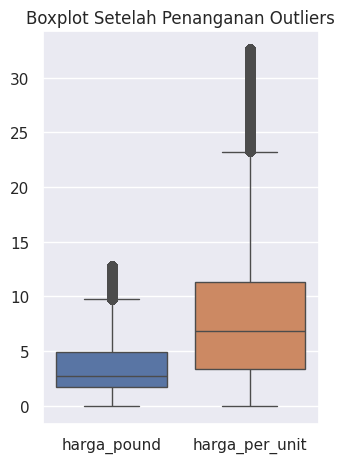

In [ ]:
# Data setelah outliers ditangani
plt.subplot(1, 2, 2)
sns.boxplot(data=d5[['harga_pound', 'harga_per_unit']], orient='v')
plt.title('Boxplot Setelah Penanganan Outliers')

plt.tight_layout()
plt.show()

Alasan menggunakan metode IQR
1. Penggunaan IQR: Metode IQR adalah salah satu pendekatan yang umum digunakan untuk menangani outlier dalam data numerik. Ini melibatkan perhitungan kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data, kemudian menghitung jarak antara kuartil ketiga dan kuartil pertama (IQR).
2. Menentukan Batas Atas dan Bawah: Setelah IQR dihitung, batas atas dan batas bawah ditentukan dengan mengalikan IQR dengan faktor tertentu (biasanya 1.5 atau 3) dan menambahkannya atau mengurangkannya dari kuartil ketiga dan kuartil pertama, secara berturut-turut.
3. Identifikasi Outlier: Setelah batas atas dan batas bawah ditentukan, outlier dapat diidentifikasi dengan memeriksa nilai-nilai di luar rentang batas tersebut.
4. Penanganan Outlier: Syntax kemudian membuang baris-baris yang mengandung outlier dari DataFrame d1-0d5, dan kemudian mengembalikan DataFrame yang telah ditangani outlier, yang diatur ulang indeksnya.

### Scaling

Kami memutuskan untuk tidak melakukan scaling karena kedua kolom numerik 'harga_pound' dan 'harga_per_unit' dalam dataset d5 kami anggap sebagai variabel target yang akan diprediksi atau dianalisis secara langsung.  Variabel target yang telah di-scaling dapat mengalami distorsi yang tidak diinginkan. Scaling dapat mengubah distribusi nilai asli variabel target, yang dapat memengaruhi interpretasi dan performa model prediksi. Dalam kasus ini, mempertahankan skala asli variabel target memungkinkan model untuk menghasilkan prediksi yang lebih akurat dan mudah diinterpretasikan.

# **EDA**

In [ ]:
# Karena feature-feature di kelima toko sudah sama, maka akan dilakukan merging dataset untuk eksplorasi seluruh toko
all_data = pd.concat([d1, d2, d3, d4, d5], ignore_index=True)

In [ ]:
all_data

nama_toko  harga_pound  harga_per_unit  unit  \
0          CVFamz         3.65            0.73  unit   
1          CVFamz         3.00            3.00  unit   
2          CVFamz         9.00            9.00  unit   
3          CVFamz         8.00            8.00  unit   
4          CVFamz        12.00           12.00  unit   
...           ...          ...             ...   ...   
4203418    UKMart         2.70           14.21    kg   
4203419    UKMart         3.00            5.00    kg   
4203420    UKMart         1.25            5.50    kg   
4203421    UKMart         3.00           30.00    kg   
4203422    UKMart         5.50           19.64    kg   

                                                      nama    kategori  \
0        Status Electrical PVC Insulating Tape 10 Metre...        home   
1                         George Home Nose and Ear Trimmer        home   
2                                     George Beard Trimmer        home   
3                                    George Detail Trimmer        home   
4                                        Remington Trimmer        home   
...                                                    ...         ...   
4203418                            Jarlsberg Original 190g  fresh_food   
4203419  Sainsbury's Moroccan Spiced Chicken & Chickpea...  fresh_food   
4203420                       Ginsters Cornish Pasty, 227g  fresh_food   
4203421  Sainsbury's British Corned Beef Slices, Taste ...  fresh_food   
4203422  New England Seafood Wild Smoked Haddock Fillet...  fresh_food   

        brand_sendiri     tanggal  
0               False  2021-01-01  
1                True  2021-01-01  
2                True  2021-01-01  
3                True  2021-01-01  
4               False  2021-01-01  
...               ...         ...  
4203418         False  2022-04-30  
4203419          True  2022-05-01  
4203420         False  2022-05-02  
4203421          True  2022-05-03  
4203422         False  2022-05-04  

[4203423 rows x 8 columns]

In [ ]:
all_data['nama_toko'].unique()

array(['CVFamz', 'CVanyMart', 'ScottishMart', 'BritishMart', 'UKMart'],
      dtype=object)

In [ ]:
first_data_per_toko = all_data.groupby('nama_toko')['tanggal'].min()
first_data_per_toko

nama_toko
BritishMart     2021-01-01
CVFamz          2021-01-01
CVanyMart       2021-01-01
ScottishMart    2021-01-01
UKMart          2021-01-01
Name: tanggal, dtype: object

In [ ]:
latest_data_per_toko = all_data.groupby('nama_toko')['tanggal'].max()
latest_data_per_toko

nama_toko
BritishMart     2024-02-29
CVFamz          2024-02-29
CVanyMart       2024-02-29
ScottishMart    2024-02-29
UKMart          2024-02-29
Name: tanggal, dtype: object

## Total Penjualan Seluruh Toko

In [ ]:
import pandas as pd

# Hitung total harga penjualan dari masing-masing dataframe
total_penjualan_d1 = d1['harga_pound'].sum()
total_penjualan_d2 = d2['harga_pound'].sum()
total_penjualan_d3 = d3['harga_pound'].sum()
total_penjualan_d4 = d4['harga_pound'].sum()
total_penjualan_d5 = d5['harga_pound'].sum()

# Buat dataframe baru dengan total harga penjualan dari kedua dataframe
df_total_penjualan = pd.DataFrame({
    'Toko': ['CVFamz', 'CVanyMart', 'ScottishMart', 'BritishMart', 'UKMart'],
    'Total Penjualan (Pound)': [total_penjualan_d1, total_penjualan_d2, total_penjualan_d3, total_penjualan_d4, total_penjualan_d5]
})

# Bulatkan total penjualan menjadi dua angka di belakang koma
df_total_penjualan['Total Penjualan (Pound)'] = df_total_penjualan['Total Penjualan (Pound)'].round(2)

# Urutkan dataframe berdasarkan total penjualan terbesar
df_total_penjualan_sorted = df_total_penjualan.sort_values(by='Total Penjualan (Pound)', ascending=False)

# Tampilkan dataframe baru yang sudah diurutkan
df_total_penjualan_sorted

Toko  Total Penjualan (Pound)
4        UKMart               4273244.65
0        CVFamz               3765541.94
2  ScottishMart               3309411.62
3   BritishMart               2696994.83
1     CVanyMart                382676.22

Total penjualan tertinggi dalam rentang waktu Januari 2023 - Februari 2024 terjadi di UK Mart sementara total penjualan terendah tercatat di CVanyMart.

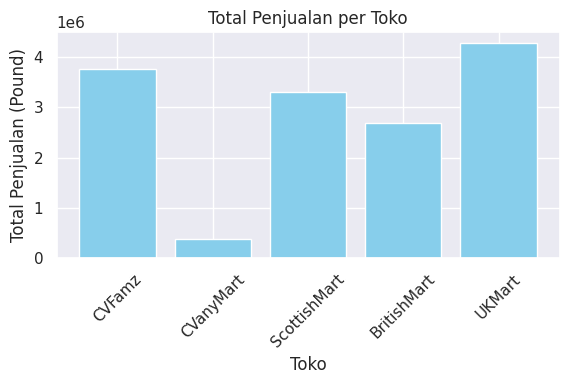

In [ ]:
import matplotlib.pyplot as plt

# Data
toko = df_total_penjualan['Toko']
total_penjualan = df_total_penjualan['Total Penjualan (Pound)']

# Membuat grafik
plt.figure(figsize=(6, 4))
plt.bar(toko, total_penjualan, color='skyblue')
plt.title('Total Penjualan per Toko')
plt.xlabel('Toko')
plt.ylabel('Total Penjualan (Pound)')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

Data kelima toko merupakan data penjualan dari bulan Januari 2021 sampai dengan Februari 2024. Selama waktu tersebut, toko yang paling banyak penjualannya adalah UK Mart. Artinya, UK Mart mendapati posisi pasar pertama dari kelima toko.

## Visualisasi Total Penjualan Seluruh Toko per Tahun

In [ ]:
all_data['tanggal'] = pd.to_datetime(all_data['tanggal'])
all_data['Year'] = all_data['tanggal'].dt.year
all_data['Month'] = all_data['tanggal'].dt.month
all_data['Day'] = all_data['tanggal'].dt.day
all_data['Month_Year'] = pd.to_datetime(all_data['Month'].astype(str) + '-' + all_data['Year'].astype(str))

In [ ]:
all_data.head()

nama_toko  harga_pound  harga_per_unit  unit  \
0    CVFamz         3.65            0.73  unit   
1    CVFamz         3.00            3.00  unit   
2    CVFamz         9.00            9.00  unit   
3    CVFamz         8.00            8.00  unit   
4    CVFamz        12.00           12.00  unit   

                                                nama kategori brand_sendiri  \
0  Status Electrical PVC Insulating Tape 10 Metre...     home         False   
1                   George Home Nose and Ear Trimmer     home          True   
2                               George Beard Trimmer     home          True   
3                              George Detail Trimmer     home          True   
4                                  Remington Trimmer     home         False   

     tanggal  Year  Month  Day Month_Year  
0 2021-01-01  2021      1    1 2021-01-01  
1 2021-01-01  2021      1    1 2021-01-01  
2 2021-01-01  2021      1    1 2021-01-01  
3 2021-01-01  2021      1    1 2021-01-01  
4 2021-01-01  2021      1    1 2021-01-01

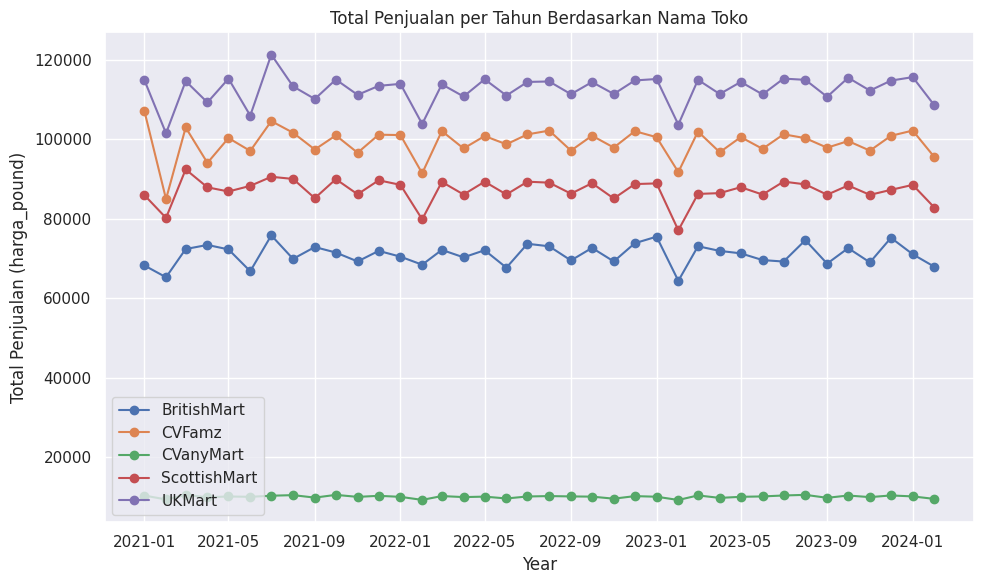

In [ ]:
# Kelompokkan data berdasarkan nama toko dan tahun
toko_yearly_sales = all_data.groupby(['nama_toko', 'Month_Year'])['harga_pound'].sum().reset_index()

# Plot grafik garis
plt.figure(figsize=(10, 6))

for toko in toko_yearly_sales['nama_toko'].unique():
    toko_data = toko_yearly_sales[toko_yearly_sales['nama_toko'] == toko]
    plt.plot(toko_data['Month_Year'], toko_data['harga_pound'], marker='o', label=toko)

plt.xlabel('Year')
plt.ylabel('Total Penjualan (harga_pound)')
plt.title('Total Penjualan per Tahun Berdasarkan Nama Toko')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Total Penjualan per tahun dari masing - masing toko memiliki pola yang hampir sama kecuali pada toko CVannyMarts. Meskipun UK Mart merupakan market leader, akan tetapi ia memiliki kompetitor yang dapat membuat posisinya terancam yaitu CVFamz

## Total Penjualan Seluruh Toko per Kategori

In [ ]:
total_penjualan_per_toko_per_kategori = all_data.groupby(['nama_toko', 'kategori'])['harga_pound'].sum()

# Ubah hasil perhitungan harga menjadi dua angka di belakang koma
total_penjualan_per_toko_per_kategori = total_penjualan_per_toko_per_kategori.round(2)

total_penjualan_per_toko_per_kategori

nama_toko     kategori       
BritishMart   baby_products       90051.29
              bakery              40515.14
              drinks             431837.32
              food_cupboard      449559.86
              free-from           38351.00
              fresh_food         286998.56
              frozen             121606.52
              health_products    432704.59
              home               513910.26
              household          162053.35
              pets               129406.94
CVFamz        baby_products      139436.58
              bakery              85628.60
              drinks             396523.58
              food_cupboard      513441.09
              free-from           76086.30
              fresh_food         511183.64
              frozen              82509.28
              health_products    594497.11
              home               896181.95
              household          333325.22
              pets               136728.59
CVanyMart     baby_produ

Interpretasi hasil di atas:

UK Mart memiliki berbagai kategori yang berkontribusi terhadap total penjualannya dimana kategori yang memiliki kontribusi terbesar adalah health produk dan kategori bakery merupakan yang terendah

## Total Penjualan Kategori Bakery Seluruh Toko per Tahun

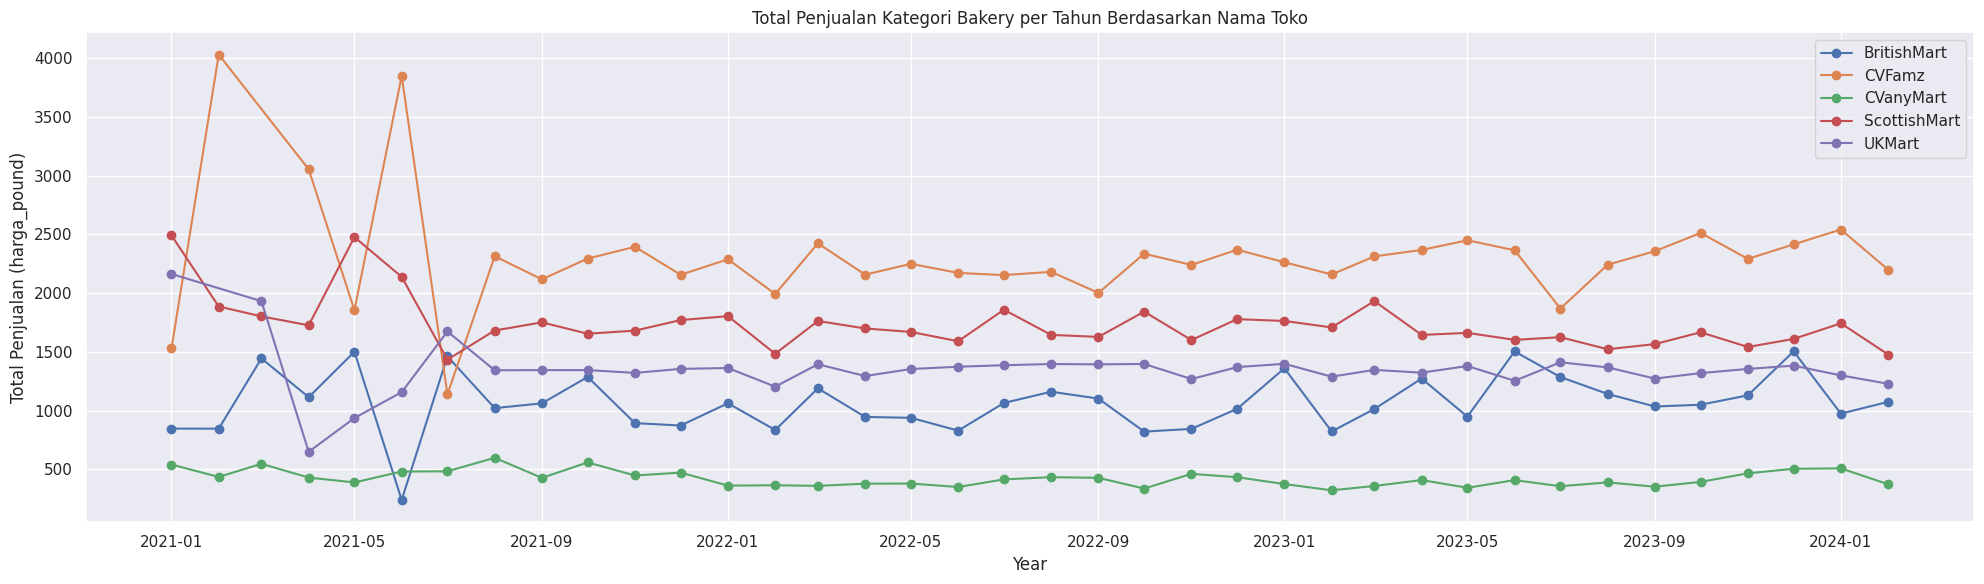

In [ ]:
# Filter data untuk kategori bakery
all_data_bakery = all_data[all_data['kategori'] == 'bakery']

# Kelompokkan data berdasarkan nama toko dan tahun
toko_yearly_sales = all_data_bakery.groupby(['nama_toko', 'Month_Year'])['harga_pound'].sum().reset_index()

# Plot grafik garis
plt.figure(figsize=(20, 6))

for toko in toko_yearly_sales['nama_toko'].unique():
    toko_data = toko_yearly_sales[toko_yearly_sales['nama_toko'] == toko]
    plt.plot(toko_data['Month_Year'], toko_data['harga_pound'], marker='o', label=toko)

plt.xlabel('Year')
plt.ylabel('Total Penjualan (harga_pound)')
plt.title('Total Penjualan Kategori Bakery per Tahun Berdasarkan Nama Toko')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretasi hasil di atas:

Khusus untuk kategori bakery, posisi UK Mart berada di peringkat ketiga yang dimana pola penjualannya cenderung konstan meskipun pernah mengalami penurunan di tahun 2021

In [ ]:
all_data['Jumlah_unit'] = all_data['harga_pound'] / all_data['harga_per_unit']

In [ ]:
all_data

nama_toko  harga_pound  harga_per_unit  unit  \
0          CVFamz         3.65            0.73  unit   
1          CVFamz         3.00            3.00  unit   
2          CVFamz         9.00            9.00  unit   
3          CVFamz         8.00            8.00  unit   
4          CVFamz        12.00           12.00  unit   
...           ...          ...             ...   ...   
4203418    UKMart         2.70           14.21    kg   
4203419    UKMart         3.00            5.00    kg   
4203420    UKMart         1.25            5.50    kg   
4203421    UKMart         3.00           30.00    kg   
4203422    UKMart         5.50           19.64    kg   

                                                      nama    kategori  \
0        Status Electrical PVC Insulating Tape 10 Metre...        home   
1                         George Home Nose and Ear Trimmer        home   
2                                     George Beard Trimmer        home   
3                                    George Detail Trimmer        home   
4                                        Remington Trimmer        home   
...                                                    ...         ...   
4203418                            Jarlsberg Original 190g  fresh_food   
4203419  Sainsbury's Moroccan Spiced Chicken & Chickpea...  fresh_food   
4203420                       Ginsters Cornish Pasty, 227g  fresh_food   
4203421  Sainsbury's British Corned Beef Slices, Taste ...  fresh_food   
4203422  New England Seafood Wild Smoked Haddock Fillet...  fresh_food   

        brand_sendiri    tanggal  Year  Month  Day Month_Year  Jumlah_unit  
0               False 2021-01-01  2021      1    1 2021-01-01     5.000000  
1                True 2021-01-01  2021      1    1 2021-01-01     1.000000  
2                True 2021-01-01  2021      1    1 2021-01-01     1.000000  
3                True 2021-01-01  2021      1    1 2021-01-01     1.000000  
4               False 2021-01-01  2021      1    1 2021-01-01     1.000000  
...               ...        ...   ...    ...  ...        ...          ...  
4203418         False 2022-04-30  2022      4   30 2022-04-01     0.190007  
4203419          True 2022-05-01  2022      5    1 2022-05-01     0.600000  
4203420         False 2022-05-02  2022      5    2 2022-05-01     0.227273  
4203421          True 2022-05-03  2022      5    3 2022-05-01     0.100000  
4203422         False 2022-05-04  2022      5    4 2022-05-01     0.280041  

[4203423 rows x 13 columns]

In [ ]:
# Filter data untuk kategori bakery
all_data_bakery = all_data[all_data['kategori'] == 'bakery']

# Hitung total penjualan kategori bakery untuk setiap toko, tahun, dan unit
bakery_demand = all_data_bakery.groupby(['nama_toko', 'Year', 'unit'])['Jumlah_unit'].sum().reset_index()

# Tampilkan informasi permintaan kategori bakery di setiap toko berdasarkan tahun
print(bakery_demand)

       nama_toko  Year  unit   Jumlah_unit
0    BritishMart  2021    kg   1005.171911
1    BritishMart  2021  unit  20823.393036
2    BritishMart  2022    kg    889.442823
3    BritishMart  2022  unit  18687.617703
4    BritishMart  2023    kg   1035.262300
5    BritishMart  2023  unit  22656.688283
6    BritishMart  2024    kg    131.753488
7    BritishMart  2024  unit   2682.952762
8         CVFamz  2021    kg   1201.728433
9         CVFamz  2021     l      8.500000
10        CVFamz  2021  unit           NaN
11        CVFamz  2022    kg   1249.067897
12        CVFamz  2022     l     11.500000
13        CVFamz  2022  unit           NaN
14        CVFamz  2023    kg   1306.959900
15        CVFamz  2023     l      2.000000
16        CVFamz  2023  unit           NaN
17        CVFamz  2024    kg    215.207106
18        CVFamz  2024  unit           NaN
19     CVanyMart  2021    kg    835.987097
20     CVanyMart  2021  unit           NaN
21     CVanyMart  2022    kg    719.687794
22     CVan

Interpretasi hasil di atas:

UK Mart dalam menjual produk berkategori bakery hanya menjual produk dalam satuan unit kg dan unit sama seperti toko lainnya kecuali toko CVFamz

## Visualisasi Permintaan Kategori Bakery Berdasarkan Unit/Kg

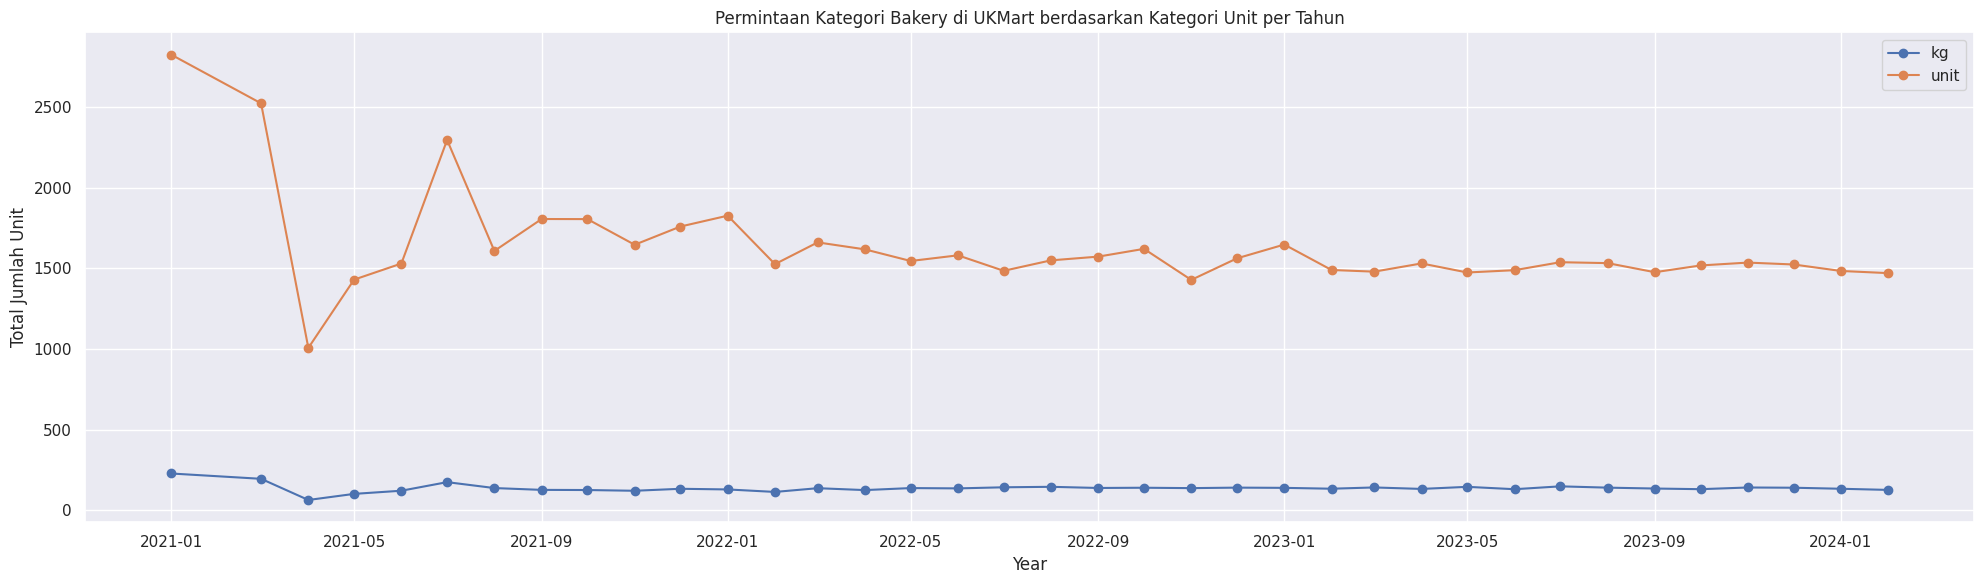

In [ ]:

# Filter data untuk kategori bakery dan toko UKMart
ukmart_bakery_data = all_data[(all_data['kategori'] == 'bakery') & (all_data['nama_toko'] == 'UKMart')]

# Hitung total penjualan kategori bakery di toko UKMart untuk setiap tahun dan kategori unit
ukmart_bakery_demand = ukmart_bakery_data.groupby(['Month_Year', 'unit'])['Jumlah_unit'].sum().reset_index()

# Daftar kategori unit yang unik
unique_units = ukmart_bakery_demand['unit'].unique()

# Plot grafik garis untuk setiap kategori unit
plt.figure(figsize=(20, 6))
for unit in unique_units:
    unit_data = ukmart_bakery_demand[ukmart_bakery_demand['unit'] == unit]
    plt.plot(unit_data['Month_Year'], unit_data['Jumlah_unit'], marker='o', label=unit)

plt.xlabel('Year')
plt.ylabel('Total Jumlah Unit')
plt.title('Permintaan Kategori Bakery di UKMart berdasarkan Kategori Unit per Tahun')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretasi hasil di atas:

permintaan pelanggan terhadap produk bakery cenderung konstan meskipun sempat mengalami penurunan dan kenaikan yang signifikan pada satuan unit

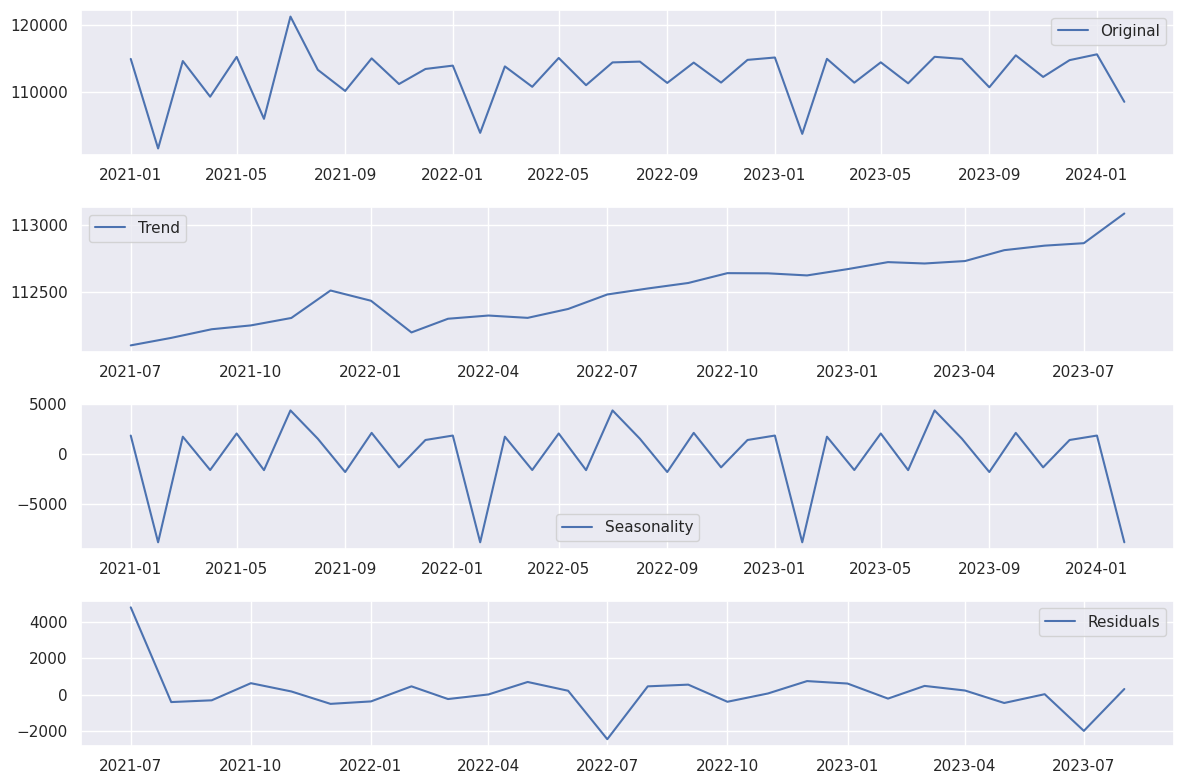

In [ ]:
# Memfilter data untuk hanya mencakup transaksi dari toko 'Ukmart'
data_ukmart = all_data[all_data['nama_toko'] == 'UKMart' ]

# Menghitung total penjualan per hari untuk toko 'Ukmart'
total_penjualan_ukmart = data_ukmart.groupby('Month_Year')['harga_pound'].sum()

# Membuat time series dari total penjualan toko 'Ukmart'
ts_ukmart = total_penjualan_ukmart

# Melakukan dekomposisi time series
decomposition = seasonal_decompose(ts_ukmart, model='additive')

# Menampilkan hasil dekomposisi
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(ts_ukmart, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

pola musiman UKMart
Interpretasi dari pola yang ditunjukkan dalam grafik seasonal yang menunjukkan penurunan dari Januari ke Februari dan peningkatan dari Juni ke Juli dapat dibuat sebagai berikut:

**Penurunan dari Januari ke Februari**: Penurunan penjualan dari Januari ke Februari mungkin terjadi karena beberapa faktor. Pertama, setelah masa liburan Natal yang sibuk, banyak konsumen mengalami efek pemulihan finansial di awal tahun baru, yang dapat mengurangi pengeluaran mereka. Selain itu, cuaca dingin dan cuaca buruk di Inggris pada bulan Februari mungkin juga menjadi faktor yang menyebabkan penurunan, karena orang cenderung lebih enggan untuk keluar dan berbelanja di toko-toko. Persiapan Musim Semi dimana banyak toko mulai mempersiapkan stok untuk musim semi dan musim panas selama bulan Februari. Ini bisa berarti bahwa penekanan penjualan berpindah dari produk-produk musim dingin yang mungkin masih tersisa di rak-rak pada bulan Januari ke produk-produk baru untuk musim yang akan datang, yang bisa mengakibatkan penurunan dalam penjualan produk musim dingin.

**Peningkatan dari Juni ke Juli**: Peningkatan penjualan dari Juni ke Juli bisa disebabkan oleh berbagai faktor yang berkaitan dengan musim panas. Bulan Juli adalah awal musim panas di Inggris, yang sering kali dihubungkan dengan liburan sekolah dan cuaca yang lebih hangat. Ini dapat mendorong orang untuk melakukan lebih banyak aktivitas luar ruangan, perjalanan liburan, dan mengadakan acara musim panas, yang semuanya dapat meningkatkan permintaan akan barang-barang ritel, seperti pakaian musim panas, perlengkapan piknik, dan barang-barang sejenisnya.

**TREN PENJUALAN**
Tren Penjualan yang semakin menurun dalam sektor grocery disebabkan oleh tingkat inflasi yang semakin naik yang terjadi dikawasan United Kingdom. Tinkat inflasi yang semakin tinggi berpengaruh terhadap indeks harga konsumen. Jika indeks naik secara signifikan, itu menunjukkan bahwa harga barang dan jasa meningkat, sehingga mengurangi daya beli konsumen secara relatif. Ini dapat mengakibatkan konsumen mengurangi pengeluaran mereka di supermarket. https://id.tradingeconomics.com/united-kingdom/inflation-cpi

## Dekomposisi Total Penjualan Berdasarkan Kategori Bakery

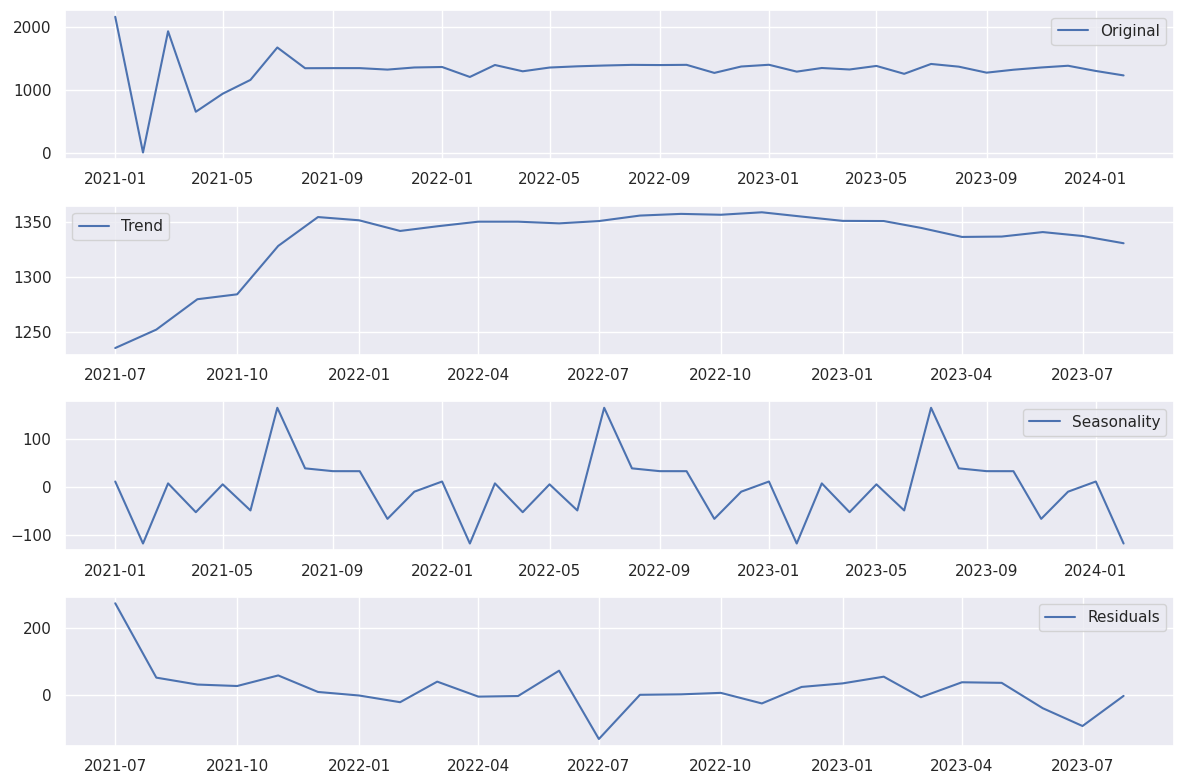

In [ ]:
# Memfilter data untuk hanya mencakup transaksi dari toko 'UKMart' dan kategori 'bakery'
data_ukmart_bakery = all_data[(all_data['nama_toko'] == 'UKMart') & (all_data['kategori'] == 'bakery')]

# Mengonversi kolom 'Month_Year' ke tipe data datetime jika diperlukan
data_ukmart_bakery['Month_Year'] = pd.to_datetime(data_ukmart_bakery['Month_Year'])

# Mengatur kolom 'Month_Year' sebagai indeks DataFrame
data_ukmart_bakery.set_index('Month_Year', inplace=True)

# Menghitung total penjualan per bulan untuk toko 'UKMart' dan kategori 'bakery'
total_penjualan_ukmart_bakery = data_ukmart_bakery['harga_pound'].resample('MS').sum()  # resample per bulan

# Membuat time series dari total penjualan toko 'UKMart' dan kategori 'bakery'
ts_ukmart_bakery = total_penjualan_ukmart_bakery

# Melakukan dekomposisi time series
decomposition = seasonal_decompose(ts_ukmart_bakery, model='additive')

# Menampilkan hasil dekomposisi
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(ts_ukmart_bakery, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

**Pola penjualan UKMart untuk kategori Bakery:**

**Penurunan dari Januari ke Februari:** Bulan Januari dan Februari masih merupakan bagian dari musim dingin di United Kingdom, yang sering kali ditandai dengan cuaca dingin, gelap, dan tidak stabil. Selama periode ini, orang cenderung lebih cenderung menghabiskan waktu di dalam ruangan, yang mungkin mengurangi kunjungan ke toko bakery dan pembelian produk-produk bakery. Selain itu, Banyak orang membuat resolusi kesehatan atau diet pada awal tahun, yang mungkin mengakibatkan mereka mengurangi konsumsi makanan manis atau makanan berat, termasuk produk-produk bakery.

**Peningkatan dari Juni ke Juli**: Musim Panas dan Aktivitas Liburan: Bulan Juli adalah awal musim panas di Inggris, yang sering kali dihubungkan dengan liburan sekolah, acara/festival dan cuaca yang lebih hangat. Selama musim panas, orang cenderung melakukan lebih banyak kegiatan di luar ruangan, seperti piknik, pesta, dan acara sosial lainnya. Bakery items seperti roti, kue, dan kue kering sering menjadi pilihan makanan yang populer untuk kegiatan semacam itu.

**pola tren UKMart untuk kategori Bakery:**

Meskipun pola tren penjualan secara keseluruhan mengalami penurunan, akan tetapi **tidak berlaku untuk kategori bakery**. Tren ini meningkat disebabkan oleh meningkatnya permintaan produk roti di Inggris Raya didorong oleh berbagai faktor yang mencerminkan pergeseran menuju gaya hidup yang lebih sehat dan kesadaran akan pentingnya makanan alami serta nutrisi. Pertama, meningkatnya kesadaran akan hidup sehat dan nutrisi alami telah mendorong konsumen untuk mencari produk roti yang lebih sehat, seperti yang terbuat dari bahan-bahan alami dan gandum utuh, serta tanpa bahan tambahan kimia. Kedua, kenaikan permintaan akan produk organik juga berkontribusi pada tren ini, karena konsumen semakin memilih roti organik yang dianggap lebih sehat dan bebas dari pestisida serta bahan kimia sintetis lainnya. Selain itu, roti tetap menjadi makanan pokok dalam pola makan masyarakat Inggris, yang turut menjaga permintaan untuk produk roti yang tinggi. Faktor kenyamanan dan aksesibilitas juga berperan, dengan roti mudah ditemukan di berbagai toko dan supermarket, membuatnya menjadi pilihan makanan yang praktis bagi semua kalangan. Terakhir, meningkatnya kebutuhan akan produk bebas gluten juga menjadi faktor penting, dengan semakin banyaknya orang yang mengadopsi diet bebas gluten karena alasan kesehatan atau preferensi pribadi. Dengan demikian, tren meningkatnya permintaan produk roti di Inggris Raya mencerminkan perubahan dalam preferensi konsumen menuju gaya hidup yang lebih sehat dan sadar nutrisi.

https://straitsresearch.com/report/bakery-product-market/united-kingdom

## Dekomposisi Permintaan Produk Berdasarkan Kategori Bakery

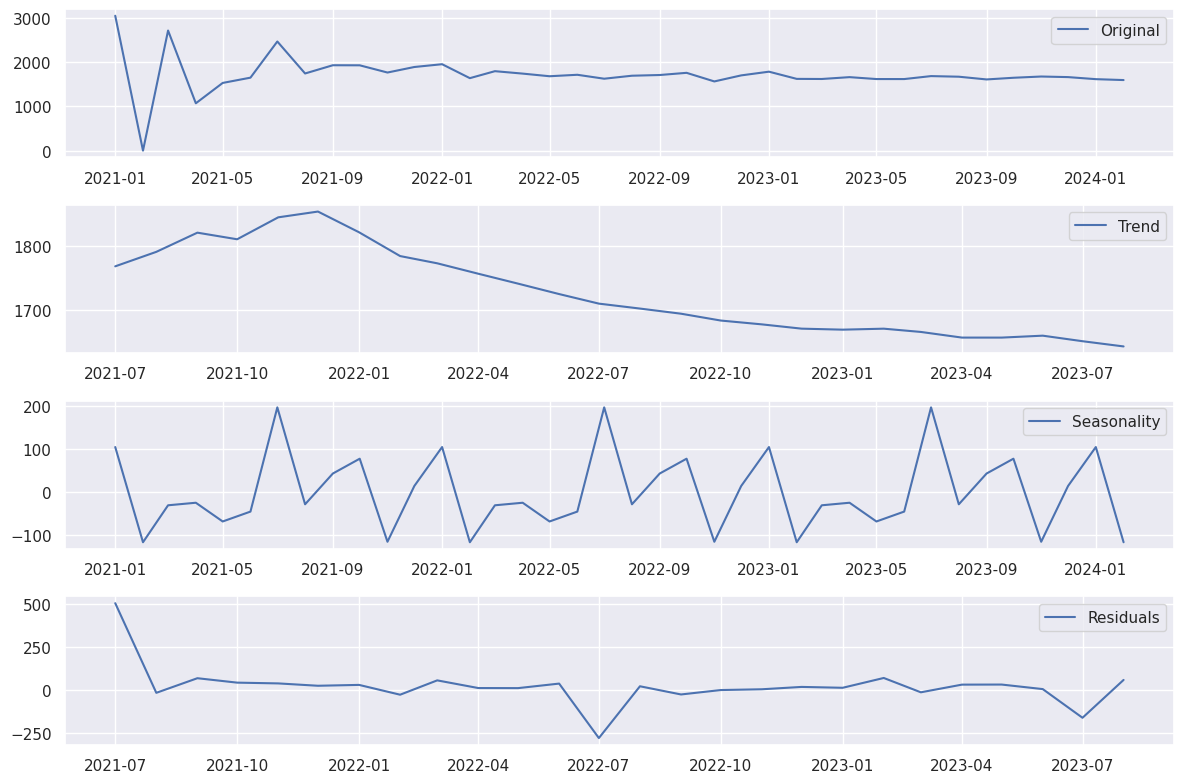

In [ ]:
# Memfilter data untuk hanya mencakup transaksi dari toko 'UKMart' dan kategori 'bakery'
data_ukmart_bakery = all_data[(all_data['nama_toko'] == 'UKMart') & (all_data['kategori'] == 'bakery')]

# Mengatur kolom 'Month_Year' sebagai indeks DataFrame
data_ukmart_bakery.set_index('Month_Year', inplace=True)

# Menghitung total penjualan per bulan untuk toko 'UKMart' dan kategori 'bakery'
total_penjualan_ukmart_bakery = data_ukmart_bakery['Jumlah_unit'].resample('MS').sum()  # resample per bulan

# Membuat time series dari total penjualan toko 'UKMart' dan kategori 'bakery'
ts_ukmart_bakery = total_penjualan_ukmart_bakery

# Melakukan dekomposisi time series
decomposition = seasonal_decompose(ts_ukmart_bakery, model='additive')

# Menampilkan hasil dekomposisi
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(ts_ukmart_bakery, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Meskipun Tren Total Penjualan kategori bakery meningkat akan tetapi tidak diimbangi peningkatan tren permintaan produk secara proporsinal hal ini disebabkan oleh adanya **inflasi** yang terjadi di Inggris

## UK Mart

Setelah mengeksplorasi keseluruhan toko, maka akan difokuskan kepada UK Mart yang memegang posisi pasar tetapi memiliki penjualan terendah dengan kategori bakery.

In [ ]:
pip install statsmodels

### Data Penjualan Total UK Mart per Bulan

In [ ]:
df_penjualan = d5[['harga_pound','tanggal']]
df_penjualan

harga_pound     tanggal
0               1.50  2021-01-01
1               1.65  2021-01-01
2               1.65  2021-01-01
3               0.90  2021-01-01
4               1.45  2021-01-01
...              ...         ...
1158415         2.70  2022-04-30
1158416         3.00  2022-05-01
1158417         1.25  2022-05-02
1158418         3.00  2022-05-03
1158419         5.50  2022-05-04

[1158420 rows x 2 columns]

In [ ]:
df_penjualan.isnull().sum()

harga_pound    0
tanggal        0
dtype: int64

In [ ]:
df_penjualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158420 entries, 0 to 1158419
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   harga_pound  1158420 non-null  float64
 1   tanggal      1158420 non-null  object 
dtypes: float64(1), object(1)
memory usage: 17.7+ MB


In [ ]:
df_penjualan['tanggal'] = pd.to_datetime(df_penjualan['tanggal'])
df_penjualan.set_index('tanggal', inplace=True)

In [ ]:
df_penjualan.head()

harga_pound
tanggal                
2021-01-01         1.50
2021-01-01         1.65
2021-01-01         1.65
2021-01-01         0.90
2021-01-01         1.45

In [ ]:
# Jumlahkan data harga_pound berdasarkan bulan
df_bulanan = df_penjualan.resample('M').sum()

# Tampilkan DataFrame hasil
df_bulanan

harga_pound
tanggal                
2021-01-31    114935.24
2021-02-28    101490.07
2021-03-31    114613.74
2021-04-30    109261.56
2021-05-31    115235.60
2021-06-30    105938.56
2021-07-31    121286.67
2021-08-31    113296.05
2021-09-30    110123.28
2021-10-31    115013.63
2021-11-30    111163.07
2021-12-31    113424.41
2022-01-31    113926.60
2022-02-28    103833.94
2022-03-31    113809.94
2022-04-30    110748.81
2022-05-31    115075.76
2022-06-30    110990.90
2022-07-31    114409.21
2022-08-31    114528.14
2022-09-30    111329.20
2022-10-31    114379.72
2022-11-30    111382.71
2022-12-31    114789.82
2023-01-31    115144.60
2023-02-28    103681.64
2023-03-31    114942.61
2023-04-30    111369.52
2023-05-31    114422.44
2023-06-30    111271.39
2023-07-31    115248.95
2023-08-31    114937.96
2023-09-30    110675.48
2023-10-31    115470.01
2023-11-30    112229.09
2023-12-31    114750.55
2024-01-31    115622.26
2024-02-29    108491.52

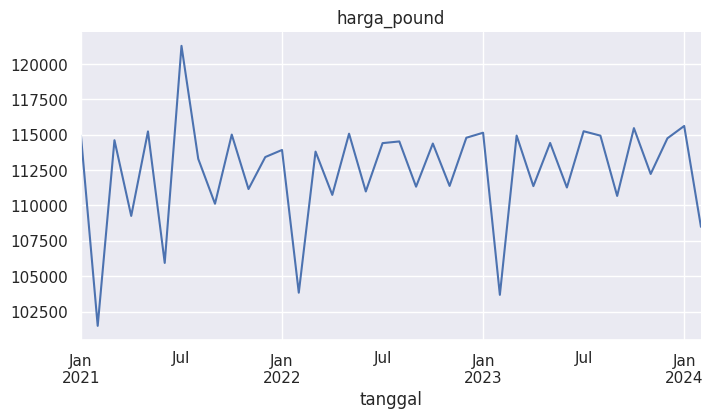

In [ ]:
# @title Grafik total penjualan per bulan UK Mart

from matplotlib import pyplot as plt
df_bulanan['harga_pound'].plot(kind='line', figsize=(8, 4), title='harga_pound')
plt.gca().spines[['top', 'right']].set_visible(False)

Setiap bulan Februari, penjualan UK Mart selalu mengalami penurunan drastis.

### Data Penjualan Bakery UK Mart per Bulan



In [ ]:
# Filter data untuk kategori bakery
data_bakery = d5[d5['kategori'] == 'bakery']

# Mengambil kolom tanggal dan harga_pound untuk kategori bakery
tanggal_harga_bakery = data_bakery[['tanggal', 'harga_pound']]

tanggal_harga_bakery

tanggal  harga_pound
14138    2021-01-14         1.50
14139    2021-01-14         1.35
14140    2021-01-14         1.25
14141    2021-01-14         1.30
14142    2021-01-14         1.39
...             ...          ...
1158183  2021-08-02         1.10
1158184  2021-08-03         2.00
1158238  2021-10-04         1.75
1158239  2021-10-05         3.00
1158240  2021-10-06         0.55

[25405 rows x 2 columns]

In [ ]:
tanggal_harga_bakery.isnull().sum()

tanggal        0
harga_pound    0
dtype: int64

In [ ]:
tanggal_harga_bakery['tanggal'] = pd.to_datetime(tanggal_harga_bakery['tanggal'])
tanggal_harga_bakery.set_index('tanggal', inplace=True)

In [ ]:
tanggal_harga_bakery

harga_pound
tanggal                
2021-01-14         1.50
2021-01-14         1.35
2021-01-14         1.25
2021-01-14         1.30
2021-01-14         1.39
...                 ...
2021-08-02         1.10
2021-08-03         2.00
2021-10-04         1.75
2021-10-05         3.00
2021-10-06         0.55

[25405 rows x 1 columns]

In [ ]:
# Jumlahkan data harga_pound bakery berdasarkan bulan
tanggal_harga_bakery_bulanan = tanggal_harga_bakery.resample('M').sum()

# Tampilkan DataFrame hasil
tanggal_harga_bakery_bulanan

harga_pound
tanggal                
2021-01-31      2162.54
2021-02-28         0.00
2021-03-31      1931.62
2021-04-30       649.36
2021-05-31       936.82
2021-06-30      1156.99
2021-07-31      1673.32
2021-08-31      1343.17
2021-09-30      1344.55
2021-10-31      1344.61
2021-11-30      1320.99
2021-12-31      1354.93
2022-01-31      1362.61
2022-02-28      1203.87
2022-03-31      1394.42
2022-04-30      1294.17
2022-05-31      1353.88
2022-06-30      1373.35
2022-07-31      1386.07
2022-08-31      1396.40
2022-09-30      1393.47
2022-10-31      1396.98
2022-11-30      1268.56
2022-12-31      1370.29
2023-01-31      1398.06
2023-02-28      1288.76
2023-03-31      1346.59
2023-04-30      1322.82
2023-05-31      1379.46
2023-06-30      1253.84
2023-07-31      1411.04
2023-08-31      1367.85
2023-09-30      1272.38
2023-10-31      1318.98
2023-11-30      1354.81
2023-12-31      1382.46
2024-01-31      1299.46
2024-02-29      1228.47

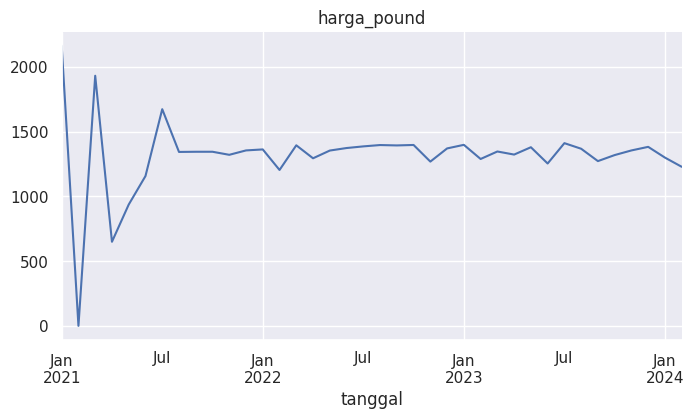

In [ ]:
# @title Grafik total penjualan bakery per bulan UK Mart

from matplotlib import pyplot as plt
tanggal_harga_bakery_bulanan['harga_pound'].plot(kind='line', figsize=(8, 4), title='harga_pound')
plt.gca().spines[['top', 'right']].set_visible(False)

Penjualan bakery cenderung konstan

### Data Penjualan Bakery UK Mart per 2 Minggu


In [ ]:
# Filter data untuk kategori bakery
data_bakery = d5[d5['kategori'] == 'bakery']

# Mengambil kolom tanggal dan harga_pound untuk kategori bakery
tanggal_harga_bakery = data_bakery[['tanggal', 'harga_pound']]

tanggal_harga_bakery

tanggal  harga_pound
14138    2021-01-14         1.50
14139    2021-01-14         1.35
14140    2021-01-14         1.25
14141    2021-01-14         1.30
14142    2021-01-14         1.39
...             ...          ...
1158183  2021-08-02         1.10
1158184  2021-08-03         2.00
1158238  2021-10-04         1.75
1158239  2021-10-05         3.00
1158240  2021-10-06         0.55

[25405 rows x 2 columns]

In [ ]:
tanggal_harga_bakery.isnull().sum()

tanggal        0
harga_pound    0
dtype: int64

In [ ]:
tanggal_harga_bakery['tanggal'] = pd.to_datetime(tanggal_harga_bakery['tanggal'])
tanggal_harga_bakery.set_index('tanggal', inplace=True)

In [ ]:
tanggal_harga_bakery

harga_pound
tanggal                
2021-01-14         1.50
2021-01-14         1.35
2021-01-14         1.25
2021-01-14         1.30
2021-01-14         1.39
...                 ...
2021-08-02         1.10
2021-08-03         2.00
2021-10-04         1.75
2021-10-05         3.00
2021-10-06         0.55

[25405 rows x 1 columns]

In [ ]:
# Jumlahkan data harga_pound bakery berdasarkan mingguan
tanggal_harga_bakery_mingguan = tanggal_harga_bakery.resample('2W').sum()

# Tampilkan DataFrame hasil
tanggal_harga_bakery_mingguan

harga_pound
tanggal                
2021-01-10         2.85
2021-01-24       750.96
2021-02-07      1408.73
2021-02-21         0.00
2021-03-07         0.00
...                 ...
2024-01-07       577.07
2024-01-21       609.48
2024-02-04       564.48
2024-02-18       604.25
2024-03-03       475.17

[83 rows x 1 columns]

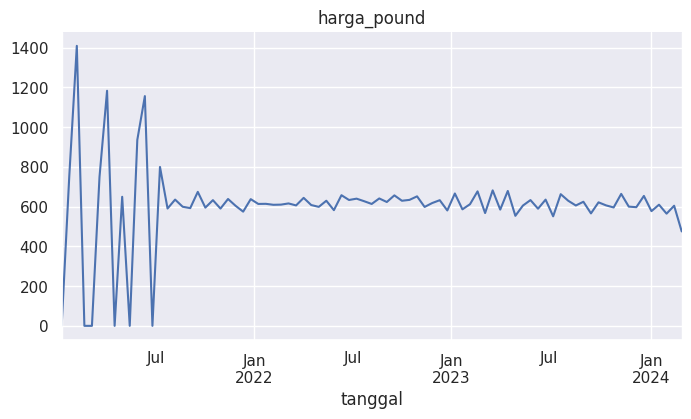

In [ ]:
# @title Grafik total penjualan bakery per 2 minggu UK Mart

from matplotlib import pyplot as plt
tanggal_harga_bakery_mingguan['harga_pound'].plot(kind='line', figsize=(8, 4), title='harga_pound')
plt.gca().spines[['top', 'right']].set_visible(False)

Penjualan bakery sangat fluktuatif di tahun 2021 dan seterusnya adalah konstan. perbedaan pola penjualan di tahun 2021 yang sangat berbeda ini disebabkan oleh perisitwa brexit. Meskipun membuat ekonomi Inggris tertatih-tatih (sulit untuk mencapai penjualan yang lebih tinggi dibandingkan tahun sebelumnya), akan tetapi perubahan tersebut menghasilkan pola penjualan yang lebih stabil karena Inggris memiliki kontrol lebih besar atas kebijakan perdagangan dan regulasi yang diterapkan setelah Brexit. Dengan kontrol yang lebih besar ini, pemerintah Inggris dapat mengambil langkah-langkah untuk menciptakan kebijakan yang lebih stabil bagi pelaku usaha dan konsumen.

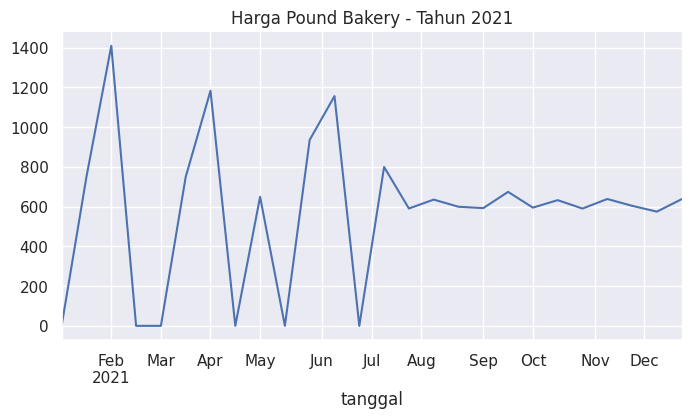

In [ ]:
# Filter data for the year 2021
data_2021 = tanggal_harga_bakery_mingguan.loc['2021-01-01':'2021-12-31']

# Plot the harga_pound data for the year 2021
data_2021['harga_pound'].plot(kind='line', figsize=(8, 4), title='Harga Pound Bakery - Tahun 2021')
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()

In [ ]:
data_2021

harga_pound
tanggal                
2021-01-10         2.85
2021-01-24       750.96
2021-02-07      1408.73
2021-02-21         0.00
2021-03-07         0.00
2021-03-21       748.88
2021-04-04      1182.74
2021-04-18         0.00
2021-05-02       649.36
2021-05-16         0.00
2021-05-30       935.52
2021-06-13      1155.89
2021-06-27         0.00
2021-07-11       799.47
2021-07-25       590.39
2021-08-08       635.19
2021-08-22       599.26
2021-09-05       592.28
2021-09-19       674.11
2021-10-03       594.83
2021-10-17       632.43
2021-10-31       590.09
2021-11-14       638.26
2021-11-28       603.97
2021-12-12       574.62
2021-12-26       637.46

In [ ]:
data_zero = data_2021[data_2021['harga_pound'] == 0]
data_zero

harga_pound
tanggal                
2021-02-21          0.0
2021-03-07          0.0
2021-04-18          0.0
2021-05-16          0.0
2021-06-27          0.0

### Data Permintaan Bakery UK Mart per Bulan

In [ ]:
# Filter data untuk kategori bakery
data_bakery = d5[d5['kategori'] == 'bakery']

# Mengambil kolom tanggal dan harga_pound untuk kategori bakery
permintaan_bakery = data_bakery[['tanggal', 'harga_pound', 'harga_per_unit', 'unit']]

permintaan_bakery

tanggal  harga_pound  harga_per_unit  unit
14138    2021-01-14         1.50            0.25  unit
14139    2021-01-14         1.35            5.70    kg
14140    2021-01-14         1.25            0.16  unit
14141    2021-01-14         1.30            1.60    kg
14142    2021-01-14         1.39            1.70    kg
...             ...          ...             ...   ...
1158183  2021-08-02         1.10            2.80    kg
1158184  2021-08-03         2.00            5.00    kg
1158238  2021-10-04         1.75            6.40    kg
1158239  2021-10-05         3.00            0.50  unit
1158240  2021-10-06         0.55            0.55  unit

[25405 rows x 4 columns]

In [ ]:
permintaan_bakery.isnull().sum()

tanggal           0
harga_pound       0
harga_per_unit    0
unit              0
dtype: int64

In [ ]:
permintaan_bakery['tanggal'] = pd.to_datetime(permintaan_bakery['tanggal'])
permintaan_bakery.set_index('tanggal', inplace=True)

In [ ]:
permintaan_bakery

harga_pound  harga_per_unit  unit
tanggal                                      
2021-01-14         1.50            0.25  unit
2021-01-14         1.35            5.70    kg
2021-01-14         1.25            0.16  unit
2021-01-14         1.30            1.60    kg
2021-01-14         1.39            1.70    kg
...                 ...             ...   ...
2021-08-02         1.10            2.80    kg
2021-08-03         2.00            5.00    kg
2021-10-04         1.75            6.40    kg
2021-10-05         3.00            0.50  unit
2021-10-06         0.55            0.55  unit

[25405 rows x 3 columns]

In [ ]:
permintaan_bakery['jumlah permintaan'] = permintaan_bakery['harga_pound']/permintaan_bakery['harga_per_unit']

In [ ]:
permintaan_bakery

harga_pound  harga_per_unit  unit  jumlah permintaan
tanggal                                                         
2021-01-14         1.50            0.25  unit           6.000000
2021-01-14         1.35            5.70    kg           0.236842
2021-01-14         1.25            0.16  unit           7.812500
2021-01-14         1.30            1.60    kg           0.812500
2021-01-14         1.39            1.70    kg           0.817647
...                 ...             ...   ...                ...
2021-08-02         1.10            2.80    kg           0.392857
2021-08-03         2.00            5.00    kg           0.400000
2021-10-04         1.75            6.40    kg           0.273438
2021-10-05         3.00            0.50  unit           6.000000
2021-10-06         0.55            0.55  unit           1.000000

[25405 rows x 4 columns]

In [ ]:
permintaan_bakery['unit'].unique()

array(['unit', 'kg'], dtype=object)

In [ ]:
# Tampilkan DataFrame hasil
permintaan_bakery_bulanan_df = pd.DataFrame(permintaan_bakery['jumlah permintaan'])
permintaan_bakery_bulanan_df

# Jumlahkan data permintaan bakery bulanan seluruh satuan (unit dan kg) bakery berdasarkan bulan
permintaan_bakery_bulanan = permintaan_bakery_bulanan_df.resample('M').sum()
permintaan_bakery_bulanan

jumlah permintaan
tanggal                      
2021-01-31        3052.285747
2021-02-28           0.000000
2021-03-31        2717.469300
2021-04-30        1071.035129
2021-05-31        1531.760953
2021-06-30        1651.111490
2021-07-31        2469.631009
2021-08-31        1745.649525
2021-09-30        1932.150933
2021-10-31        1930.617165
2021-11-30        1767.166587
2021-12-31        1892.301241
2022-01-31        1955.566553
2022-02-28        1639.778195
2022-03-31        1797.779123
2022-04-30        1742.800935
2022-05-31        1683.270202
2022-06-30        1716.355517
2022-07-31        1627.248876
2022-08-31        1695.044513
2022-09-30        1710.965507
2022-10-31        1760.475056
2022-11-30        1565.712362
2022-12-31        1702.492462
2023-01-31        1786.499415
2023-02-28        1623.534548
2023-03-31        1621.114496
2023-04-30        1662.824073
2023-05-31        1619.649485
2023-06-30        1619.298402
2023-07-31        1686.402922
2023-08-31        1672.744009
2023-09-30        1610.870788
2023-10-31        1648.727275
2023-11-30        1676.948840
2023-12-31        1663.741508
2024-01-31        1617.255828
2024-02-29        1596.770137

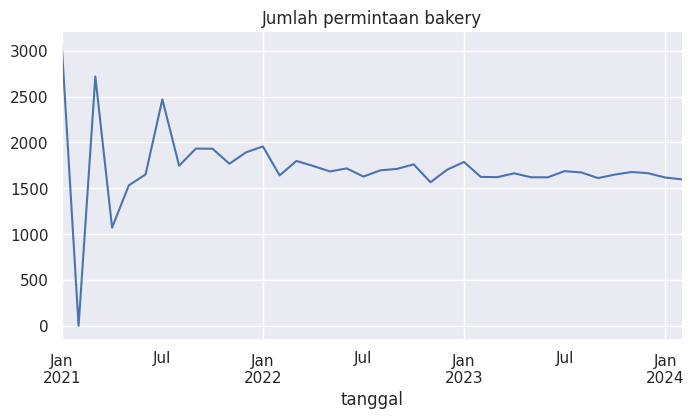

In [ ]:
# @title Grafik total permintaan bakery per bulan UK Mart

from matplotlib import pyplot as plt
permintaan_bakery_bulanan['jumlah permintaan'].plot(kind='line', figsize=(8, 4), title='Jumlah permintaan bakery')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Jumlahkan data permintaan bakery bulanan satuan unit bakery berdasarkan bulan
permintaan_bakery_bulanan_kg = permintaan_bakery[permintaan_bakery['unit'] == 'kg'].resample('M').sum()

# Tampilkan DataFrame hasil
permintaan_bakery_bulanan_df_kg = pd.DataFrame(permintaan_bakery_bulanan_kg['jumlah permintaan'])
permintaan_bakery_bulanan_df_kg

jumlah permintaan
tanggal                      
2021-01-31         228.504766
2021-02-28           0.000000
2021-03-31         195.536391
2021-04-30          64.392386
2021-05-31         102.159300
2021-06-30         121.773496
2021-07-31         174.900017
2021-08-31         138.254138
2021-09-30         126.989956
2021-10-31         126.051404
2021-11-30         121.455380
2021-12-31         133.763920
2022-01-31         129.688687
2022-02-28         114.255527
2022-03-31         137.424591
2022-04-30         125.684198
2022-05-31         138.145755
2022-06-30         136.204541
2022-07-31         142.993114
2022-08-31         145.995042
2022-09-30         138.810580
2022-10-31         140.241280
2022-11-30         137.819173
2022-12-31         140.932752
2023-01-31         139.517226
2023-02-28         134.172222
2023-03-31         142.055613
2023-04-30         132.884175
2023-05-31         145.832129
2023-06-30         131.131034
2023-07-31         148.891362
2023-08-31         140.844003
2023-09-30         135.322321
2023-10-31         131.287241
2023-11-30         141.762554
2023-12-31         140.321014
2024-01-31         133.915173
2024-02-29         126.832219

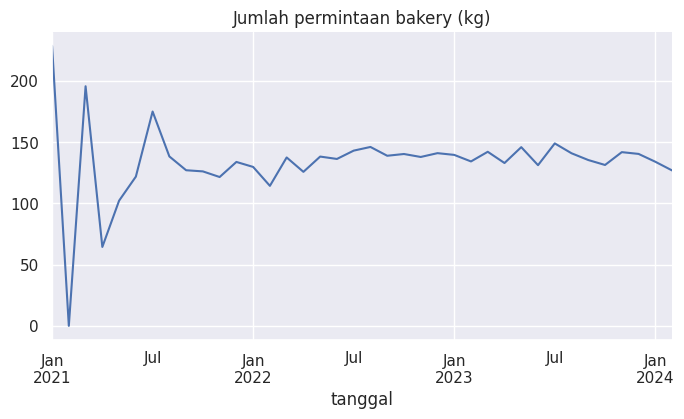

In [ ]:
# @title Grafik total permintaan bakery per bulan satuan kg UK Mart

from matplotlib import pyplot as plt
permintaan_bakery_bulanan_df_kg['jumlah permintaan'].plot(kind='line', figsize=(8, 4), title='Jumlah permintaan bakery (kg)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Jumlahkan data permintaan bakery bulanan satuan kg bakery berdasarkan bulan
permintaan_bakery_bulanan_unit = permintaan_bakery[permintaan_bakery['unit'] == 'unit'].resample('M').sum()

# Tampilkan DataFrame hasil
permintaan_bakery_bulanan_df_unit = pd.DataFrame(permintaan_bakery_bulanan_unit['jumlah permintaan'])
permintaan_bakery_bulanan_df_unit

jumlah permintaan
tanggal                      
2021-01-31        2823.780982
2021-02-28           0.000000
2021-03-31        2521.932908
2021-04-30        1006.642744
2021-05-31        1429.601653
2021-06-30        1529.337994
2021-07-31        2294.730992
2021-08-31        1607.395388
2021-09-30        1805.160977
2021-10-31        1804.565761
2021-11-30        1645.711207
2021-12-31        1758.537321
2022-01-31        1825.877866
2022-02-28        1525.522668
2022-03-31        1660.354532
2022-04-30        1617.116736
2022-05-31        1545.124447
2022-06-30        1580.150976
2022-07-31        1484.255763
2022-08-31        1549.049470
2022-09-30        1572.154928
2022-10-31        1620.233777
2022-11-30        1427.893189
2022-12-31        1561.559709
2023-01-31        1646.982189
2023-02-28        1489.362326
2023-03-31        1479.058882
2023-04-30        1529.939897
2023-05-31        1473.817356
2023-06-30        1488.167368
2023-07-31        1537.511560
2023-08-31        1531.900005
2023-09-30        1475.548467
2023-10-31        1517.440033
2023-11-30        1535.186286
2023-12-31        1523.420494
2024-01-31        1483.340655
2024-02-29        1469.937918

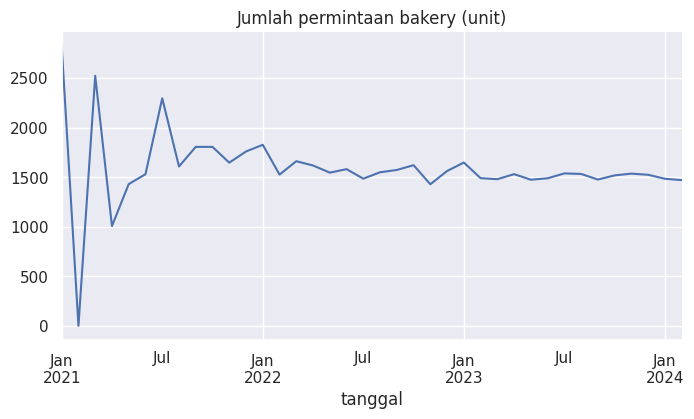

In [ ]:
# @title Grafik total permintaan bakery per bulan satuan unit UK Mart

from matplotlib import pyplot as plt
permintaan_bakery_bulanan_df_unit['jumlah permintaan'].plot(kind='line', figsize=(8, 4), title='Jumlah permintaan bakery (unit)')
plt.gca().spines[['top', 'right']].set_visible(False)

### Data Permintaan Bakery UK Mart per 2 Minggu

In [ ]:
# Filter data untuk kategori bakery
data_bakery = d5[d5['kategori'] == 'bakery']

# Mengambil kolom tanggal dan harga_pound untuk kategori bakery
permintaan_bakery = data_bakery[['tanggal', 'harga_pound', 'harga_per_unit', 'unit']]

permintaan_bakery

tanggal  harga_pound  harga_per_unit  unit
14138    2021-01-14         1.50            0.25  unit
14139    2021-01-14         1.35            5.70    kg
14140    2021-01-14         1.25            0.16  unit
14141    2021-01-14         1.30            1.60    kg
14142    2021-01-14         1.39            1.70    kg
...             ...          ...             ...   ...
1158183  2021-08-02         1.10            2.80    kg
1158184  2021-08-03         2.00            5.00    kg
1158238  2021-10-04         1.75            6.40    kg
1158239  2021-10-05         3.00            0.50  unit
1158240  2021-10-06         0.55            0.55  unit

[25405 rows x 4 columns]

In [ ]:
permintaan_bakery.isnull().sum()

tanggal           0
harga_pound       0
harga_per_unit    0
unit              0
dtype: int64

In [ ]:
permintaan_bakery['tanggal'] = pd.to_datetime(permintaan_bakery['tanggal'])
permintaan_bakery.set_index('tanggal', inplace=True)

In [ ]:
permintaan_bakery

harga_pound  harga_per_unit  unit
tanggal                                      
2021-01-14         1.50            0.25  unit
2021-01-14         1.35            5.70    kg
2021-01-14         1.25            0.16  unit
2021-01-14         1.30            1.60    kg
2021-01-14         1.39            1.70    kg
...                 ...             ...   ...
2021-08-02         1.10            2.80    kg
2021-08-03         2.00            5.00    kg
2021-10-04         1.75            6.40    kg
2021-10-05         3.00            0.50  unit
2021-10-06         0.55            0.55  unit

[25405 rows x 3 columns]

In [ ]:
permintaan_bakery['jumlah permintaan'] = permintaan_bakery['harga_pound']/permintaan_bakery['harga_per_unit']

In [ ]:
permintaan_bakery

harga_pound  harga_per_unit  unit  jumlah permintaan
tanggal                                                         
2021-01-14         1.50            0.25  unit           6.000000
2021-01-14         1.35            5.70    kg           0.236842
2021-01-14         1.25            0.16  unit           7.812500
2021-01-14         1.30            1.60    kg           0.812500
2021-01-14         1.39            1.70    kg           0.817647
...                 ...             ...   ...                ...
2021-08-02         1.10            2.80    kg           0.392857
2021-08-03         2.00            5.00    kg           0.400000
2021-10-04         1.75            6.40    kg           0.273438
2021-10-05         3.00            0.50  unit           6.000000
2021-10-06         0.55            0.55  unit           1.000000

[25405 rows x 4 columns]

In [ ]:
permintaan_bakery['unit'].unique()

array(['unit', 'kg'], dtype=object)

In [ ]:
# Tampilkan DataFrame hasil
permintaan_bakery_mingguan_df = pd.DataFrame(permintaan_bakery['jumlah permintaan'])
permintaan_bakery_mingguan_df

# Jumlahkan data permintaan bakery bulanan seluruh satuan (unit dan kg) bakery berdasarkan 2 minggu
permintaan_bakery_mingguan = permintaan_bakery_mingguan_df.resample('2W').sum()
permintaan_bakery_mingguan

jumlah permintaan
tanggal                      
2021-01-10           5.937500
2021-01-24        1203.097970
2021-02-07        1843.250278
2021-02-21           0.000000
2021-03-07           0.000000
...                       ...
2024-01-07         677.121208
2024-01-21         817.532583
2024-02-04         696.625846
2024-02-18         782.590618
2024-03-03         603.289006

[83 rows x 1 columns]

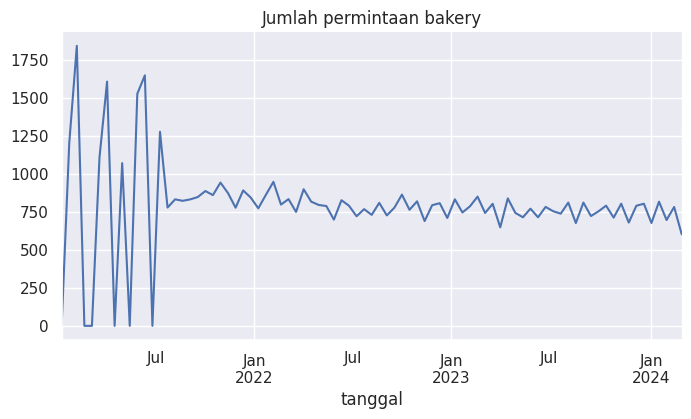

In [ ]:
# @title Grafik total permintaan bakery per 2 minggu UK Mart

from matplotlib import pyplot as plt
permintaan_bakery_mingguan['jumlah permintaan'].plot(kind='line', figsize=(8, 4), title='Jumlah permintaan bakery')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Jumlahkan data permintaan bakery bulanan satuan unit bakery berdasarkan bulan
permintaan_bakery_mingguan_kg = permintaan_bakery[permintaan_bakery['unit'] == 'kg'].resample('2W').sum()

# Tampilkan DataFrame hasil
permintaan_bakery_mingguan_df_kg = pd.DataFrame(permintaan_bakery_mingguan_kg['jumlah permintaan'])
permintaan_bakery_mingguan_df_kg

jumlah permintaan
tanggal                      
2021-01-17          77.880769
2021-01-31         150.623997
2021-02-14           0.000000
2021-02-28           0.000000
2021-03-14          73.039877
...                       ...
2024-01-14          56.959999
2024-01-28          67.006434
2024-02-11          60.417576
2024-02-25          55.938482
2024-03-10          20.424901

[83 rows x 1 columns]

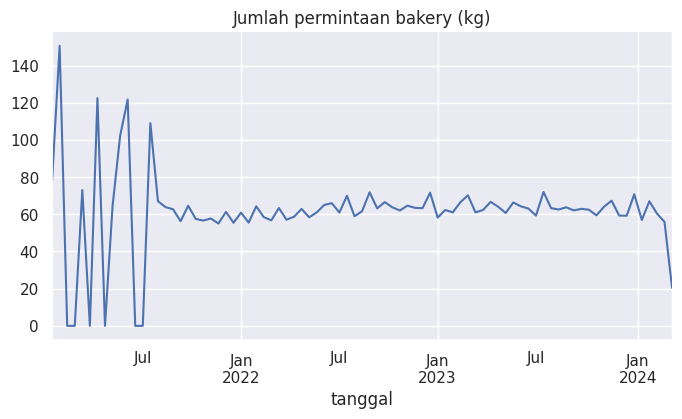

In [ ]:
# @title Grafik total permintaan bakery per 2 minggu satuan kg UK Mart

from matplotlib import pyplot as plt
permintaan_bakery_mingguan_df_kg['jumlah permintaan'].plot(kind='line', figsize=(8, 4), title='Jumlah permintaan bakery (kg)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Jumlahkan data permintaan bakery bulanan satuan kg bakery berdasarkan bulan
permintaan_bakery_mingguan_unit = permintaan_bakery[permintaan_bakery['unit'] == 'unit'].resample('2W').sum()

# Tampilkan DataFrame hasil
permintaan_bakery_mingguan_df_unit = pd.DataFrame(permintaan_bakery_mingguan_unit['jumlah permintaan'])
permintaan_bakery_mingguan_df_unit

jumlah permintaan
tanggal                      
2021-01-10           5.937500
2021-01-24        1125.217201
2021-02-07        1692.626281
2021-02-21           0.000000
2021-03-07           0.000000
...                       ...
2024-01-07         616.071765
2024-01-21         753.304217
2024-02-04         640.623408
2024-02-18         718.153752
2024-03-03         556.450677

[83 rows x 1 columns]

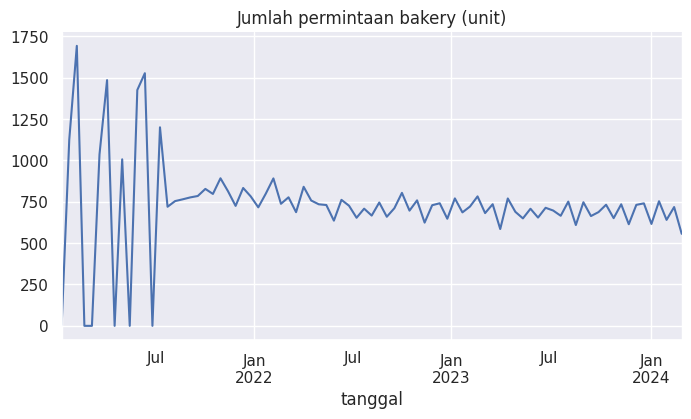

In [ ]:
# @title Grafik total permintaan bakery per 2 minggu satuan unit UK Mart

from matplotlib import pyplot as plt
permintaan_bakery_mingguan_df_unit['jumlah permintaan'].plot(kind='line', figsize=(8, 4), title='Jumlah permintaan bakery (unit)')
plt.gca().spines[['top', 'right']].set_visible(False)

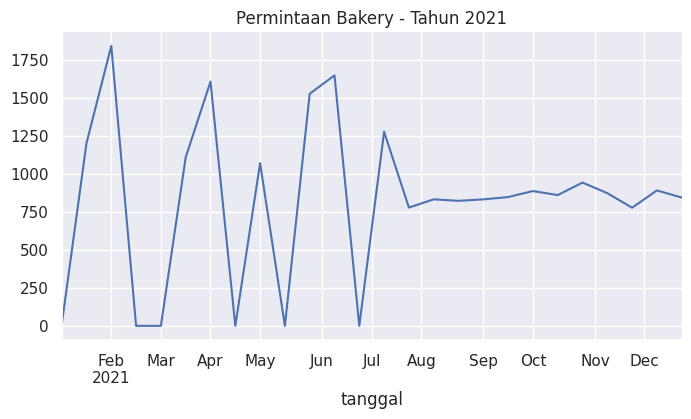

In [ ]:
# Filter data for the year 2021
data_2021_permintaan = permintaan_bakery_mingguan.loc['2021-01-01':'2021-12-31']

# Plot the harga_pound data for the year 2021
data_2021_permintaan['jumlah permintaan'].plot(kind='line', figsize=(8, 4), title='Permintaan Bakery - Tahun 2021')
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()

## EDA Time Series

Dari hasil exploratory data UK Mart, kami memutuskan untuk memprediksi penjualan dengan periode bulanan dan persediaan dengan periode per 2 minggu. Selanjutnya, akan dilakukan uji stasioneritas data sebagai syarat penting untuk melakukan forecasting time series. Secara statistik, jika data tidak stasioner maka khawatir akan mempengaruhi rata-rata, varians, dan kovarians dari data sehingga sulit untuk diinterpretasikan karena ketidakstabilan nilai-nilai tersebut.

##### Stasioneritas Data Penjualan Bakery Periode Bulanan

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Melakukan tes ADF (Uji Stasioneritas)
result = adfuller(tanggal_harga_bakery_bulanan)

# Menampilkan hasil
print('ADF Statistic:', "{:.5f}".format(result[0]))
print('p-value:', "{:.8f}".format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.5f' % (key, value))

ADF Statistic: -13.28582
p-value: 0.00000000
Critical Values:
	1%: -3.62092
	5%: -2.94354
	10%: -2.61040


Dengan menggunakan taraf signifikan 5%, karena p-value < taraf signifikan maka data sudah stasioner.

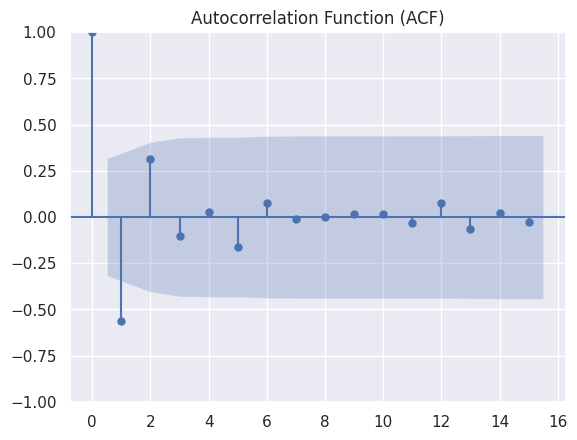

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(tanggal_harga_bakery_bulanan, lags=15)
plt.title('Autocorrelation Function (ACF)')
plt.show()

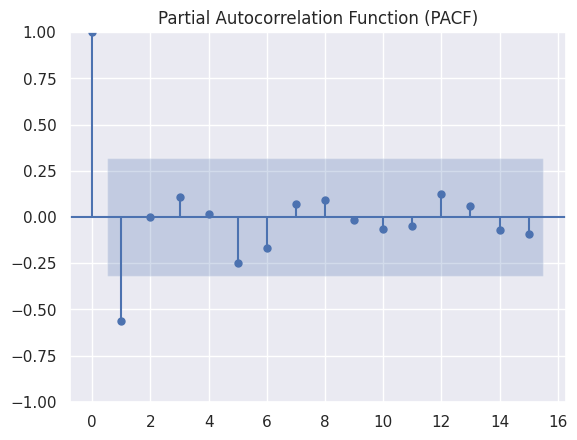

In [ ]:
# Plot PACF
plot_pacf(tanggal_harga_bakery_bulanan, lags=15)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

Masing-masing ACF dan PACF putus setelah lag ke-1.

##### Stasioneritas Data Permintaan Bakery Satuan Kg Periode 2 Minggu

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Melakukan tes ADF (Uji Stasioneritas)
result = adfuller(permintaan_bakery_mingguan_df_kg)

# Menampilkan hasil
print('ADF Statistic:', "{:.5f}".format(result[0]))
print('p-value:', "{:.8f}".format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.5f' % (key, value))

ADF Statistic: -10.58336
p-value: 0.00000000
Critical Values:
	1%: -3.51379
	5%: -2.89794
	10%: -2.58619


Dengan menggunakan taraf signifikan 5%, karena p-value < taraf signifikan maka data sudah stasioner.

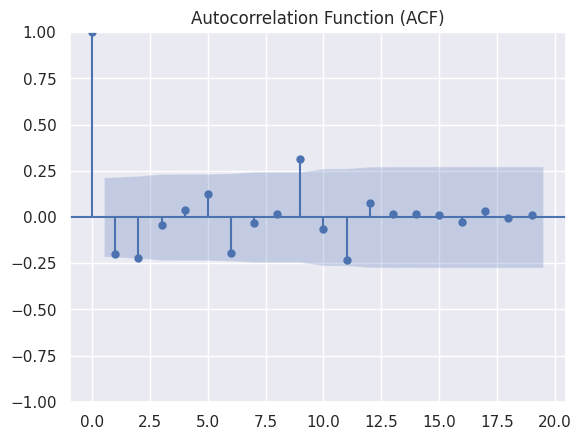

In [ ]:
# Plot ACF
plot_acf(permintaan_bakery_mingguan_df_kg, lags=19)
plt.title('Autocorrelation Function (ACF)')
plt.show()

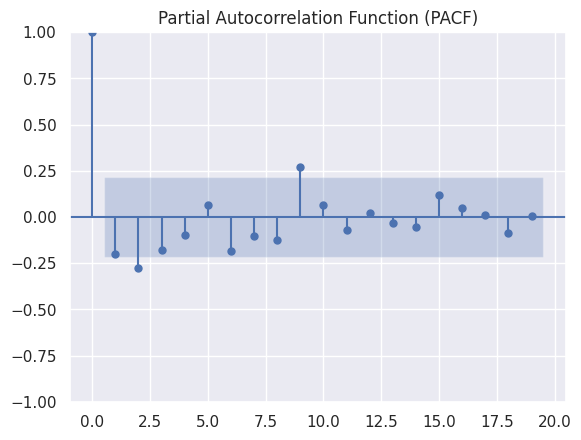

In [ ]:
# Plot PACF
plot_pacf(permintaan_bakery_mingguan_df_kg, lags=19)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

Masing-masing ACF dan PACF putus setelah lag ke-1.

##### Stasioneritas Data Permintaan Bakery Satuan Unit Periode 2 Minggu

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Melakukan tes ADF (Uji Stasioneritas)
result = adfuller(permintaan_bakery_mingguan_df_unit)

# Menampilkan hasil
print('ADF Statistic:', "{:.5f}".format(result[0]))
print('p-value:', "{:.8f}".format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.5f' % (key, value))

ADF Statistic: -0.71741
p-value: 0.84218916
Critical Values:
	1%: -3.52462
	5%: -2.90261
	10%: -2.58868


Dengan menggunakan taraf signifikan 5%, karena p-value < taraf signifikan maka data sudah stasioner. Perlu dilakukan differencing sebagai handle ketidakstasioneritasan data.

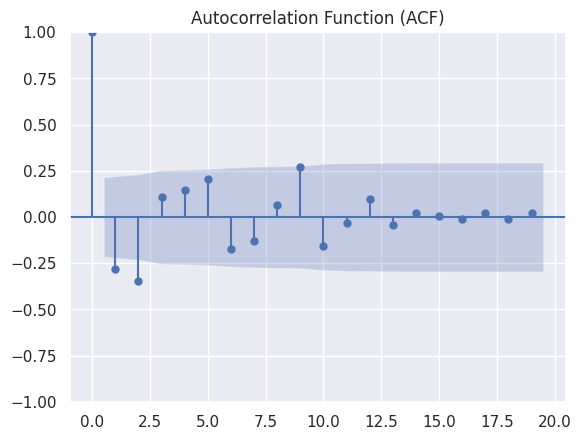

In [ ]:
# Plot ACF
plot_acf(permintaan_bakery_mingguan_df_unit, lags=19)
plt.title('Autocorrelation Function (ACF)')
plt.show()

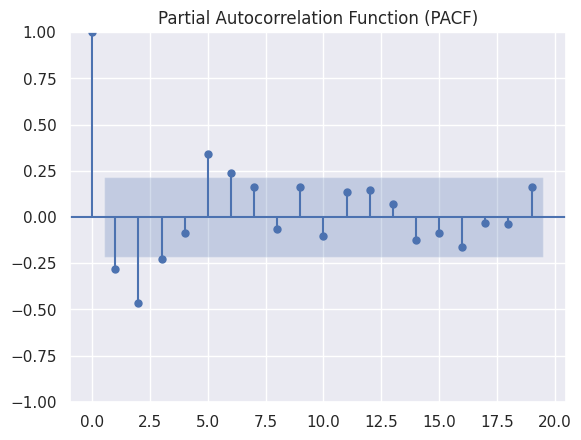

In [ ]:
# Plot PACF
plot_pacf(permintaan_bakery_mingguan_df_unit, lags=19)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

Masing-masing ACF dan PACF putus setelah lag ke-1. ACF dan PACF yang putus setelah lag ke-1 dapat menunjukkan bahwa data ternyata sudah cukup stasioner. Pada plot data yang ditampilkan juga tidak secara signifikan menunjukkan adanya ketidakstasioneritasan data. Sehingga, kami memutuskan untuk tidak melakukan differencing data.

# **Feature Engineering**

In [ ]:
d5.head()

nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri     tanggal  
0          False  2021-01-01  
1          False  2021-01-01  
2          False  2021-01-01  
3           True  2021-01-01  
4           True  2021-01-01

In [ ]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158420 entries, 0 to 1158419
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1158420 non-null  object 
 1   harga_pound     1158420 non-null  float64
 2   harga_per_unit  1158420 non-null  float64
 3   unit            1158420 non-null  object 
 4   nama            1158420 non-null  object 
 5   kategori        1158420 non-null  object 
 6   brand_sendiri   1158420 non-null  bool   
 7   tanggal         1158420 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 63.0+ MB


## Ekstrak Variabel Tanggal

In [ ]:
# Copy dataset ke dataset baru agar dataset asli tidak hilang
d5_fe1 = d5.copy()

In [ ]:
d5_fe1['tanggal'] = pd.to_datetime(d5_fe1['tanggal'])
d5_fe1.head()

nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri    tanggal  
0          False 2021-01-01  
1          False 2021-01-01  
2          False 2021-01-01  
3           True 2021-01-01  
4           True 2021-01-01

In [ ]:
d5_fe1['tahun'] = d5_fe1['tanggal'].dt.year
d5_fe1['bulan'] = d5_fe1['tanggal'].dt.month
d5_fe1['hari'] = d5_fe1['tanggal'].dt.day

In [ ]:
d5_fe1.head()

nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri    tanggal  tahun  bulan  hari  
0          False 2021-01-01   2021      1     1  
1          False 2021-01-01   2021      1     1  
2          False 2021-01-01   2021      1     1  
3           True 2021-01-01   2021      1     1  
4           True 2021-01-01   2021      1     1

In [ ]:
d5_fe1['tahun'].unique()

array([2021, 2022, 2023, 2024], dtype=int32)

In [ ]:
d5_fe1['bulan'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
d5_fe1['hari'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

## Variabel Jumlah Permintaan

Untuk memprediksi persediaan akan dilakukan FE dengan menghitung jumlah permintaan, yaitu

```
# harga_pound/harga_per_unit
```



In [ ]:
# Copy dataset ke dataset baru agar dataset sebelumnya tidak hilang
d5_fe2 = d5_fe1.copy()

In [ ]:
d5_fe2['jumlah permintaan'] = d5_fe2['harga_pound']/d5_fe2['harga_per_unit']
d5_fe2.head()

nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri    tanggal  tahun  bulan  hari  jumlah permintaan  
0          False 2021-01-01   2021      1     1           0.500000  
1          False 2021-01-01   2021      1     1           2.012195  
2          False 2021-01-01   2021      1     1           2.012195  
3           True 2021-01-01   2021      1     1           1.000000  
4           True 2021-01-01   2021      1     1           2.265625

## Variabel Terjadinya Fluktuasi BAKERY yang Signifikan (Januari 2021 - Juli 2021)





Karena terdapat fluktuasi yang signifikan pada bulan Januari - Juli tahun 2021, baik pada penjualan maupun permintaan bakery, maka akan dilakukan FE dengan membuat kolom baru yang menandakan apakah variabel tersebut ada di bulan-bulan tersebut atau tidak

In [ ]:
# Copy dataset ke dataset baru agar dataset sebelumnya tidak hilang
d5_fe3 = d5_fe2.copy()

In [ ]:
# Membuat kolom baru untuk menandakan bulan Januari sampai Juli tahun 2021
d5_fe3['fluktuatif'] = (d5_fe3['tahun'] == 2021) & (d5_fe3['bulan'] >= 1) & (d5_fe3['bulan'] <= 7)

# Tampilkan DataFrame dengan kolom fluktuatif
d5_fe3.head()

nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri    tanggal  tahun  bulan  hari  jumlah permintaan  fluktuatif  
0          False 2021-01-01   2021      1     1           0.500000        True  
1          False 2021-01-01   2021      1     1           2.012195        True  
2          False 2021-01-01   2021      1     1           2.012195        True  
3           True 2021-01-01   2021      1     1           1.000000        True  
4           True 2021-01-01   2021      1     1           2.265625        True

In [ ]:
d5_fe3.groupby('fluktuatif')['bulan'].unique()

fluktuatif
False    [8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7]
True                       [1, 2, 3, 4, 5, 6, 7]
Name: bulan, dtype: object

## Variabel Terjadinya Penurunan Penjualan SELURUH KATEGORI (Setiap bulan Februari)

In [ ]:
# Copy dataset ke dataset baru agar dataset sebelumnya tidak hilang
d5_fe4 = d5_fe3.copy()

In [ ]:
# Membuat kolom baru untuk menandakan bulan Februari setiap tahun
d5_fe4['penurunan_drastis'] = (d5_fe4['bulan'] == 2)

# Tampilkan DataFrame dengan kolom 'penurunan_drastis'
d5_fe4.head()

nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri    tanggal  tahun  bulan  hari  jumlah permintaan  \
0          False 2021-01-01   2021      1     1           0.500000   
1          False 2021-01-01   2021      1     1           2.012195   
2          False 2021-01-01   2021      1     1           2.012195   
3           True 2021-01-01   2021      1     1           1.000000   
4           True 2021-01-01   2021      1     1           2.265625   

   fluktuatif  penurunan_drastis  
0        True              False  
1        True              False  
2        True              False  
3        True              False  
4        True              False

## Variabel Terjadinya Peningkatan Penjualan SELURUH KATEGORI (Setiap bulan Juli)

In [ ]:
# Copy dataset ke dataset baru agar dataset sebelumnya tidak hilang
d5_fe5 = d5_fe4.copy()

In [ ]:
# Membuat kolom baru untuk menandakan bulan Februari setiap tahun
d5_fe5['peningkatan_drastis'] = (d5_fe5['bulan'] == 7)

# Tampilkan DataFrame dengan kolom 'penurunan_drastis'
d5_fe5.head()

nama_toko  harga_pound  harga_per_unit unit  \
0    UKMart         1.50            3.00   kg   
1    UKMart         1.65            0.82    l   
2    UKMart         1.65            0.82    l   
3    UKMart         0.90            0.90   kg   
4    UKMart         1.45            0.64    l   

                                                nama    kategori  \
0  Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1  Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2  Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                Sainsbury's Fairtrade Bananas Loose  fresh_food   
4  Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   

   brand_sendiri    tanggal  tahun  bulan  hari  jumlah permintaan  \
0          False 2021-01-01   2021      1     1           0.500000   
1          False 2021-01-01   2021      1     1           2.012195   
2          False 2021-01-01   2021      1     1           2.012195   
3           True 2021-01-01   2021      1     1           1.000000   
4           True 2021-01-01   2021      1     1           2.265625   

   fluktuatif  penurunan_drastis  peningkatan_drastis  
0        True              False                False  
1        True              False                False  
2        True              False                False  
3        True              False                False  
4        True              False                False

## Ekstrak Nama Brand

Nama brand dapat diambil dari pola nama barang di UK Mart, yaitu kata pertamanya.

In [ ]:
d5_final = d5_fe5.copy()

In [ ]:
d5_final['nama_brand'] = d5_final['nama'].apply(lambda x: ' '.join(x.split()[:2]) if len(x.split()) > 1 else x.split()[0])

In [ ]:
# Mengelompokkan data berdasarkan nama brand dan menghitung jumlah transaksi untuk setiap brand
jumlah_transaksi_per_brand = d5_final.groupby('nama_brand').size()

# Brand paling populer berdasarkan jumlah transaksi
brand_populer_jumlah_transaksi = jumlah_transaksi_per_brand.idxmax()
jumlah_transaksi_tertinggi = jumlah_transaksi_per_brand.max()

print(f"Brand paling populer berdasarkan jumlah transaksi: {brand_populer_jumlah_transaksi} dengan jumlah transaksi {jumlah_transaksi_tertinggi}")


Brand paling populer berdasarkan jumlah transaksi: Sainsbury's Home dengan jumlah transaksi 37593


In [ ]:
# Mengelompokkan transaksi per brand
jumlah_transaksi_per_brand = d5_final.groupby('nama_brand').size()

# Fungsi untuk menentukan tingkat kepopuleran
def tingkat_kepopuleran(jumlah_transaksi):
    if jumlah_transaksi > 10000:
        return 'Populer'
    elif 1000 <= jumlah_transaksi <= 10000:
        return 'Menengah'
    else:
        return 'Tidak Populer'

# Membuat dictionary untuk memetakan jumlah transaksi ke tingkat kepopuleran
mapping = jumlah_transaksi_per_brand.apply(tingkat_kepopuleran).to_dict()

# Menerapkan pemetaan pada DataFrame untuk membuat kolom baru 'kepopuleran'
d5_final['kepopuleran'] = d5_final['nama_brand'].map(mapping)

In [ ]:
d5_final

nama_toko  harga_pound  harga_per_unit unit  \
0          UKMart         1.50            3.00   kg   
1          UKMart         1.65            0.82    l   
2          UKMart         1.65            0.82    l   
3          UKMart         0.90            0.90   kg   
4          UKMart         1.45            0.64    l   
...           ...          ...             ...  ...   
1158415    UKMart         2.70           14.21   kg   
1158416    UKMart         3.00            5.00   kg   
1158417    UKMart         1.25            5.50   kg   
1158418    UKMart         3.00           30.00   kg   
1158419    UKMart         5.50           19.64   kg   

                                                      nama    kategori  \
0        Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1        Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2        Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                      Sainsbury's Fairtrade Bananas Loose  fresh_food   
4        Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   
...                                                    ...         ...   
1158415                            Jarlsberg Original 190g  fresh_food   
1158416  Sainsbury's Moroccan Spiced Chicken & Chickpea...  fresh_food   
1158417                       Ginsters Cornish Pasty, 227g  fresh_food   
1158418  Sainsbury's British Corned Beef Slices, Taste ...  fresh_food   
1158419  New England Seafood Wild Smoked Haddock Fillet...  fresh_food   

         brand_sendiri    tanggal  tahun  bulan  hari  jumlah permintaan  \
0                False 2021-01-01   2021      1     1           0.500000   
1                False 2021-01-01   2021      1     1           2.012195   
2                False 2021-01-01   2021      1     1           2.012195   
3                 True 2021-01-01   2021      1     1           1.000000   
4                 True 2021-01-01   2021      1     1           2.265625   
...                ...        ...    ...    ...   ...                ...   
1158415          False 2022-04-30   2022      4    30           0.190007   
1158416           True 2022-05-01   2022      5     1           0.600000   
1158417          False 2022-05-02   2022      5     2           0.227273   
1158418           True 2022-05-03   2022      5     3           0.100000   
1158419          False 2022-05-04   2022      5     4           0.280041   

         fluktuatif  penurunan_drastis  peningkatan_drastis  \
0              True              False                False   
1              True              False                False   
2              True              False                False   
3              True              False                False   
4              True              False                False   
...             ...                ...                  ...   
1158415       False              False                False   
1158416       False              False                False   
1158417       False              False                False   
1158418       False              False                False   
1158419       False              False                False   

                    nama_brand    kepopuleran  
0                  Alpro Plain  Tidak Populer  
1          Cravendale Filtered  Tidak Populer  
2          Cravendale Filtered  Tidak Populer  
3        Sainsbury's Fairtrade       Menengah  
4          Sainsbury's British        Populer  
...                        ...            ...  
1158415     Jarlsberg Original  Tidak Populer  
1158416   Sainsbury's Moroccan  Tidak Populer  
1158417       Ginsters Cornish  Tidak Populer  
1158418    Sainsbury's British        Populer  
1158419            New England  Tidak Populer  

[1158420 rows x 17 columns]

# **Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Membuat DataFrame
df_encoded = pd.DataFrame(d5_final)

# Label encoding untuk variabel dengan 2 kategori
label_encoder = LabelEncoder()
df_encoded['brand_sendiri_encoded'] = label_encoder.fit_transform(df_encoded['brand_sendiri'])
df_encoded['fluktuatif_encoded'] = label_encoder.fit_transform(df_encoded['fluktuatif'])
df_encoded['penurunan_drastis_encoded'] = label_encoder.fit_transform(df_encoded['penurunan_drastis'])
df_encoded['peningkatan_drastis_encoded'] = label_encoder.fit_transform(df_encoded['peningkatan_drastis'])
df_encoded['kepopuleran_encoded'] = label_encoder.fit_transform(df_encoded['kepopuleran'])

# One-hot encoding untuk variabel dengan lebih dari 2 kategori
one_hot_encoder = OneHotEncoder(sparse=False)
unit_encoded = one_hot_encoder.fit_transform(df_encoded[['unit']])
unit_encoded_df = pd.DataFrame(unit_encoded, columns=one_hot_encoder.get_feature_names_out(['unit']))
df_encoded = pd.concat([df_encoded, unit_encoded_df], axis=1)

# Hapus kolom yang sudah dienkoding
df_encoded.drop(columns=['unit','brand_sendiri','fluktuatif','penurunan_drastis','peningkatan_drastis'], inplace=True)

# Tampilkan DataFrame yang sudah dienkoding
df_encoded

nama_toko  harga_pound  harga_per_unit  \
0          UKMart         1.50            3.00   
1          UKMart         1.65            0.82   
2          UKMart         1.65            0.82   
3          UKMart         0.90            0.90   
4          UKMart         1.45            0.64   
...           ...          ...             ...   
1158415    UKMart         2.70           14.21   
1158416    UKMart         3.00            5.00   
1158417    UKMart         1.25            5.50   
1158418    UKMart         3.00           30.00   
1158419    UKMart         5.50           19.64   

                                                      nama    kategori  \
0        Alpro Plain Unsweetened No Sugars Plant-Based ...  fresh_food   
1        Cravendale Filtered Fresh Skimmed Milk Fresher...  fresh_food   
2        Cravendale Filtered Fresh Whole Milk 2L Freshe...  fresh_food   
3                      Sainsbury's Fairtrade Bananas Loose  fresh_food   
4        Sainsbury's British Semi Skimmed Milk 2.27L (4...  fresh_food   
...                                                    ...         ...   
1158415                            Jarlsberg Original 190g  fresh_food   
1158416  Sainsbury's Moroccan Spiced Chicken & Chickpea...  fresh_food   
1158417                       Ginsters Cornish Pasty, 227g  fresh_food   
1158418  Sainsbury's British Corned Beef Slices, Taste ...  fresh_food   
1158419  New England Seafood Wild Smoked Haddock Fillet...  fresh_food   

           tanggal  tahun  bulan  hari  jumlah permintaan  ...    kepopuleran  \
0       2021-01-01   2021      1     1           0.500000  ...  Tidak Populer   
1       2021-01-01   2021      1     1           2.012195  ...  Tidak Populer   
2       2021-01-01   2021      1     1           2.012195  ...  Tidak Populer   
3       2021-01-01   2021      1     1           1.000000  ...       Menengah   
4       2021-01-01   2021      1     1           2.265625  ...        Populer   
...            ...    ...    ...   ...                ...  ...            ...   
1158415 2022-04-30   2022      4    30           0.190007  ...  Tidak Populer   
1158416 2022-05-01   2022      5     1           0.600000  ...  Tidak Populer   
1158417 2022-05-02   2022      5     2           0.227273  ...  Tidak Populer   
1158418 2022-05-03   2022      5     3           0.100000  ...        Populer   
1158419 2022-05-04   2022      5     4           0.280041  ...  Tidak Populer   

        brand_sendiri_encoded  fluktuatif_encoded  penurunan_drastis_encoded  \
0                           0                   1                          0   
1                           0                   1                          0   
2                           0                   1                          0   
3                           1                   1                          0   
4                           1                   1                          0   
...                       ...                 ...                        ...   
1158415                     0                   0                          0   
1158416                     1                   0                          0   
1158417                     0                   0                          0   
1158418                     1                   0                          0   
1158419                     0                   0                          0   

         peningkatan_drastis_encoded  kepopuleran_encoded  unit_kg  unit_l  \
0                                  0                    2      1.0     0.0   
1                                  0                    2      0.0     1.0   
2                                  0                    2      0.0     1.0   
3                                  0                    0      1.0     0.0   
4                                  0                    1      0.0     1.0   
...                              ...                  ...      ...     ...   
1158415                            0  

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158420 entries, 0 to 1158419
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   nama_toko                    1158420 non-null  object        
 1   harga_pound                  1158420 non-null  float64       
 2   harga_per_unit               1158420 non-null  float64       
 3   nama                         1158420 non-null  object        
 4   kategori                     1158420 non-null  object        
 5   tanggal                      1158420 non-null  datetime64[ns]
 6   tahun                        1158420 non-null  int32         
 7   bulan                        1158420 non-null  int32         
 8   hari                         1158420 non-null  int32         
 9   jumlah permintaan            1158420 non-null  float64       
 10  nama_brand                   1158420 non-null  object        
 11  kepopuleran

# **Modeling**

## Prediksi Penjualan Bakery

Prediksi penjualan bakery akan dilakukan dengan menggunakan 2 baseline model, yaitu SARIMAX dan XGB. Alasan dipilihnya SARIMAX dan XGB adalah sebagai berikut.

* SARIMAX mampu menangkap pola musiman dalam data penjualan bakery. Pada data penjualan bakery, terdapat pola musiman yaitu setiap bulan Februari terjadi penurunan sedangkan bulan Juli mengalami kenaikan. Jadi, model SARIMAX layak untuk dicoba sebagai baseline model. Model SARIMAX, yang merupakan model tradisional time series, juga relatif mudah diinterpretasikan dibandingkan dengan model machine learning.

* Berbeda dengan SARIMAX yang hanya memprediksi target, XGBoost adalah algoritma machine learning yang kuat dan dapat menangani interaksi yang kompleks antara variabel-variabel input yang mungkin mempengaruhi penjualan bakery. XGBoost dapat menangani jumlah data yang besar dan dimensi fitur yang tinggi, yang mungkin terjadi dalam dataset penjualan bakery yang kompleks. Pada kasus ini, variabel-variabel input akan diprediksi menggunakan SARIMAX dan selanjutnya akan dilatih sebagai training data dalam model XGB.

#### Preparation

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158420 entries, 0 to 1158419
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   nama_toko                    1158420 non-null  object        
 1   harga_pound                  1158420 non-null  float64       
 2   harga_per_unit               1158420 non-null  float64       
 3   nama                         1158420 non-null  object        
 4   kategori                     1158420 non-null  object        
 5   tanggal                      1158420 non-null  datetime64[ns]
 6   tahun                        1158420 non-null  int32         
 7   bulan                        1158420 non-null  int32         
 8   hari                         1158420 non-null  int32         
 9   jumlah permintaan            1158420 non-null  float64       
 10  nama_brand                   1158420 non-null  object        
 11  kepopuleran

In [ ]:
df_penjualan_bakery = df_encoded[df_encoded['kategori'] == 'bakery']
df_penjualan_bakery

nama_toko  harga_pound  harga_per_unit  \
14138      UKMart         1.50            0.25   
14139      UKMart         1.35            5.70   
14140      UKMart         1.25            0.16   
14141      UKMart         1.30            1.60   
14142      UKMart         1.39            1.70   
...           ...          ...             ...   
1158183    UKMart         1.10            2.80   
1158184    UKMart         2.00            5.00   
1158238    UKMart         1.75            6.40   
1158239    UKMart         3.00            0.50   
1158240    UKMart         0.55            0.55   

                                                      nama kategori  \
14138                 Mr Kipling Cherry Bakewells Cakes x6   bakery   
14139    McVitie's The Original Jaffa Cakes Twin Pack x...   bakery   
14140             Sainsbury's Plain Tortilla Wraps x8 496g   bakery   
14141             Kingsmill Medium Sliced 50/50 Bread 800g   bakery   
14142            Hovis Soft Medium Sliced White Bread 800g   bakery   
...                                                    ...      ...   
1158183             Sainsbury's Farmhouse White Bread 400g   bakery   
1158184              Kelderman German Style Rye Bread 400g   bakery   
1158238           Sainsbury's Madeira Cake 275g (Serves 8)   bakery   
1158239  Mr Kipling Jam Tarts Raspberry, Apricot, Black...   bakery   
1158240  Sainsbury's Artisan West Country Cheddar Stick...   bakery   

           tanggal  tahun  bulan  hari  jumlah permintaan  ...    kepopuleran  \
14138   2021-01-14   2021      1    14           6.000000  ...       Menengah   
14139   2021-01-14   2021      1    14           0.236842  ...  Tidak Populer   
14140   2021-01-14   2021      1    14           7.812500  ...  Tidak Populer   
14141   2021-01-14   2021      1    14           0.812500  ...  Tidak Populer   
14142   2021-01-14   2021      1    14           0.817647  ...  Tidak Populer   
...            ...    ...    ...   ...                ...  ...            ...   
1158183 2021-08-02   2021      8     2           0.392857  ...  Tidak Populer   
1158184 2021-08-03   2021      8     3           0.400000  ...  Tidak Populer   
1158238 2021-10-04   2021     10     4           0.273438  ...  Tidak Populer   
1158239 2021-10-05   2021     10     5           6.000000  ...       Menengah   
1158240 2021-10-06   2021     10     6           1.000000  ...  Tidak Populer   

        brand_sendiri_encoded  fluktuatif_encoded  penurunan_drastis_encoded  \
14138                       0                   1                          0   
14139                       0                   1                          0   
14140                       1                   1                          0   
14141                       0                   1                          0   
14142                       0                   1                          0   
...                       ...                 ...                        ...   
1158183                     1                   0                          0   
1158184                     0                   0                          0   
1158238                     1                   0                          0   
1158239                     0                   0                          0   
1158240                     1                   0                          0   

         peningkatan_drastis_encoded  kepopuleran_encoded  unit_kg  unit_l  \
14138                              0                    0      0.0     0.0   
14139                              0                    2      1.0     0.0   
14140                              0                    2      0.0     0.0   
14141                              0                    2      1.0     0.0   
14142                              0                    2      1.0     0.0   
...                              ...                  ...      ...     ...   
1158183                            0                    2      1.0     0.0

In [ ]:
df_penjualan_bakery['tanggal'] = pd.to_datetime(df_penjualan_bakery['tanggal'])

In [ ]:
penjualan_per_bulan = df_penjualan_bakery.groupby(['tahun', 'bulan', 'fluktuatif_encoded', 'penurunan_drastis_encoded', 'peningkatan_drastis_encoded']).agg(
    total_kepopuleran=('kepopuleran_encoded', 'sum'),
    total_brand_sendiri=('brand_sendiri_encoded', 'sum'),
    total_unit_kg=('unit_kg','sum'),
    total_unit_unit=('unit_unit', 'sum'),
    jumlah_penjualan_barang=('jumlah permintaan', 'sum'),
    total_harga_pound=('harga_pound', 'sum')
).reset_index()

In [ ]:
penjualan_per_bulan.head()

tahun  bulan  fluktuatif_encoded  penurunan_drastis_encoded  \
0   2021      1                   1                          0   
1   2021      3                   1                          0   
2   2021      4                   1                          0   
3   2021      5                   1                          0   
4   2021      6                   1                          0   

   peningkatan_drastis_encoded  total_kepopuleran  total_brand_sendiri  \
0                            0               1698                  576   
1                            0               1494                  517   
2                            0                540                  199   
3                            0                762                  249   
4                            0                896                  308   

   total_unit_kg  total_unit_unit  jumlah_penjualan_barang  total_harga_pound  
0          556.0            569.0              3052.285747            2162.54  
1          458.0            515.0              2717.469300            1931.62  
2          148.0            213.0              1071.035129             649.36  
3          223.0            270.0              1531.760953             936.82  
4          291.0            303.0              1651.111490            1156.99

In [ ]:
# Baris baru yang ingin ditambahkan di antara baris 1 dan 2
new_row = pd.DataFrame({'tahun': [2021], 'bulan': [2],
                        'fluktuatif_encoded': [0], 'penurunan_drastis_encoded': [0],
                        'peningkatan_drastis_encoded': [0], 'total_harga_pound':[0],
                        'total_kepopuleran': [0], 'total_brand_sendiri': [0],
                        'total_unit_kg': [0], 'total_unit_unit':[0], 'jumlah_penjualan_barang':[0]
                        })

# Menambahkan baris baru di antara baris 1 dan 2
penjualan_per_bulan = pd.concat([penjualan_per_bulan.iloc[:1], new_row, penjualan_per_bulan.iloc[1:]]).reset_index(drop=True)

In [ ]:
# Mengonversi kolom 'tahun' dan 'bulan' menjadi string dan menambahkan nol di depan jika perlu
penjualan_per_bulan['tahun'] = penjualan_per_bulan['tahun'].astype(str)
penjualan_per_bulan['bulan'] = penjualan_per_bulan['bulan'].astype(str)

# Menggabungkan kolom 'tahun' dan 'bulan' menjadi kolom 'waktu' dengan format MMYY
penjualan_per_bulan['waktu'] = penjualan_per_bulan['bulan'] + penjualan_per_bulan['tahun'].str.slice(2, 4)

penjualan_per_bulan['tahun'] = penjualan_per_bulan['tahun'].astype(int)
penjualan_per_bulan['bulan'] = penjualan_per_bulan['bulan'].astype(int)

In [ ]:
# Mengonversi kolom 'waktu' menjadi tipe data datetime
penjualan_per_bulan['waktu'] = pd.to_datetime(penjualan_per_bulan['waktu'], format='%m%y')

# Mengatur kolom 'waktu' sebagai indeks DataFrame
penjualan_per_bulan.set_index('waktu', inplace=True)

# Mengubah indeks menjadi periode bulanan
penjualan_per_bulan.index = penjualan_per_bulan.index.to_period('M')

# Mengonversi indeks menjadi akhir bulan
penjualan_per_bulan.index = penjualan_per_bulan.index.to_timestamp('M') + pd.offsets.MonthEnd(0)

In [ ]:
penjualan_per_bulan['total_unit_kg'] = penjualan_per_bulan['total_unit_kg'].astype(int)
penjualan_per_bulan['total_unit_unit'] = penjualan_per_bulan['total_unit_unit'].astype(int)

In [ ]:
penjualan_per_bulan.head()

tahun  bulan  fluktuatif_encoded  penurunan_drastis_encoded  \
waktu                                                                     
2021-01-31   2021      1                   1                          0   
2021-02-28   2021      2                   0                          0   
2021-03-31   2021      3                   1                          0   
2021-04-30   2021      4                   1                          0   
2021-05-31   2021      5                   1                          0   

            peningkatan_drastis_encoded  total_kepopuleran  \
waktu                                                        
2021-01-31                            0               1698   
2021-02-28                            0                  0   
2021-03-31                            0               1494   
2021-04-30                            0                540   
2021-05-31                            0                762   

            total_brand_sendiri  total_unit_kg  total_unit_unit  \
waktu                                                             
2021-01-31                  576            556              569   
2021-02-28                    0              0                0   
2021-03-31                  517            458              515   
2021-04-30                  199            148              213   
2021-05-31                  249            223              270   

            jumlah_penjualan_barang  total_harga_pound  
waktu                                                   
2021-01-31              3052.285747            2162.54  
2021-02-28                 0.000000               0.00  
2021-03-31              2717.469300            1931.62  
2021-04-30              1071.035129             649.36  
2021-05-31              1531.760953             936.82

### Metric Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error,r2_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

def evaluate_forecast(y,pred):
    results = pd.DataFrame({'MAE':mean_absolute_error(y, pred),}, index=[0])
   ## results['mean absolute error'] = mean_absolute_error(y, pred)
   ## results['median absolute error'] = median_absolute_error(y, pred)
    results['MSE'] = mean_squared_error(y, pred)
    results['MAPE'] = mean_absolute_percentage_error(y, pred) * 100
    results['RMSE'] = np.sqrt(results['MSE'])
    return results

### SARIMAX

#### Revenue

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df_sarimax = pd.DataFrame({'revenue':penjualan_per_bulan['total_harga_pound']})
df_sarimax.head()

revenue
waktu              
2021-01-31  2162.54
2021-02-28     0.00
2021-03-31  1931.62
2021-04-30   649.36
2021-05-31   936.82

In [ ]:
train_size = int(len(df_sarimax) * 0.8)
train, test = df_sarimax.iloc[:train_size], df_sarimax.iloc[train_size:]

order = (1,0,1)
seasonal_order = (0, 1, 0, 7)

model_sarimax = SARIMAX(train['revenue'], order=order, seasonal_order=seasonal_order)
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            revenue   No. Observations:                   30
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 7)   Log Likelihood                -164.605
Date:                            Thu, 06 Jun 2024   AIC                            335.210
Time:                                    07:21:06   BIC                            338.617
Sample:                                01-31-2021   HQIC                           336.067
                                     - 06-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9246      0.083    -11.094      0.000      -1.088      -0.761
ma.L1          0.4645      0.382   

Interpretasi model:

* Nilai koefisien untuk parameter autoregresi (AR) adalah -0.9246, yang
menunjukkan adanya hubungan linear negatif antara nilai-nilai observasi sekarang dengan nilai-nilai observasi di lag sebelumnya.
* Nilai koefisien untuk parameter moving average (MA) adalah 0.4645, yang menunjukkan adanya hubungan linear positif antara nilai-nilai residual dari model dengan nilai-nilai residual di lag sebelumnya.
* Standar deviasi error (sigma2) adalah sekitar 96460, yang merupakan estimasi dari variabilitas residual atau ketidakpastian dalam prediksi model.
* Nilai uji kesalahan (Ljung-Box) adalah 0.01, yang menunjukkan bahwa tidak ada autokorelasi residual yang signifikan pada lag 1.
* Nilai uji normalitas (Jarque-Bera) adalah 23.40, yang menunjukkan bahwa residual tidak terdistribusi normal.


In [ ]:
forecast_periods = len(test)
forecast_sarimax = model_sarimax_fit.forecast(steps=forecast_periods)

forecast_dates = pd.date_range(start=train.index[-1], periods=forecast_periods + 1, freq='1M')[1:]
forecast_df_sarimax = pd.DataFrame({'tanggal': forecast_dates, 'revenue': forecast_sarimax})
forecast_df_sarimax.set_index('tanggal', inplace=True)

In [ ]:
forecast_df_sarimax

revenue
tanggal                
2023-07-31  1380.315215
2023-08-31  1388.790713
2023-09-30  1297.330358
2023-10-31  1338.665870
2023-11-30  1330.146629
2023-12-31  1372.685819
2024-01-31  1260.103390
2024-02-29  1374.524102

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2023-07-31 to 2024-02-29
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  8 non-null      float64
dtypes: float64(1)
memory usage: 128.0 bytes


In [ ]:
data_test = test['revenue']
data_forecast = forecast_df_sarimax['revenue']

df_sarimax_forecast_revenue = pd.DataFrame(data={'Revenue_Test': data_test, 'Revenue_Test_Forecast': data_forecast})
df_sarimax_forecast_revenue

Revenue_Test  Revenue_Test_Forecast
2023-07-31       1411.04            1380.315215
2023-08-31       1367.85            1388.790713
2023-09-30       1272.38            1297.330358
2023-10-31       1318.98            1338.665870
2023-11-30       1354.81            1330.146629
2023-12-31       1382.46            1372.685819
2024-01-31       1299.46            1260.103390
2024-02-29       1228.47            1374.524102

##### Evaluate

In [ ]:
evaluate_sarimax = evaluate_forecast(df_sarimax_forecast_revenue['Revenue_Test'],df_sarimax_forecast_revenue['Revenue_Test_Forecast'])
evaluate_sarimax

MAE          MSE      MAPE       RMSE
0  39.518749  3247.142462  3.075881  56.983703

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai MAE 39.518749 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 39.52 pound dari nilai sebenarnya.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai MSE 3247.142462 mengindikasikan bahwa rata-rata kesalahan kuadrat prediksi adalah sekitar 3247.14 pound^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya. Nilai MAPE 0.030759 menunjukkan bahwa rata-rata kesalahan persentase prediksi adalah sekitar 3.08% dari nilai sebenarnya.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai RMSE 56.983703 menunjukkan bahwa akar rata-rata kesalahan kuadrat prediksi adalah sekitar 56.98 pound.

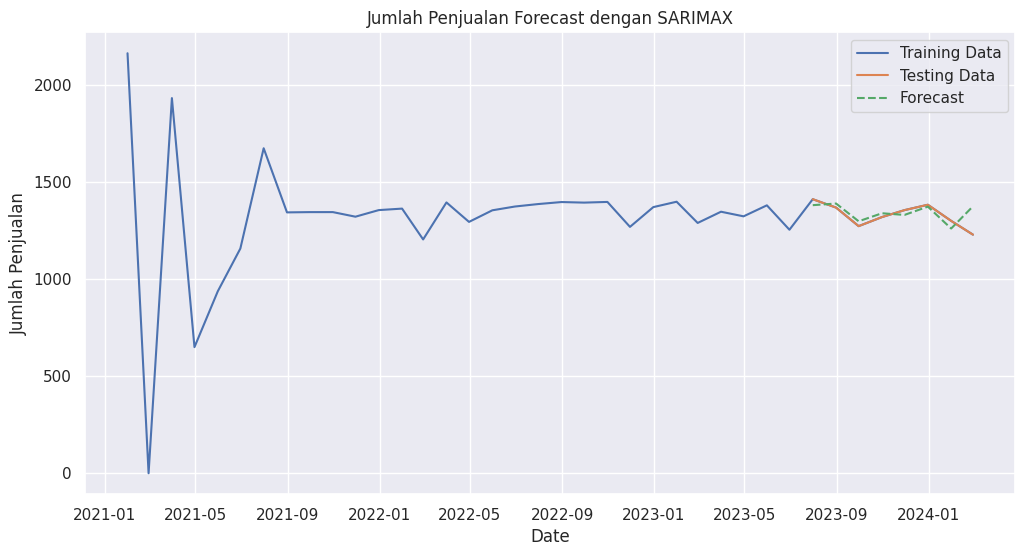

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_sarimax['revenue'], label='Training Data')
plt.plot(df_sarimax_forecast_revenue['Revenue_Test'], label='Testing Data')
plt.plot(df_sarimax_forecast_revenue['Revenue_Test_Forecast'], label='Forecast', linestyle='--')
plt.title('Jumlah Penjualan Forecast dengan SARIMAX')
plt.xlabel('Date')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()

#### Revenue Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
from itertools import product

In [ ]:
train_size = int(len(df_sarimax) * 0.8)
train, test = df_sarimax.iloc[:train_size], df_sarimax.iloc[train_size:]

In [ ]:
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = [7]

pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

In [ ]:
# Hyperparameter tuning dengan Grid Search
best_score, best_params = float("inf"), None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model_sarimax = SARIMAX(train['revenue'], order=param, seasonal_order=param_seasonal)
            model_sarimax_fit = model_sarimax.fit(disp=False)
            forecast_sarimax = model_sarimax_fit.forecast(steps=len(test))
            mae_sarimax = mean_absolute_error(test['revenue'], forecast_sarimax)
            if mae_sarimax < best_score:
                best_score, best_params = mae_sarimax, (param, param_seasonal)
        except:
            continue

print(f'Best SARIMAX {best_params} MAE={best_score}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dat

Best SARIMAX ((1, 0, 2), (0, 1, 0, 7)) MAE=37.616447109449155


In [ ]:
# Build model with the best hyperparameters
best_pdq, best_seasonal_pdq = best_params
model_sarimax_best = SARIMAX(train['revenue'], order=best_pdq, seasonal_order=best_seasonal_pdq)
model_sarimax_best_fit = model_sarimax_best.fit()

# Forecasting
forecast_periods = len(test)
forecast_sarimax_best = model_sarimax_best_fit.forecast(steps=forecast_periods)

# Buat DataFrame untuk hasil prediksi
forecast_dates = test.index
forecast_df_sarimax_best = pd.DataFrame({'tanggal': forecast_dates, 'revenue': forecast_sarimax_best})
forecast_df_sarimax_best.set_index('tanggal', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model_sarimax_best_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            revenue   No. Observations:                   30
Model:             SARIMAX(1, 0, 2)x(0, 1, [], 7)   Log Likelihood                -165.201
Date:                            Thu, 06 Jun 2024   AIC                            338.401
Time:                                    07:39:43   BIC                            342.943
Sample:                                01-31-2021   HQIC                           339.543
                                     - 06-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      0.045    -22.362      0.000      -1.088      -0.912
ma.L1          0.5224      0.362   

Interpretasi model:
* Model SARIMAX yang terbentuk adalah (1, 0, 2)x(0, 1, [], 7), yang mengindikasikan adanya komponen autoregressive (AR) dengan satu lag (p=1), dua komponen moving average (MA) dengan lag satu dan dua (q1=1, q2=2), dan komponen musiman dengan 7 periode (P=0, D=1, Q=[]).
* Koefisien untuk AR(1) adalah -0.9999, menunjukkan adanya hubungan linier negatif yang sangat kuat antara observasi sekarang dengan nilai sebelumnya.
* Koefisien untuk MA(1) adalah 0.5224, menandakan adanya hubungan positif yang signifikan dengan nilai residual sebelumnya.
* Koefisien untuk MA(2) adalah 0.0067, namun tidak signifikan secara statistik. Hal ini  menunjukkan bahwa efek dari dua nilai residual sebelumnya mungkin tidak relevan atau tidak signifikan dalam memprediksi nilai pendapatan saat ini, sehingga dapat diabaikan dalam analisis selanjutnya.
* Variansi error (sigma2) adalah sekitar 9.844e+04.
* Likelihood yang tercatat (-165.201) dan nilai AIC (338.401) menunjukkan bahwa model ini mungkin cukup baik dalam menyesuaikan data.
* Tes Ljung-Box tidak menunjukkan adanya autokorelasi yang signifikan pada residual model (Q=0.12, p=0.73).
* Tes Jarque-Bera menunjukkan bahwa residual mungkin tidak terdistribusi normal (JB=46.10, p=0.00).
* Ada kemungkinan heteroskedastisitas dalam residual (H=0.02, p=0.00), menunjukkan bahwa varians residual tidak konstan.

In [ ]:
forecast_df_sarimax_best

revenue
tanggal                
2023-07-31  1382.415596
2023-08-31  1385.906670
2023-09-30  1300.912278
2023-10-31  1334.438773
2023-11-30  1334.970175
2023-12-31  1367.310876
2024-01-31  1265.988072
2024-02-29  1370.268575

In [ ]:
data_test = test['revenue']
data_forecast = forecast_df_sarimax_best['revenue']

df_sarimax_forecast_revenue_tuned = pd.DataFrame(data={'Revenue_Test': data_test, 'Revenue_Test_Forecast': data_forecast})
df_sarimax_forecast_revenue_tuned

Revenue_Test  Revenue_Test_Forecast
2023-07-31       1411.04            1382.415596
2023-08-31       1367.85            1385.906670
2023-09-30       1272.38            1300.912278
2023-10-31       1318.98            1334.438773
2023-11-30       1354.81            1334.970175
2023-12-31       1382.46            1367.310876
2024-01-31       1299.46            1265.988072
2024-02-29       1228.47            1370.268575

##### Evaluate

In [ ]:
evaluate_sarimax_tuned = evaluate_forecast(df_sarimax_forecast_revenue_tuned['Revenue_Test'],
                                     df_sarimax_forecast_revenue_tuned['Revenue_Test_Forecast'])
evaluate_sarimax_tuned

MAE          MSE      MAPE       RMSE
0  37.616447  3006.098104  2.930235  54.827895

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai MAE 37.616447 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 37.62 pound dari nilai sebenarnya.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai MSE 3006.098104 mengindikasikan bahwa rata-rata kesalahan kuadrat prediksi adalah sekitar 3006.098104 pound^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya. Nilai MAPE 2.930235 menunjukkan bahwa rata-rata kesalahan persentase prediksi adalah sekitar 2.93% dari nilai sebenarnya.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai RMSE 54.827895 menunjukkan bahwa akar rata-rata kesalahan kuadrat prediksi adalah sekitar 54.83 pound.

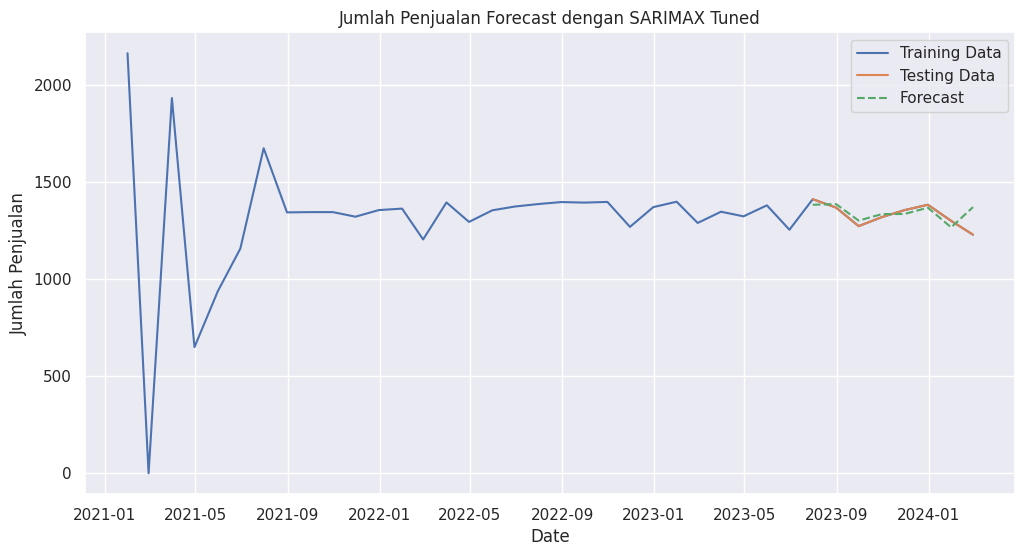

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_sarimax['revenue'], label='Training Data')
plt.plot(df_sarimax_forecast_revenue_tuned['Revenue_Test'], label='Testing Data')
plt.plot(df_sarimax_forecast_revenue_tuned['Revenue_Test_Forecast'], label='Forecast', linestyle='--')
plt.title('Jumlah Penjualan Forecast dengan SARIMAX Tuned')
plt.xlabel('Date')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()

#### Feature 1: Kepopuleran Brand

In [ ]:
df_brand = pd.DataFrame({'brand_populer':penjualan_per_bulan['total_kepopuleran']})
df_brand.head()

brand_populer
waktu                    
2021-01-31           1698
2021-02-28              0
2021-03-31           1494
2021-04-30            540
2021-05-31            762

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_size = int(len(df_brand) * 0.8)
train, test = df_brand.iloc[:train_size], df_brand.iloc[train_size:]

order = (1,0,1)
seasonal_order = (0, 1, 0, 7)

model_sarimax_brand = SARIMAX(train['brand_populer'], order=order, seasonal_order=seasonal_order)
model_sarimax_brand_fit = model_sarimax_brand.fit()
print(model_sarimax_brand_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                      brand_populer   No. Observations:                   30
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 7)   Log Likelihood                -157.367
Date:                            Thu, 06 Jun 2024   AIC                            320.734
Time:                                    07:21:09   BIC                            324.140
Sample:                                01-31-2021   HQIC                           321.590
                                     - 06-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9240      0.064    -14.389      0.000      -1.050      -0.798
ma.L1          0.3851      0.302   

In [ ]:
forecast_periods = len(test)
forecast_sarimax_brand = model_sarimax_brand_fit.forecast(steps=forecast_periods)

forecast_dates = pd.date_range(start=train.index[-1], periods=forecast_periods + 1, freq='1M')[1:]
forecast_df_sarimax_brand = pd.DataFrame({'tanggal': forecast_dates, 'brand_populer': forecast_sarimax_brand})
forecast_df_sarimax_brand.set_index('tanggal', inplace=True)

In [ ]:
forecast_df_sarimax_brand.round()

brand_populer
tanggal                  
2023-07-31         1044.0
2023-08-31         1058.0
2023-09-30          992.0
2023-10-31         1022.0
2023-11-30         1000.0
2023-12-31         1036.0
2024-01-31          987.0
2024-02-29         1043.0

In [ ]:
data_test = test['brand_populer']
data_forecast = forecast_df_sarimax_brand['brand_populer']

df_sarima_forecast_brand = pd.DataFrame(data={'BrandPopuler_Test': data_test, 'BrandPopuler_Test_Forecast': data_forecast})
df_sarima_forecast_brand

BrandPopuler_Test  BrandPopuler_Test_Forecast
2023-07-31               1052                 1044.331775
2023-08-31               1028                 1057.845382
2023-09-30                980                  991.990922
2023-10-31                994                 1022.160338
2023-11-30               1016                  999.699894
2023-12-31               1026                 1036.429256
2024-01-31                972                  987.451407
2024-02-29                954                 1042.990638

In [ ]:
evaluate_forecast(df_sarima_forecast_brand['BrandPopuler_Test'],df_sarima_forecast_brand['BrandPopuler_Test_Forecast'])

MAE          MSE      MAPE       RMSE
0  26.104534  1302.359721  2.653426  36.088221

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya adalah sekitar 26.10 pound.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 1302.36.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya adalah sekitar 2.65%.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 36.09 pound.

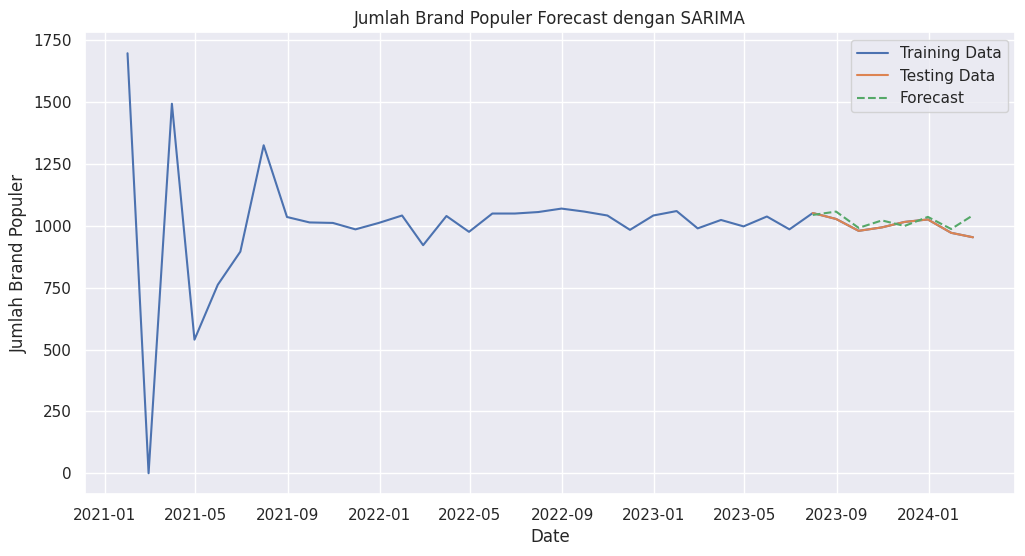

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_brand['brand_populer'], label='Training Data')
plt.plot(df_sarima_forecast_brand['BrandPopuler_Test'], label='Testing Data')
plt.plot(df_sarima_forecast_brand['BrandPopuler_Test_Forecast'], label='Forecast', linestyle='--')
plt.title('Jumlah Brand Populer Forecast dengan SARIMA')
plt.xlabel('Date')
plt.ylabel('Jumlah Brand Populer')
plt.legend()
plt.show()

#### Feature 2: Jumlah Permintaan

In [ ]:
df_permintaan = pd.DataFrame({'permintaan':penjualan_per_bulan['jumlah_penjualan_barang']})
df_permintaan.head()

permintaan
waktu                  
2021-01-31  3052.285747
2021-02-28     0.000000
2021-03-31  2717.469300
2021-04-30  1071.035129
2021-05-31  1531.760953

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_size = int(len(df_brand) * 0.8)
train, test = df_permintaan.iloc[:train_size], df_permintaan.iloc[train_size:]

order = (0,1,1)
seasonal_order = (1, 1, 0, 7)

model_sarima = SARIMAX(train['permintaan'], order=order, seasonal_order=seasonal_order)
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         permintaan   No. Observations:                   30
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 7)   Log Likelihood                -168.527
Date:                            Thu, 06 Jun 2024   AIC                            343.055
Time:                                    07:21:11   BIC                            346.328
Sample:                                01-31-2021   HQIC                           343.826
                                     - 06-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.279     -3.581      0.000      -1.547      -0.453
ar.S.L7       -0.4500      0.134   

In [ ]:
forecast_periods = len(test)
forecast_sarima = model_sarima_fit.forecast(steps=forecast_periods)

forecast_dates = pd.date_range(start=train.index[-1], periods=forecast_periods + 1, freq='1M')[1:]
forecast_df_sarima = pd.DataFrame({'tanggal': forecast_dates, 'permintaan': forecast_sarima})
forecast_df_sarima.set_index('tanggal', inplace=True)

In [ ]:
forecast_df_sarima.round()

permintaan
tanggal               
2023-07-31      1645.0
2023-08-31      1706.0
2023-09-30      1576.0
2023-10-31      1605.0
2023-11-30      1635.0
2023-12-31      1634.0
2024-01-31      1546.0
2024-02-29      1621.0

In [ ]:
data_test = test['permintaan']
data_forecast = forecast_df_sarima['permintaan']

df_sarima_forecast_permintaan = pd.DataFrame(data={'Permintaan_Test': data_test, 'Permintaan_Test_Forecast': data_forecast})
df_sarima_forecast_permintaan

Permintaan_Test  Permintaan_Test_Forecast
2023-07-31      1686.402922               1644.640142
2023-08-31      1672.744009               1705.734880
2023-09-30      1610.870788               1576.002556
2023-10-31      1648.727275               1605.176085
2023-11-30      1676.948840               1635.282077
2023-12-31      1663.741508               1633.810759
2024-01-31      1617.255828               1545.984084
2024-02-29      1596.770137               1621.467564

In [ ]:
evaluate_forecast(df_sarima_forecast_permintaan['Permintaan_Test'],df_sarima_forecast_permintaan['Permintaan_Test_Forecast'])

MAE          MSE      MAPE       RMSE
0  40.09247  1783.327558  2.436514  42.229463

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya adalah sekitar 40.09 pound.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 1783.33 pound^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya adalah sekitar 2.43%.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 42.22 pound.

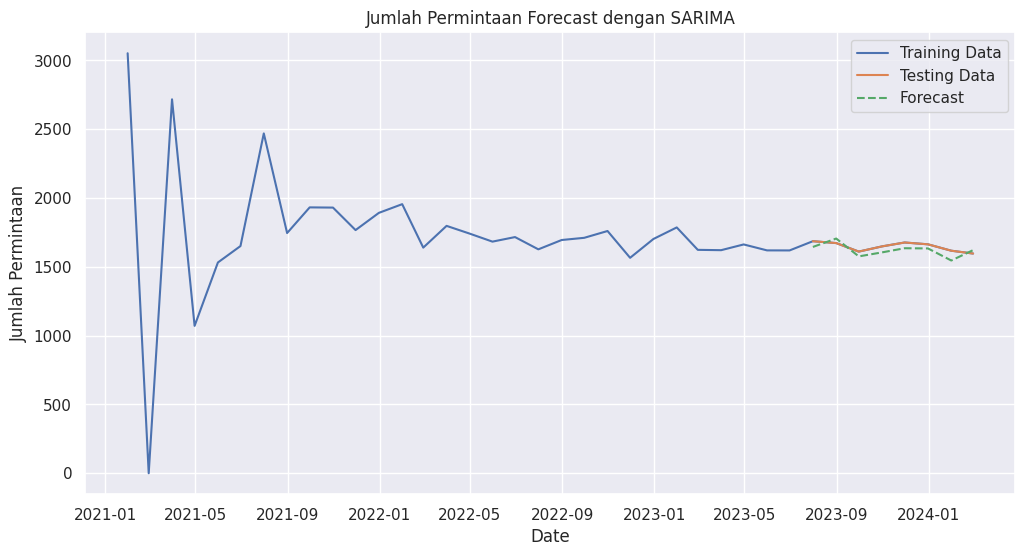

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_permintaan['permintaan'], label='Training Data')
plt.plot(df_sarima_forecast_permintaan['Permintaan_Test'], label='Testing Data')
plt.plot(df_sarima_forecast_permintaan['Permintaan_Test_Forecast'], label='Forecast', linestyle='--')
plt.title('Jumlah Permintaan Forecast dengan SARIMA')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.legend()
plt.show()

#### Feature 3: Jumlah Brand Sendiri

In [ ]:
df_brand_sendiri = pd.DataFrame({'Jumlah Brand Sendiri':penjualan_per_bulan['total_brand_sendiri']})
df_brand_sendiri.head()

Jumlah Brand Sendiri
waktu                           
2021-01-31                   576
2021-02-28                     0
2021-03-31                   517
2021-04-30                   199
2021-05-31                   249

In [ ]:
train_size = int(len(df_brand) * 0.8)
train, test = df_brand_sendiri.iloc[:train_size], df_brand_sendiri.iloc[train_size:]

order = (0,1,1)
seasonal_order = (1, 1, 0, 7)

model = SARIMAX(train['Jumlah Brand Sendiri'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:               Jumlah Brand Sendiri   No. Observations:                   30
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 7)   Log Likelihood                -134.917
Date:                            Thu, 06 Jun 2024   AIC                            275.834
Time:                                    07:21:13   BIC                            279.107
Sample:                                01-31-2021   HQIC                           276.605
                                     - 06-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995    122.590     -0.008      0.993    -241.271     239.272
ar.S.L7       -0.1160      0.869   

In [ ]:
forecast_periods = len(test)
forecast_brand = model_fit.forecast(steps=forecast_periods)

forecast_dates = pd.date_range(start=train.index[-1], periods=forecast_periods + 1, freq='1M')[1:]
df_forecast = pd.DataFrame({'tanggal': forecast_dates, 'jumlah_brand_sendiri': forecast_brand})
df_forecast.set_index('tanggal', inplace=True)

In [ ]:
df_forecast

jumlah_brand_sendiri
tanggal                         
2023-07-31            380.169713
2023-08-31            386.501293
2023-09-30            359.633786
2023-10-31            358.302205
2023-11-30            360.909986
2023-12-31            370.749804
2024-01-31            349.517767
2024-02-29            388.811498

In [ ]:
data_test = test['Jumlah Brand Sendiri']
data_forecast = df_forecast['jumlah_brand_sendiri']

df_sarima_forecast_brand_sendiri = pd.DataFrame(data={'Brand_Sendiri_Test': data_test, 'Brand_Sendiri_Forecast': data_forecast.round()})
df_sarima_forecast_brand_sendiri

Brand_Sendiri_Test  Brand_Sendiri_Forecast
2023-07-31                 372                   380.0
2023-08-31                 364                   387.0
2023-09-30                 339                   360.0
2023-10-31                 336                   358.0
2023-11-30                 357                   361.0
2023-12-31                 356                   371.0
2024-01-31                 345                   350.0
2024-02-29                 314                   389.0

In [ ]:
evaluate_forecast(df_sarima_forecast_brand_sendiri['Brand_Sendiri_Test'],df_sarima_forecast_brand_sendiri['Brand_Sendiri_Forecast'])

MAE      MSE      MAPE       RMSE
0  21.625  926.125  6.485011  30.432302

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya adalah sekitar 21.625 pound.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 926.125 pound^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya adalah sekitar 6.48%
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 30.43 pound.

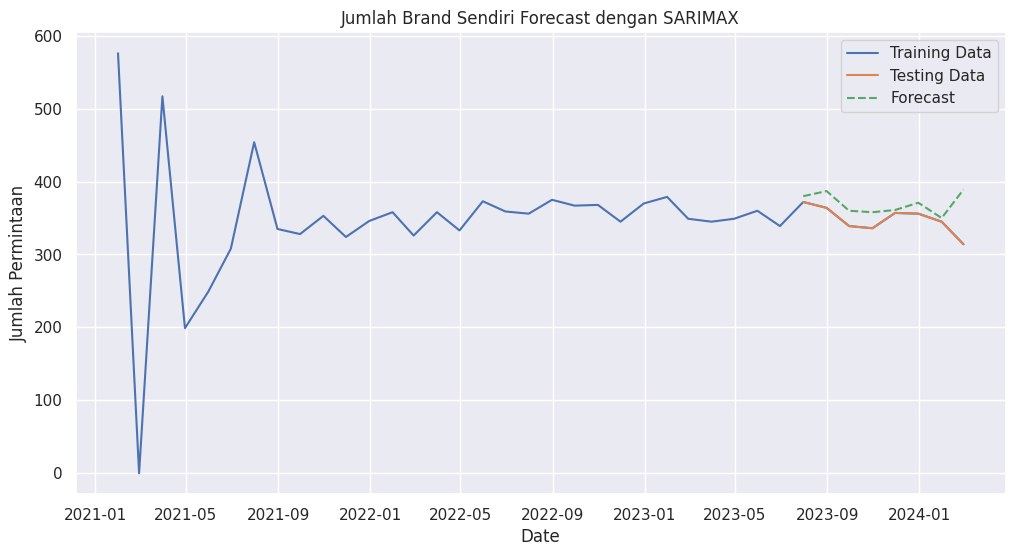

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_brand_sendiri['Jumlah Brand Sendiri'], label='Training Data')
plt.plot(df_sarima_forecast_brand_sendiri['Brand_Sendiri_Test'], label='Testing Data')
plt.plot(df_sarima_forecast_brand_sendiri['Brand_Sendiri_Forecast'], label='Forecast', linestyle='--')
plt.title('Jumlah Brand Sendiri Forecast dengan SARIMAX')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.legend()
plt.show()

### XGB based on SARIMAX

#### Baseline Model

In [ ]:
df_xgb_from_sarimax = pd.DataFrame(data={'revenue': df_sarimax['revenue'],
                                         'brand': df_brand['brand_populer'],
                                         'permintaan': df_permintaan['permintaan'],
                                         'brand_sendiri': df_brand_sendiri['Jumlah Brand Sendiri']
                                         },
                                   columns=['revenue', 'brand', 'permintaan', 'brand_sendiri']
                                  )
df_xgb_from_sarimax.head()

revenue  brand   permintaan  brand_sendiri
waktu                                                 
2021-01-31  2162.54   1698  3052.285747            576
2021-02-28     0.00      0     0.000000              0
2021-03-31  1931.62   1494  2717.469300            517
2021-04-30   649.36    540  1071.035129            199
2021-05-31   936.82    762  1531.760953            249

In [ ]:
train_size = int(len(df_xgb_from_sarimax) * 0.8)
train, valid = df_xgb_from_sarimax.iloc[:train_size], df_xgb_from_sarimax.iloc[train_size:]

In [ ]:
print(train.shape)
print(valid.shape)

(30, 4)
(8, 4)


In [ ]:
test = pd.DataFrame(data={'brand': df_sarima_forecast_brand['BrandPopuler_Test_Forecast'],
                          'permintaan': df_sarima_forecast_permintaan['Permintaan_Test_Forecast'],
                          'brand_sendiri': df_sarima_forecast_brand_sendiri['Brand_Sendiri_Forecast']
                          },
                    columns=['brand','permintaan', 'brand_sendiri']
                    )
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2023-07-31 to 2024-02-29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8 non-null      float64
 1   permintaan     8 non-null      float64
 2   brand_sendiri  8 non-null      float64
dtypes: float64(3)
memory usage: 256.0 bytes


In [ ]:
x_train = train.drop('revenue', axis = 1)
y_train = np.log1p(train['revenue'])
x_test = test

In [ ]:
print(x_train.shape)
print(y_train.shape)

(30, 3)
(30,)


In [ ]:
import xgboost as xgb

xgboost = xgb.XGBRegressor()
xgboost = xgboost.fit(x_train, y_train)

In [ ]:
y_pred = xgboost.predict(x_test)

In [ ]:
evaluate_xgb = pd.DataFrame()
##evaluate_xgb['y_valid'] = y_valid
evaluate_xgb['y_pred'] = y_pred
evaluate_xgb[evaluate_xgb['y_pred'] < 1] = 0
evaluate_xgb.head()

y_pred
0  7.216927
1  7.235177
2  7.144235
3  7.182154
4  7.190811

In [ ]:
y_pred = xgboost.predict(x_test)
revenue_xgb = pd.DataFrame({'revenue_feature_predict':np.expm1(y_pred).round(),
                            'revenue_asli':valid['revenue']})
revenue_xgb.index = test.index

In [ ]:
revenue_xgb

revenue_feature_predict  revenue_asli
2023-07-31                   1361.0       1411.04
2023-08-31                   1386.0       1367.85
2023-09-30                   1266.0       1272.38
2023-10-31                   1315.0       1318.98
2023-11-30                   1326.0       1354.81
2023-12-31                   1343.0       1382.46
2024-01-31                   1262.0       1299.46
2024-02-29                   1366.0       1228.47

In [ ]:
results_revenue_xgb = evaluate_forecast(revenue_xgb['revenue_asli'], revenue_xgb['revenue_feature_predict'])
results_revenue_xgb

MAE          MSE      MAPE       RMSE
0  40.22625  3199.353637  3.091898  56.562829

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya adalah sekitar 40.23 pound.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 3199.35 pound^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya adalah sekitar 3.09%.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 56.56 pound.

#### Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

xgb_params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}
random_search_xgb = RandomizedSearchCV(xgb.XGBRegressor(), param_distributions=xgb_params,
                                       scoring='neg_mean_absolute_error',
                                       n_iter=50, cv=5, random_state=42)
random_search_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [ ]:
print("\nBest parameters for XGBoost:", random_search_xgb.best_params_)


Best parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [ ]:
xgb_tuned = xgb.XGBRegressor(**random_search_xgb.best_params_)
xgboost_tuned = xgb_tuned.fit(x_train, y_train)

In [ ]:
y_pred_tuned = xgboost_tuned.predict(x_test)

In [ ]:
evaluate_xgb_after_tuning = pd.DataFrame()
##evaluate_xgb_after_tuning['y_valid'] = y_valid
evaluate_xgb_after_tuning['y_pred_aftertuned'] = y_pred_tuned
evaluate_xgb_after_tuning[evaluate_xgb_after_tuning['y_pred_aftertuned'] < 1] = 0
evaluate_xgb_after_tuning.head()

y_pred_aftertuned
0           7.206525
1           7.223953
2           7.170918
3           7.197893
4           7.207497

In [ ]:
y_pred_tuned = xgboost_tuned.predict(x_test)
revenue_xgb_tuned = pd.DataFrame({'revenue_feature_predict': np.expm1(y_pred_tuned).round(),
                            'revenue_asli':valid['revenue']})
revenue_xgb_tuned.index = test.index

In [ ]:
revenue_xgb_tuned

revenue_feature_predict  revenue_asli
2023-07-31                   1347.0       1411.04
2023-08-31                   1371.0       1367.85
2023-09-30                   1300.0       1272.38
2023-10-31                   1336.0       1318.98
2023-11-30                   1349.0       1354.81
2023-12-31                   1359.0       1382.46
2024-01-31                   1243.0       1299.46
2024-02-29                   1355.0       1228.47

In [ ]:
results_xgb_after_tuning = evaluate_forecast(revenue_xgb_tuned['revenue_asli'], revenue_xgb_tuned['revenue_feature_predict'])

In [ ]:
results_xgb_after_tuning

MAE          MSE      MAPE       RMSE
0  40.51125  3118.161137  3.125052  55.840497

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya adalah sekitar 40.51 pound.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 3118.16 pound^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya adalah sekitar 3.13%.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 55.84 pound.

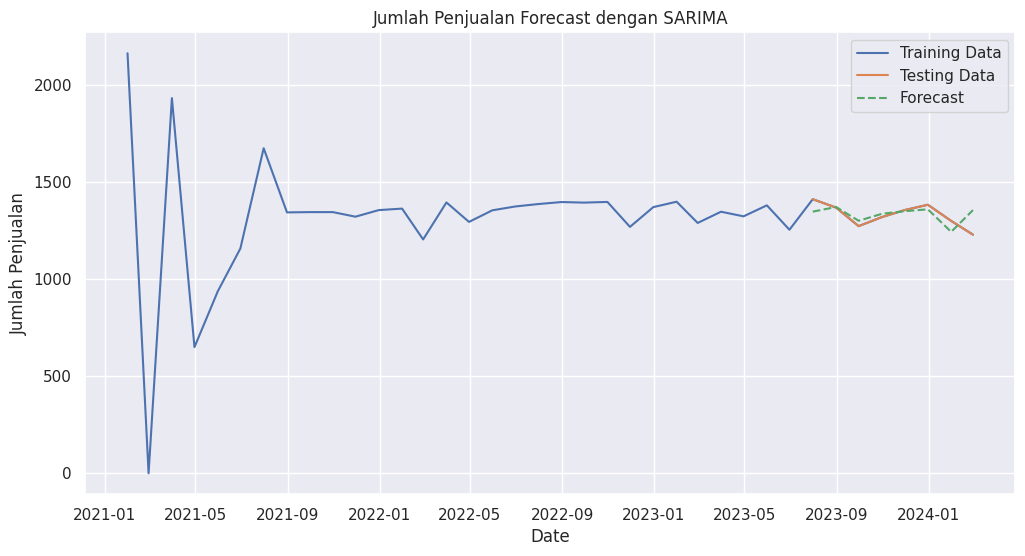

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_xgb_from_sarimax['revenue'], label='Training Data')
plt.plot(revenue_xgb_tuned['revenue_asli'], label='Testing Data')
plt.plot(revenue_xgb_tuned['revenue_feature_predict'], label='Forecast', linestyle='--')
plt.title('Jumlah Penjualan Forecast dengan SARIMA')
plt.xlabel('Date')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()

#### Feature Importances

In [ ]:
df_xgb_from_sarimax_fi = df_xgb_from_sarimax.copy()

In [ ]:
fi = pd.DataFrame(data=xgboost.feature_importances_,
             index=xgboost.feature_names_in_,
             columns=['Importance'])
fi

Importance
brand            0.999803
permintaan       0.000167
brand_sendiri    0.000030

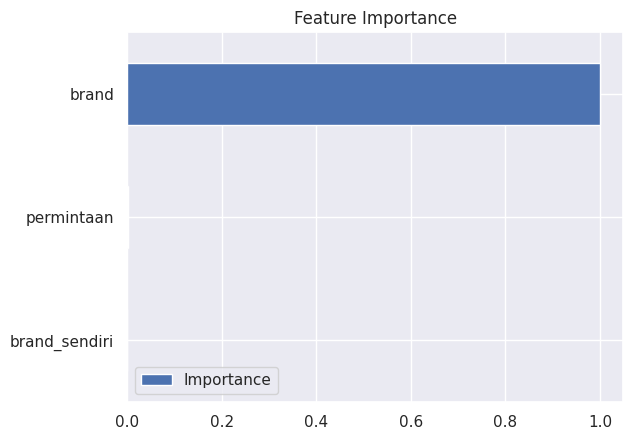

In [ ]:
fi.sort_values('Importance').plot(kind='barh', title='Feature Importance')
plt.show()

Fitur yang paling berpengaruh untuk memprediksi penjualan bakery UK Mart adalah fitur 'brand', yaitu total kepopuleran brand yang terjual. Sedangkan, dua fitur lainnya tidak terlalu banyak memberikan pengaruh. Selanjutnya akan dihapus fitur 'permintaan' dan 'brand_sendiri'.

In [ ]:
drop_feature = df_xgb_from_sarimax_fi.drop(['permintaan', 'brand_sendiri'], axis=1)

In [ ]:
train_size = int(len(drop_feature) * 0.8)
train_drop_feature, valid_drop_feature = drop_feature.iloc[:train_size], drop_feature.iloc[train_size:]

In [ ]:
print(train_drop_feature.shape)
print(valid_drop_feature.shape)

(30, 2)
(8, 2)


In [ ]:
test_drop_feature = pd.DataFrame(data={'brand': df_sarima_forecast_brand['BrandPopuler_Test_Forecast']},
                    columns=['brand'])
test_drop_feature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2023-07-31 to 2024-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   8 non-null      float64
dtypes: float64(1)
memory usage: 128.0 bytes


In [ ]:
x_train_drop_feature = train_drop_feature.drop('revenue', axis = 1)
y_train_drop_feature = np.log1p(train_drop_feature['revenue'])
x_valid_drop_feature = valid_drop_feature.drop('revenue', axis = 1)
y_valid_drop_feature = np.log1p(valid_drop_feature['revenue'])
x_test_drop_feature = test_drop_feature

In [ ]:
import xgboost as xgb

xgboost_fedrop = xgb.XGBRegressor()
xgboost_fedrop = xgboost.fit(x_train_drop_feature, y_train_drop_feature)

In [ ]:
y_pred_drop_feature = xgboost_fedrop.predict(x_valid_drop_feature)

In [ ]:
evaluate_xgb_fedrop = pd.DataFrame()
evaluate_xgb_fedrop['y_valid'] = y_valid_drop_feature
evaluate_xgb_fedrop['y_pred'] = y_pred_drop_feature
evaluate_xgb_fedrop[evaluate_xgb_fedrop['y_pred'] < 1] = 0
evaluate_xgb_fedrop.head()

y_valid    y_pred
waktu                         
2023-07-31  7.252791  7.219567
2023-08-31  7.221726  7.205680
2023-09-30  7.149430  7.164401
2023-10-31  7.185372  7.161016
2023-11-30  7.212154  7.205680

In [ ]:
y_pred = xgboost_fedrop.predict(x_test_drop_feature)
y_pred = pd.DataFrame(np.expm1(y_pred_drop_feature))

In [ ]:
y_pred

0
0  1364.897949
1  1346.060303
2  1291.587158
3  1287.219727
4  1346.060303
5  1346.060303
6  1203.876587
7  1203.876587

In [ ]:
data_valid_fe_drop = valid_drop_feature['revenue']
data_forecast_fe_drop = np.expm1(y_pred_drop_feature)

df_sarima_forecast_revenue_fe_drop = pd.DataFrame(data={'Revenue_Test': data_valid_fe_drop, 'Revenue_Test_Forecast': data_forecast_fe_drop})
df_sarima_forecast_revenue_fe_drop

Revenue_Test  Revenue_Test_Forecast
waktu                                          
2023-07-31       1411.04            1364.897949
2023-08-31       1367.85            1346.060303
2023-09-30       1272.38            1291.587158
2023-10-31       1318.98            1287.219727
2023-11-30       1354.81            1346.060303
2023-12-31       1382.46            1346.060303
2024-01-31       1299.46            1203.876587
2024-02-29       1228.47            1203.876587

In [ ]:
results_xgb_fe_drop = evaluate_forecast(df_sarima_forecast_revenue_fe_drop['Revenue_Test'],
                                        df_sarima_forecast_revenue_fe_drop['Revenue_Test_Forecast']
                                        )
results_xgb_fe_drop

MAE          MSE      MAPE       RMSE
0  35.528175  1890.503705  2.677115  43.479923

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya adalah sekitar 35.53 pound.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 1890.50 pound^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya adalah sekitar 2.68%.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 43.48 pound.

#### Feature Importances Tuning

In [ ]:
train_size = int(len(drop_feature) * 0.8)
train_drop_feature, valid_drop_feature = drop_feature.iloc[:train_size], drop_feature.iloc[train_size:]

In [ ]:
test_drop_feature = pd.DataFrame(data={'brand': df_sarima_forecast_brand['BrandPopuler_Test_Forecast']
                          ##'permintaan': df_sarima_forecast_permintaan['Permintaan_Test_Forecast']
                                       },
                    columns=['brand'])
test_drop_feature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2023-07-31 to 2024-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   8 non-null      float64
dtypes: float64(1)
memory usage: 128.0 bytes


In [ ]:
x_train_drop_feature = train_drop_feature.drop('revenue', axis = 1)
y_train_drop_feature = np.log1p(train_drop_feature['revenue'])
x_valid_drop_feature = valid_drop_feature.drop('revenue', axis = 1)
y_valid_drop_feature = np.log1p(valid_drop_feature['revenue'])
x_test_drop_feature = test_drop_feature

In [ ]:
xgb_params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}
random_search_xgb = RandomizedSearchCV(xgb.XGBRegressor(), param_distributions=xgb_params,
                                       scoring='neg_mean_absolute_error',
                                       n_iter=50, cv=5, random_state=42)
random_search_xgb.fit(x_train_drop_feature, y_train_drop_feature)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [ ]:
print("\nBest parameters for XGBoost by Feature Importances:", random_search_xgb.best_params_)


Best parameters for XGBoost by Feature Importances: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}


In [ ]:
xgb_tuned_fe = xgb.XGBRegressor(**random_search_xgb.best_params_)
xgboost_tuned_fe = xgb_tuned_fe.fit(x_train_drop_feature, y_train_drop_feature)

In [ ]:
y_pred_tuned_fe = xgboost_tuned_fe.predict(x_test_drop_feature)

In [ ]:
revenue_xgb_fe_tuned = pd.DataFrame({'revenue_feature_predict': np.expm1(y_pred_tuned_fe).round(),
                            'revenue_asli':valid_drop_feature['revenue']})
revenue_xgb_fe_tuned.index = test.index

In [ ]:
revenue_xgb_fe_tuned

revenue_feature_predict  revenue_asli
2023-07-31                   1376.0       1411.04
2023-08-31                   1383.0       1367.85
2023-09-30                   1292.0       1272.38
2023-10-31                   1345.0       1318.98
2023-11-30                   1322.0       1354.81
2023-12-31                   1352.0       1382.46
2024-01-31                   1288.0       1299.46
2024-02-29                   1376.0       1228.47

In [ ]:
results_xgb_fe_drop_tuned = evaluate_forecast(revenue_xgb_fe_tuned['revenue_asli'],
                                        revenue_xgb_fe_tuned['revenue_feature_predict']
                                        )
results_xgb_fe_drop_tuned

MAE          MSE      MAPE       RMSE
0  39.76125  3302.506137  3.077724  57.467435

#### Plot

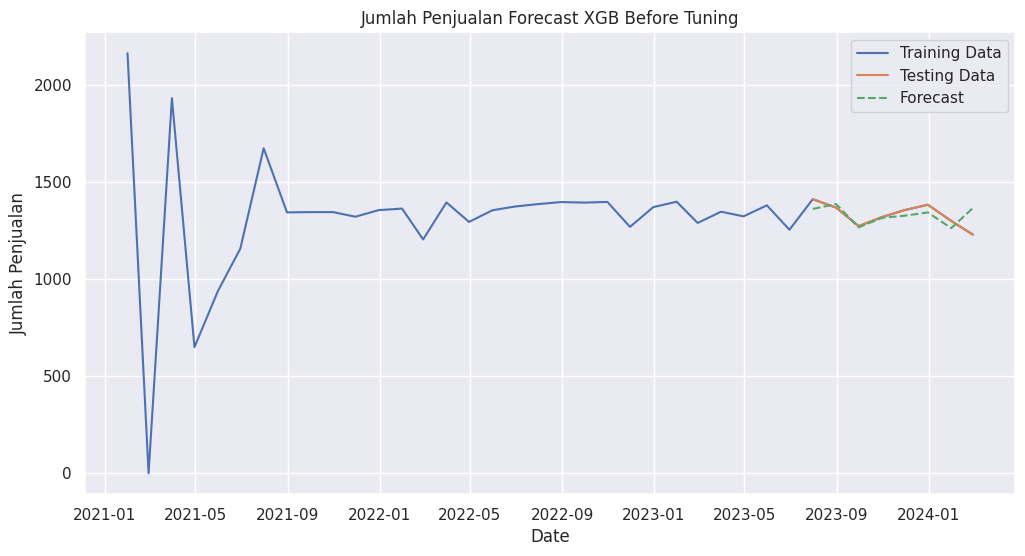

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_xgb_from_sarimax['revenue'], label='Training Data')
plt.plot(revenue_xgb['revenue_asli'], label='Testing Data')
plt.plot(revenue_xgb['revenue_feature_predict'], label='Forecast', linestyle='--')
plt.title('Jumlah Penjualan Forecast XGB Before Tuning')
plt.xlabel('Date')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()

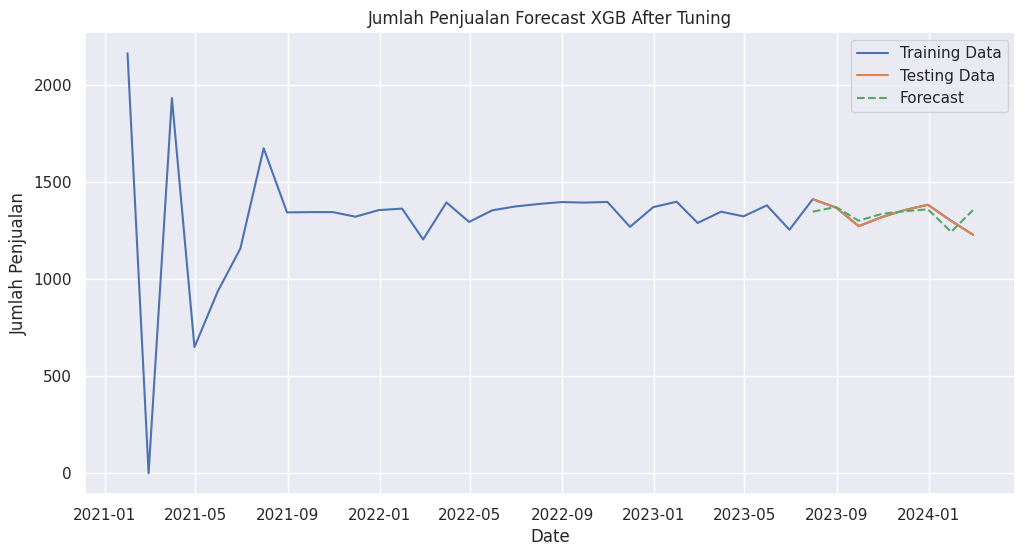

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_xgb_from_sarimax['revenue'], label='Training Data')
plt.plot(revenue_xgb_tuned['revenue_asli'], label='Testing Data')
plt.plot(revenue_xgb_tuned['revenue_feature_predict'], label='Forecast', linestyle='--')
plt.title('Jumlah Penjualan Forecast XGB After Tuning')
plt.xlabel('Date')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()

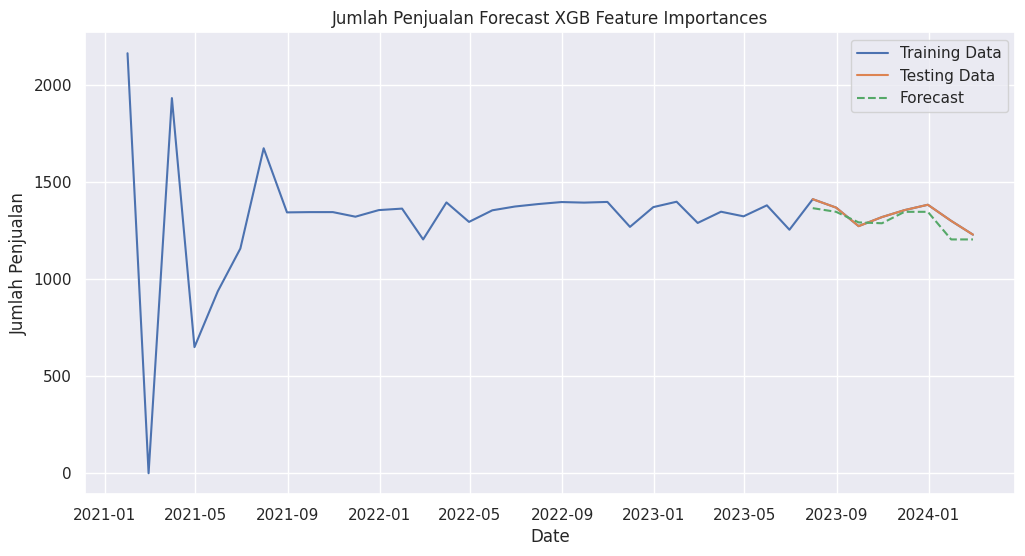

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_xgb_from_sarimax['revenue'], label='Training Data')
plt.plot(df_sarima_forecast_revenue_fe_drop['Revenue_Test'], label='Testing Data')
plt.plot(df_sarima_forecast_revenue_fe_drop['Revenue_Test_Forecast'], label='Forecast', linestyle='--')
plt.title('Jumlah Penjualan Forecast XGB Feature Importances')
plt.xlabel('Date')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()

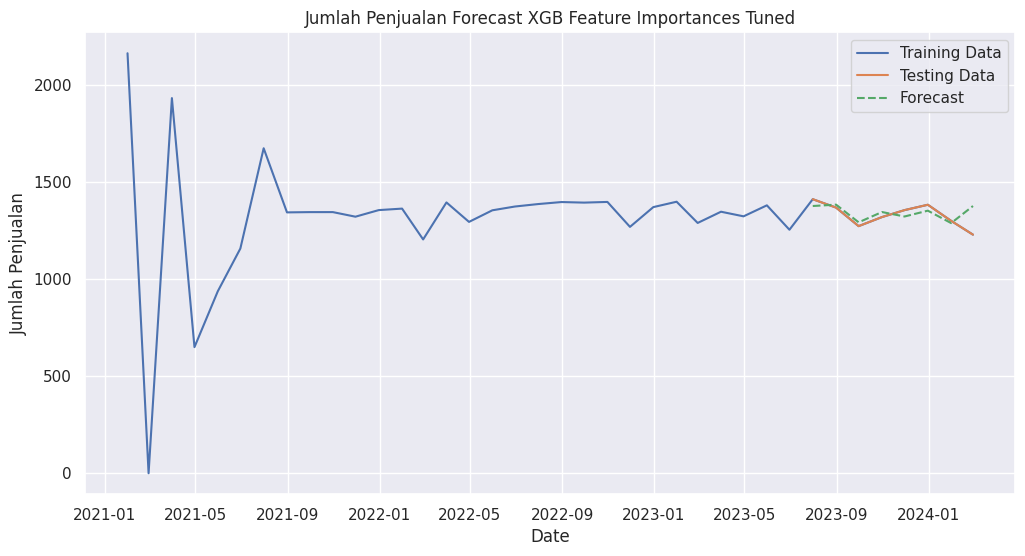

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_xgb_from_sarimax['revenue'], label='Training Data')
plt.plot(revenue_xgb_fe_tuned['revenue_asli'], label='Testing Data')
plt.plot(revenue_xgb_fe_tuned['revenue_feature_predict'], label='Forecast', linestyle='--')
plt.title('Jumlah Penjualan Forecast XGB Feature Importances Tuned')
plt.xlabel('Date')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()

#### Metric Evaluation

In [ ]:
metric_xgb = pd.DataFrame({
    'XGB': results_revenue_xgb.values[0],
    'XGB Tuned': results_xgb_after_tuning.values[0],
    'XGB Feature Importances': results_xgb_fe_drop.values[0],
    'XGB Feature Importances Tuned': results_xgb_fe_drop_tuned.values[0]
}, index=results_revenue_xgb.columns)
metric_xgb

XGB    XGB Tuned  XGB Feature Importances  \
MAE     40.226250    40.511250                35.528175   
MSE   3199.353637  3118.161137              1890.503705   
MAPE     3.091898     3.125052                 2.677115   
RMSE    56.562829    55.840497                43.479923   

      XGB Feature Importances Tuned  
MAE                       39.761250  
MSE                     3302.506137  
MAPE                       3.077724  
RMSE                      57.467435

Dari keempat model yang dilakukan pada baseline model XGB, diperoleh bahwa XGB by Feature Importances before Tuning memiliki MAE dan MAPE yang paling rendah.

### Model Summary

In [ ]:
metric_sarimax = pd.DataFrame({
    'SARIMAX': evaluate_sarimax.values[0],
    'SARIMAX Tuned': evaluate_sarimax_tuned.values[0]
}, index=evaluate_sarimax.columns)
metric_sarimax

SARIMAX  SARIMAX Tuned
MAE     39.518749      37.616447
MSE   3247.142462    3006.098104
MAPE     3.075881       2.930235
RMSE    56.983703      54.827895

In [ ]:
metric_xgb

XGB    XGB Tuned  XGB Feature Importances  \
MAE     40.226250    40.511250                35.528175   
MSE   3199.353637  3118.161137              1890.503705   
MAPE     3.091898     3.125052                 2.677115   
RMSE    56.562829    55.840497                43.479923   

      XGB Feature Importances Tuned  
MAE                       39.761250  
MSE                     3302.506137  
MAPE                       3.077724  
RMSE                      57.467435

#### Metric Evaluation

In [ ]:
metric_summary = pd.concat([metric_sarimax,
                            metric_xgb], axis=1)
metric_summary_transpose_sorted = metric_summary.transpose().sort_values(by='MAE')
metric_summary_transpose_sorted

MAE          MSE      MAPE       RMSE
XGB Feature Importances        35.528175  1890.503705  2.677115  43.479923
SARIMAX Tuned                  37.616447  3006.098104  2.930235  54.827895
SARIMAX                        39.518749  3247.142462  3.075881  56.983703
XGB Feature Importances Tuned  39.761250  3302.506137  3.077724  57.467435
XGB                            40.226250  3199.353637  3.091898  56.562829
XGB Tuned                      40.511250  3118.161137  3.125052  55.840497

Kesimpulan Utama:

XGB Feature Importances adalah model dengan performa terbaik, memiliki nilai MAE dan MAPE terendah yang menunjukkan tingkat kesalahan prediksi terkecil.
SARIMAX Tuned juga menunjukkan performa yang baik dan merupakan alternatif yang layak dengan kesalahan prediksi yang relatif rendah.
Model lainnya, seperti SARIMAX, XGB Feature Importances Tuned, XGB, dan XGB Tuned, memiliki kesalahan yang lebih besar dibandingkan dengan dua model terbaik ini.
Secara keseluruhan, untuk meminimalkan kesalahan prediksi dalam pound, model XGB Feature Importances adalah pilihan terbaik.

## Prediksi Permintaan Bakery (Kg)

Prediksi permintaan bakery akan dilakukan dengan menggunakan 3 baseline model, yaitu ARIMA, SARIMAX, dan Prophet. Alasan dipilihnya ARIMA, SARIMAX, dan Prophet adalah sebagai berikut.

* ARIMA dapat menangani berbagai jenis pola data, termasuk trend dan seasonality setelah diferensiasi yang tepat. Ini menjadikan ARIMA fleksibel untuk berbagai jenis data time series.

* SARIMAX mampu menangkap pola musiman dalam data penjualan bakery. Pada data penjualan bakery, terdapat pola musiman yaitu setiap bulan Februari terjadi penurunan sedangkan bulan Juli mengalami kenaikan. Jadi, model SARIMAX layak untuk dicoba sebagai baseline model. Model SARIMAX, yang merupakan model tradisional time series, juga relatif mudah diinterpretasikan dibandingkan dengan model machine learning.

* Prophet secara eksplisit mampu menangani komponen musiman dan efek liburan, yang sering kali penting dalam prediksi permintaan bakery. Model ini dapat dengan mudah mengintegrasikan informasi tentang hari libur atau event spesial ke dalam prediksi. Prophet dirancang untuk robust terhadap data hilang dan outlier, yang sering kali merupakan tantangan dalam analisis data time series. Ini memastikan bahwa model dapat memberikan prediksi yang baik meskipun data yang tersedia tidak sempurna. Prophet juga menyediakan banyak parameter yang dapat disesuaikan dengan mudah, seperti komponen musiman harian, mingguan, dan tahunan, serta efek liburan. Ini memberikan fleksibilitas yang besar dalam menyesuaikan model dengan karakteristik spesifik data bakery.

##### Filter data kategori bakery dan unit kg

In [ ]:
# Menyaring data
bakery_data = df_encoded[df_encoded['kategori'] == 'bakery']
df_kg = bakery_data[bakery_data['unit_kg'] == 1.0]

In [ ]:
df_kg

nama_toko  harga_pound  harga_per_unit  \
14139      UKMart         1.35             5.7   
14141      UKMart         1.30             1.6   
14142      UKMart         1.39             1.7   
14143      UKMart         1.85             2.3   
14146      UKMart         1.40             1.8   
...           ...          ...             ...   
1157906    UKMart         2.00             8.0   
1158029    UKMart         1.90             2.4   
1158183    UKMart         1.10             2.8   
1158184    UKMart         2.00             5.0   
1158238    UKMart         1.75             6.4   

                                                      nama kategori  \
14139    McVitie's The Original Jaffa Cakes Twin Pack x...   bakery   
14141             Kingsmill Medium Sliced 50/50 Bread 800g   bakery   
14142            Hovis Soft Medium Sliced White Bread 800g   bakery   
14143    Hovis Seed Sensations Seven Seeds Medium Slice...   bakery   
14146     Warburtons Toastie Thick Sliced White Bread 800g   bakery   
...                                                    ...      ...   
1157906                  Sainsbury's Plain Madeleines 250g   bakery   
1158029                    Black Sheep Seeded Bloomer 800g   bakery   
1158183             Sainsbury's Farmhouse White Bread 400g   bakery   
1158184              Kelderman German Style Rye Bread 400g   bakery   
1158238           Sainsbury's Madeira Cake 275g (Serves 8)   bakery   

           tanggal  tahun  bulan  hari  jumlah permintaan  ...    kepopuleran  \
14139   2021-01-14   2021      1    14           0.236842  ...  Tidak Populer   
14141   2021-01-14   2021      1    14           0.812500  ...  Tidak Populer   
14142   2021-01-14   2021      1    14           0.817647  ...  Tidak Populer   
14143   2021-01-14   2021      1    14           0.804348  ...  Tidak Populer   
14146   2021-01-14   2021      1    14           0.777778  ...  Tidak Populer   
...            ...    ...    ...   ...                ...  ...            ...   
1157906 2024-02-29   2024      2    29           0.250000  ...  Tidak Populer   
1158029 2021-01-28   2021      1    28           0.791667  ...  Tidak Populer   
1158183 2021-08-02   2021      8     2           0.392857  ...  Tidak Populer   
1158184 2021-08-03   2021      8     3           0.400000  ...  Tidak Populer   
1158238 2021-10-04   2021     10     4           0.273438  ...  Tidak Populer   

        brand_sendiri_encoded  fluktuatif_encoded  penurunan_drastis_encoded  \
14139                       0                   1                          0   
14141                       0                   1                          0   
14142                       0                   1                          0   
14143                       0                   1                          0   
14146                       0                   1                          0   
...                       ...                 ...                        ...   
1157906                     1                   0                          1   
1158029                     0                   1                          0   
1158183                     1                   0                          0   
1158184                     0                   0                          0   
1158238                     1                   0                          0   

         peningkatan_drastis_encoded  kepopuleran_encoded  unit_kg  unit_l  \
14139                              0                    2      1.0     0.0   
14141                              0                    2      1.0     0.0   
14142                              0                    2      1.0     0.0   
14143                              0                    2      1.0     0.0   
14146                              0                    2      1.0     0.0   
...                              ...                  ...      ...     ...   
1157906                            0                    2      1.0     0.0

In [ ]:
df_kg['tanggal'] = pd.to_datetime(df_kg['tanggal'])

In [ ]:
df_kg_coba = df_kg.copy()

##### Membagi data per dua minggu

In [ ]:
df_kg_coba['tanggal'] = pd.to_datetime(df_kg_coba['tanggal'])

# Set index ke kolom 'tanggal'
df_kg_coba.set_index('tanggal', inplace=True)

# Resample data untuk periode 2 minggu dan hitung total jumlah permintaan
total_permintaan_2w = df_kg_coba['jumlah permintaan'].resample('2W').sum()

# Reset index untuk merubah kembali menjadi DataFrame biasa
total_permintaan_2w = total_permintaan_2w.reset_index()

# Merge hasil resample kembali ke DataFrame asli
df_kg_coba = df_kg_coba.reset_index()

In [ ]:
total_permintaan_2w

tanggal  jumlah permintaan
0  2021-01-17          77.880769
1  2021-01-31         150.623997
2  2021-02-14           0.000000
3  2021-02-28           0.000000
4  2021-03-14          73.039877
..        ...                ...
78 2024-01-14          56.959999
79 2024-01-28          67.006434
80 2024-02-11          60.417576
81 2024-02-25          55.938482
82 2024-03-10          20.424901

[83 rows x 2 columns]

In [ ]:
d5_kg = total_permintaan_2w.copy()

# Sort by Date to ensure correct period numbering
d5_kg = d5_kg.sort_values('tanggal').reset_index(drop=True)

# Calculate the period number (2 weeks per period)
start_date = d5_kg['tanggal'].min()
d5_kg['Period Number'] = ((d5_kg['tanggal'] - start_date).dt.days // 14) + 1

# Create the "Period-n" labels
d5_kg['Period Label'] = 'Period-' + d5_kg['Period Number'].astype(str)

# Display the result
d5_kg

tanggal  jumlah permintaan  Period Number Period Label
0  2021-01-17          77.880769              1     Period-1
1  2021-01-31         150.623997              2     Period-2
2  2021-02-14           0.000000              3     Period-3
3  2021-02-28           0.000000              4     Period-4
4  2021-03-14          73.039877              5     Period-5
..        ...                ...            ...          ...
78 2024-01-14          56.959999             79    Period-79
79 2024-01-28          67.006434             80    Period-80
80 2024-02-11          60.417576             81    Period-81
81 2024-02-25          55.938482             82    Period-82
82 2024-03-10          20.424901             83    Period-83

[83 rows x 4 columns]

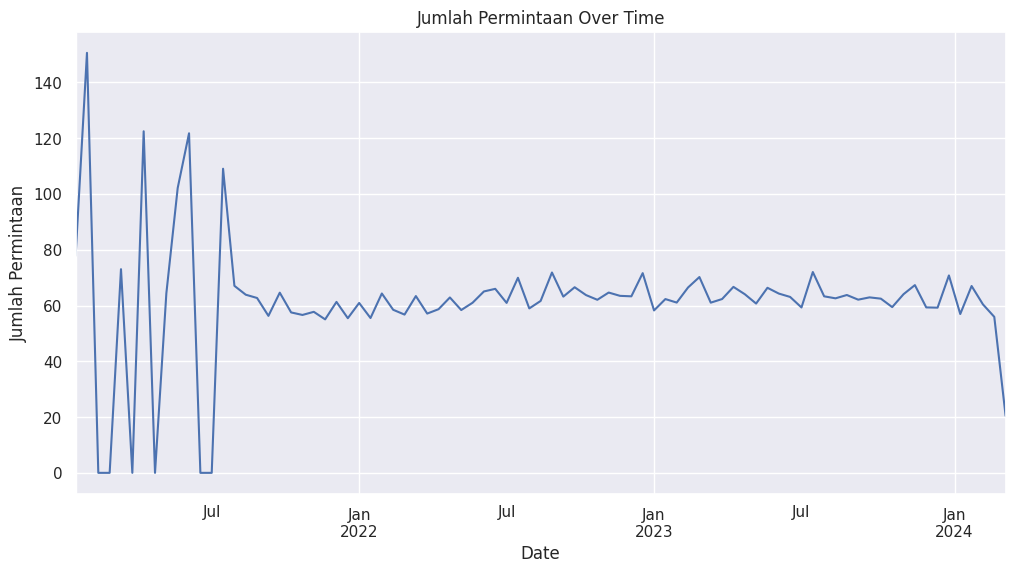

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

d5_kg['tanggal'] = pd.to_datetime(d5_kg['tanggal'])
d5_kg.set_index('tanggal', inplace=True)

d5_kg['jumlah permintaan'].plot(figsize=(12, 6))
plt.title('Jumlah Permintaan Over Time')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.show()

#### Split

In [ ]:
# Split data menjadi train dan test untuk evaluasi
train_size = int(len(d5_kg) * 0.8)
train, test = d5_kg.iloc[:train_size], d5_kg.iloc[train_size:]

#### Metric Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error,r2_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

def evaluate_forecast(y,pred):
    results = pd.DataFrame({'MAE':mean_absolute_error(y, pred),}, index=[0])
   ## results['mean absolute error'] = mean_absolute_error(y, pred)
   ## results['median absolute error'] = median_absolute_error(y, pred)
    results['MSE'] = mean_squared_error(y, pred)
    results['MAPE'] = mean_absolute_percentage_error(y, pred) * 100
    results['RMSE'] = np.sqrt(results['MSE'])
    return results

### ARIMA

##### Before tuning

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data menjadi train dan test untuk evaluasi
train_size = int(len(d5_kg) * 0.8)
train, test = d5_kg.iloc[:train_size], d5_kg.iloc[train_size:]

# Parameter ARIMA (p, d, q)
p, d, q = 1, 1, 1

# Latih model ARIMA
model = ARIMA(train['jumlah permintaan'], order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)


In [ ]:
# Tentukan jumlah periode untuk forecasting
forecast_periods = len(test)
forecast = model_fit.forecast(steps=forecast_periods)

# Buat DataFrame untuk hasil prediksi
forecast_dates = pd.date_range(start=train.index[-1], periods=forecast_periods + 1, freq='2W')[1:]
forecast_d5_kg = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': forecast})
forecast_d5_kg.set_index('tanggal', inplace=True)

In [ ]:
test.head()

jumlah permintaan  Period Number Period Label
tanggal                                                  
2023-07-30          63.306073             67    Period-67
2023-08-13          62.587005             68    Period-68
2023-08-27          63.780081             69    Period-69
2023-09-10          62.108366             70    Period-70
2023-09-24          62.929242             71    Period-71

In [ ]:
forecast_d5_kg.head()

jumlah permintaan
tanggal                      
2023-07-30          59.488035
2023-08-13          62.001861
2023-08-27          61.497674
2023-09-10          61.598797
2023-09-24          61.578515

In [ ]:
evaluate_arima = evaluate_forecast(test['jumlah permintaan'], forecast_d5_kg['jumlah permintaan'])
evaluate_arima

MAE         MSE       MAPE       RMSE
0  5.389486  114.123598  16.554923  10.682865

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai MAE 5.39 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 5.39 kg produk bakery dari nilai sebenarnya.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai MSE 114.12 mengindikasikan bahwa rata-rata kesalahan kuadrat prediksi adalah sekitar 114.12 kg^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya. Nilai MAPE 16.55 menunjukkan bahwa rata-rata kesalahan persentase prediksi adalah sekitar 16.55% dari nilai sebenarnya.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai RMSE 10.68 menunjukkan bahwa akar rata-rata kesalahan kuadrat prediksi adalah sekitar 10.68 kg produk bakery.

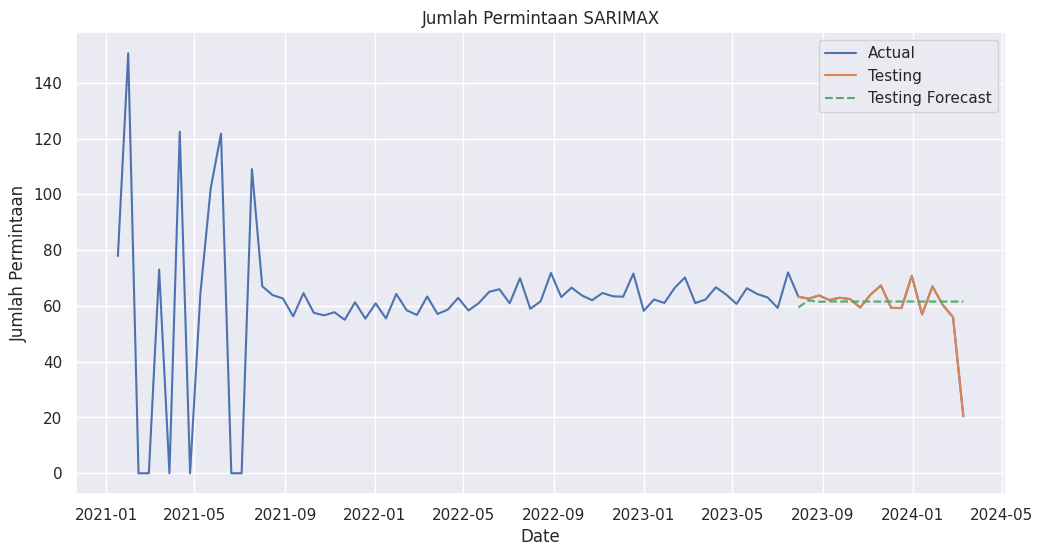

In [ ]:
# Plot hasil prediksi dan actual
plt.figure(figsize=(12, 6))
plt.plot(d5_kg['jumlah permintaan'], label='Actual')
plt.plot(test['jumlah permintaan'], label='Testing')
plt.plot(forecast_d5_kg['jumlah permintaan'], label='Testing Forecast', linestyle='--')
plt.title('Jumlah Permintaan SARIMAX')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.legend()
plt.show()

##### Tuning

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data menjadi train dan test untuk evaluasi
train_size = int(len(d5_kg) * 0.8)
train, test = d5_kg.iloc[:train_size], d5_kg.iloc[train_size:]

# Tentukan parameter grid untuk ARIMA (p, d, q)
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_score, best_params = float("inf"), None

In [ ]:
# Hyperparameter tuning dengan Grid Search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model_arima = ARIMA(train['jumlah permintaan'], order=(p, d, q))
                model_arima_fit = model_arima.fit()
                forecast_arima = model_arima_fit.forecast(steps=len(test))
                mape_arima = mean_absolute_percentage_error(test['jumlah permintaan'], forecast_arima)
                if mape_arima < best_score:
                    best_score, best_params = mape_arima, (p, d, q)
            except:
                continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be use

In [ ]:
print(f'Best ARIMA {best_params} MAPE={best_score}')

Best ARIMA (1, 1, 2) MAPE=0.1627381998727012


In [ ]:
# Latih model ARIMA dengan parameter terbaik
best_p, best_d, best_q = best_params
model_arima_best = ARIMA(train['jumlah permintaan'], order=(best_p, best_d, best_q))
model_arima_fit_best = model_arima_best.fit()

# Tentukan jumlah periode untuk forecasting
forecast_periods = len(test)
forecast_arima_best = model_arima_fit_best.forecast(steps=forecast_periods)

# Buat DataFrame untuk hasil prediksi
forecast_dates = test.index
forecast_df_arima_best = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': forecast_arima_best})
forecast_df_arima_best.set_index('tanggal', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_df_arima_best.head()

jumlah permintaan
tanggal                      
2023-07-30          60.849267
2023-08-13          62.460387
2023-08-27          60.997731
2023-09-10          62.325603
2023-09-24          61.120094

In [ ]:
evaluate_arima_tuned = evaluate_forecast(test['jumlah permintaan'], forecast_df_arima_best)
evaluate_arima_tuned

MAE         MSE      MAPE       RMSE
0  5.217354  112.971829  16.27382  10.628821

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai MAE 5.39 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 5.22 kg produk bakery dari nilai sebenarnya.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai MSE 112.97 mengindikasikan bahwa rata-rata kesalahan kuadrat prediksi adalah sekitar 112.97 kg^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya. Nilai MAPE 16.27 menunjukkan bahwa rata-rata kesalahan persentase prediksi adalah sekitar 16.27% dari nilai sebenarnya.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai RMSE 10.63 menunjukkan bahwa akar rata-rata kesalahan kuadrat prediksi adalah sekitar 10.63 kg produk bakery.

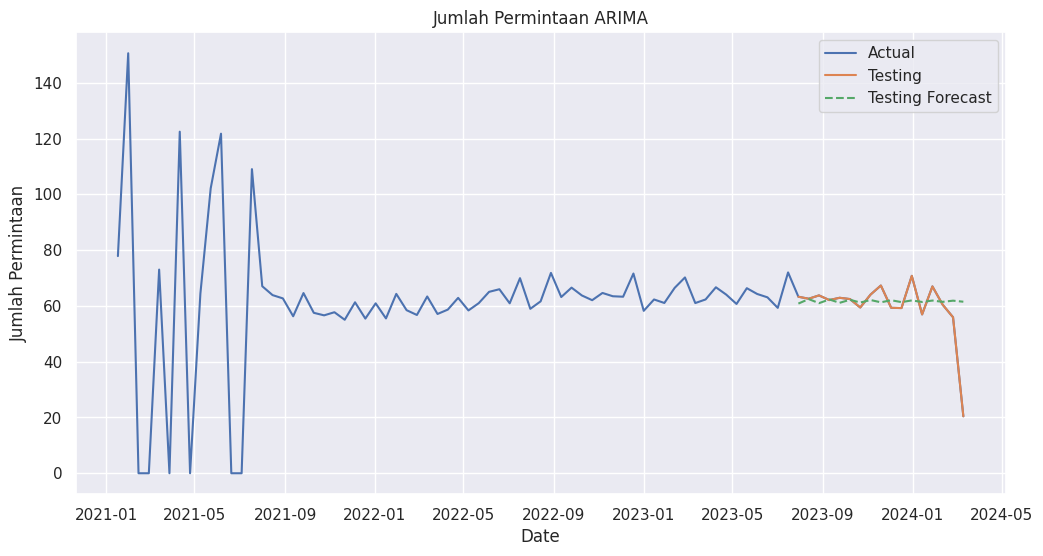

In [ ]:
# Plot hasil prediksi dan actual
plt.figure(figsize=(12, 6))
plt.plot(d5_kg['jumlah permintaan'], label='Actual')
plt.plot(test['jumlah permintaan'], label='Testing')
plt.plot(forecast_df_arima_best['jumlah permintaan'], label='Testing Forecast', linestyle='--')
plt.title('Jumlah Permintaan ARIMA')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.legend()
plt.show()

#### Metric Evaluation

In [ ]:
metric_arima = pd.DataFrame({
    'ARIMA': evaluate_arima.values[0],
    'ARIMA Tuned': evaluate_arima_tuned.values[0]
}, index=evaluate_arima_tuned.columns)
metric_arima

ARIMA  ARIMA Tuned
MAE     5.389486     5.217354
MSE   114.123598   112.971829
MAPE   16.554923    16.273820
RMSE   10.682865    10.628821

Model ARIMA Tuned memiliki performa yang lebih baik dibandingkan dengan model ARIMA standar. Ini terlihat dari nilai MAE dan MAPE yang lebih rendah, menunjukkan bahwa model ARIMA Tuned lebih akurat dalam memprediksi berat produk dalam kilogram.\
Perbedaan antara kedua model tidak terlalu signifikan, tetapi ARIMA Tuned tetap merupakan pilihan yang lebih baik dengan kesalahan yang lebih kecil dalam prediksi. Dengan target dalam kilogram produk, ARIMA Tuned adalah model yang lebih disarankan dari baseline ini untuk digunakan karena memberikan prediksi yang lebih akurat dan lebih andal.

### SARIMAX

#### Before Tuning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data menjadi train dan test untuk evaluasi
train_size = int(len(d5_kg) * 0.8)
train, test = d5_kg.iloc[:train_size], d5_kg.iloc[train_size:]

# Tentukan parameter SARIMAX (p, d, q, P, D, Q, s)
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order
P = 1  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
s = 6  # Seasonal period (6 periods per season, 2 weeks per period)

In [ ]:
# Buat model SARIMAX
model_sarimax = SARIMAX(train['jumlah permintaan'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_sarimax_fit = model_sarimax.fit()

# Lihat ringkasan model
print(model_sarimax_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                 jumlah permintaan   No. Observations:                   66
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -282.577
Date:                           Fri, 07 Jun 2024   AIC                            575.153
Time:                                   06:30:48   BIC                            585.541
Sample:                               01-17-2021   HQIC                           579.208
                                    - 07-16-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1464      0.090     -1.629      0.103      -0.322       0.030
ma.L1         -0.9999    231.283     -0.004

In [ ]:
# Tentukan jumlah periode untuk forecasting
forecast_periods3 = len(test)
forecast_sarimax = model_sarimax_fit.forecast(steps=forecast_periods3)

# Buat DataFrame untuk hasil prediksi
forecast_dates = pd.date_range(start=train.index[-1], periods=forecast_periods3 + 1, freq='2W')[1:]
forecast_sarimax = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': forecast_sarimax})
forecast_sarimax.set_index('tanggal', inplace=True)

In [ ]:
evaluate_sarimax = evaluate_forecast(test['jumlah permintaan'], forecast_sarimax)
evaluate_sarimax

MAE         MSE       MAPE       RMSE
0  6.999253  149.648427  20.312806  12.233087

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai MAE 6.99 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 6.99 kg produk bakery dari nilai sebenarnya.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai MSE 149.65 mengindikasikan bahwa rata-rata kesalahan kuadrat prediksi adalah sekitar 149.65 kg^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya. Nilai MAPE 20.31 menunjukkan bahwa rata-rata kesalahan persentase prediksi adalah sekitar 20.31% dari nilai sebenarnya.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai RMSE 12.23 menunjukkan bahwa akar rata-rata kesalahan kuadrat prediksi adalah sekitar 12.23 kg produk bakery.

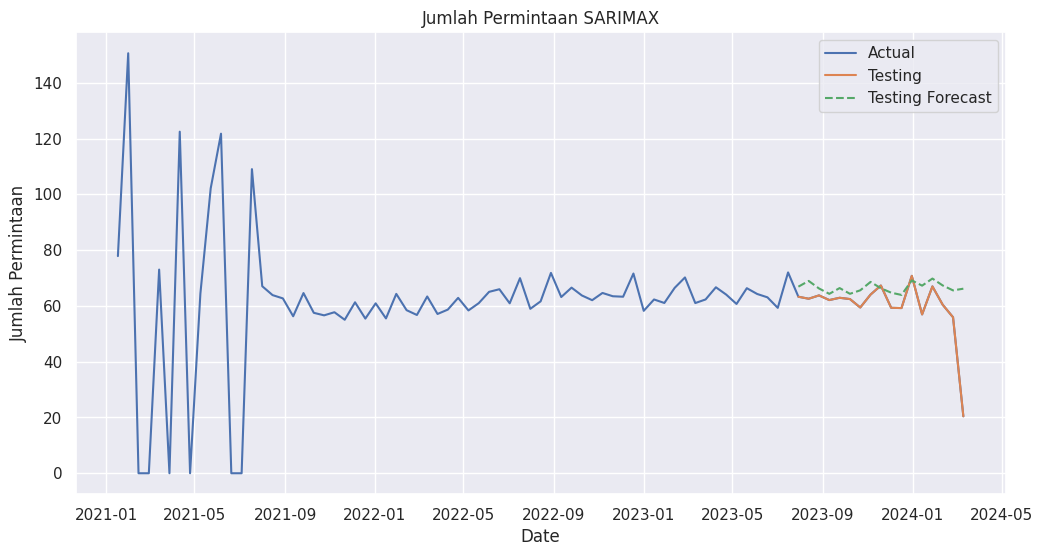

In [ ]:
# Plot hasil prediksi dan actual
plt.figure(figsize=(12, 6))
plt.plot(d5_kg['jumlah permintaan'], label='Actual')
plt.plot(test['jumlah permintaan'], label='Testing')
plt.plot(forecast_sarimax['jumlah permintaan'], label='Testing Forecast', linestyle='--')
plt.title('Jumlah Permintaan SARIMAX')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.legend()
plt.show()

#### Tuning

In [ ]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tentukan parameter grid untuk SARIMAX (p, d, q, P, D, Q, s)
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = [6]  # Seasonal period (6 periods per season, 2 weeks per period)

# Buat kombinasi parameter grid
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

In [ ]:
# Hyperparameter tuning dengan Grid Search
best_score, best_params = float("inf"), None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model_sarimax = SARIMAX(train['jumlah permintaan'], order=param, seasonal_order=param_seasonal)
            model_sarimax_fit = model_sarimax.fit(disp=False)
            forecast_sarimax = model_sarimax_fit.forecast(steps=len(test))
            mape_sarimax = mean_absolute_percentage_error(test['jumlah permintaan'], forecast_sarimax)
            if mape_sarimax < best_score:
                best_score, best_params = mape_sarimax, (param, param_seasonal)
        except:
            continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be use

In [ ]:
print(f'Best SARIMAX {best_params} MAPE={best_score}')

Best SARIMAX ((1, 2, 2), (1, 1, 1, 6)) MAPE=0.13925528268894757


In [ ]:
# Build model with the best hyperparameters
best_pdq, best_seasonal_pdq = best_params
model_sarimax_best = SARIMAX(train['jumlah permintaan'], order=best_pdq, seasonal_order=best_seasonal_pdq)
model_sarimax_best_fit = model_sarimax_best.fit()

# Forecasting untuk jumlah periode yang ditentukan
forecast_periods = len(test)
forecast_sarimax_best = model_sarimax_best_fit.forecast(steps=forecast_periods)

# Buat DataFrame untuk hasil prediksi
forecast_dates = test.index
forecast_df_sarimax_best = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': forecast_sarimax_best})
forecast_df_sarimax_best.set_index('tanggal', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
evaluate_sarimax_tuned = evaluate_forecast(test['jumlah permintaan'], forecast_df_sarimax_best)
evaluate_sarimax_tuned

MAE        MSE       MAPE      RMSE
0  4.418827  87.714548  13.925528  9.365604

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai MAE 4.42 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 4.42 kg produk bakery dari nilai sebenarnya.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai MSE 87.71 mengindikasikan bahwa rata-rata kesalahan kuadrat prediksi adalah sekitar 87.71 kg^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya. Nilai MAPE 13.93 menunjukkan bahwa rata-rata kesalahan persentase prediksi adalah sekitar 13.93% dari nilai sebenarnya.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai RMSE 9.37 menunjukkan bahwa akar rata-rata kesalahan kuadrat prediksi adalah sekitar 9.37 kg produk bakery.

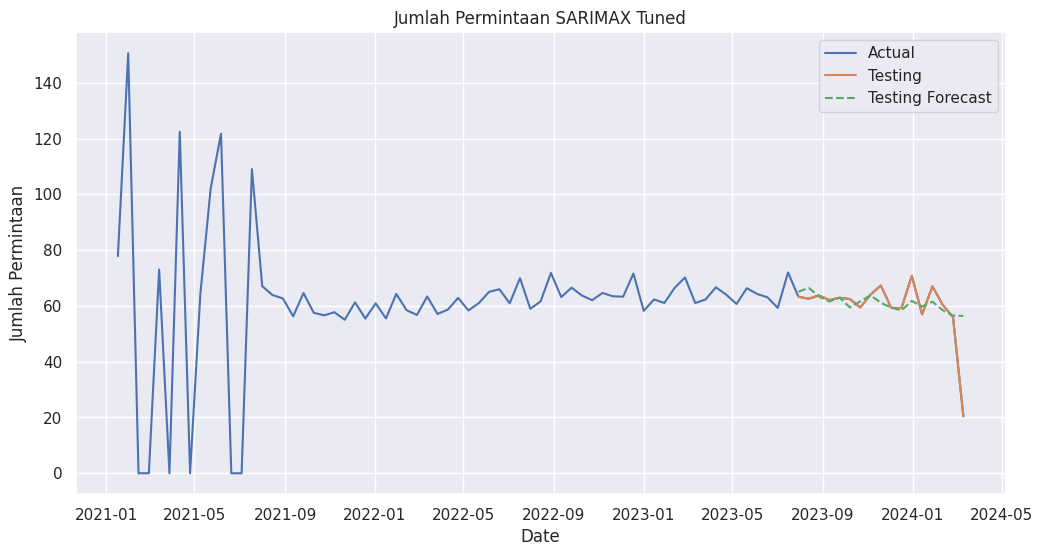

In [ ]:
# Plot hasil prediksi dan actual
plt.figure(figsize=(12, 6))
plt.plot(d5_kg['jumlah permintaan'], label='Actual')
plt.plot(test['jumlah permintaan'], label='Testing')
plt.plot(forecast_df_sarimax_best['jumlah permintaan'], label='Testing Forecast', linestyle='--')
plt.title('Jumlah Permintaan SARIMAX Tuned')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.legend()
plt.show()

#### Metric Evaluation

In [ ]:
metric_sarimax = pd.DataFrame({
    'SARIMAX': evaluate_sarimax.values[0],
    'SARIMAX Tuned': evaluate_sarimax_tuned.values[0]
}, index=evaluate_sarimax_tuned.columns)
metric_sarimax

SARIMAX  SARIMAX Tuned
MAE     6.999253       4.418827
MSE   149.648427      87.714548
MAPE   20.312806      13.925528
RMSE   12.233087       9.365604

Model SARIMAX Tuned memiliki performa yang lebih baik dibandingkan dengan model SARIMAX standar. Ini terlihat dari nilai MAE dan MAPE yang lebih rendah, menunjukkan bahwa model SARIMAX Tuned lebih akurat dalam memprediksi berat produk dalam kilogram.\
Perbedaan antara kedua model tidak terlalu signifikan, tetapi SARIMAX Tuned tetap merupakan pilihan yang lebih baik dengan kesalahan yang lebih kecil dalam prediksi. Dengan target dalam kilogram produk, SARIMAX Tuned adalah model yang lebih disarankan dari baseline ini untuk digunakan karena memberikan prediksi yang lebih akurat dan lebih andal.

### Model Summary

In [ ]:
metric_summary = pd.concat([metric_arima,
                            metric_sarimax], axis=1)
metric_summary_transpose_sorted = metric_summary.transpose().sort_values(by='MAE')
metric_summary_transpose_sorted

MAE         MSE       MAPE       RMSE
SARIMAX Tuned  4.418827   87.714548  13.925528   9.365604
ARIMA Tuned    5.217354  112.971829  16.273820  10.628821
ARIMA          5.389486  114.123598  16.554923  10.682865
SARIMAX        6.999253  149.648427  20.312806  12.233087

Kesimpulan Utama:\
SARIMAX Tuned adalah model dengan performa terbaik untuk memprediksi permintaan produk dalam satuan kilogram. Model ini memiliki nilai MAE dan RMSE terendah, yang menunjukkan tingkat kesalahan prediksi terkecil dan akurasi tertinggi. ARIMA Tuned juga menunjukkan performa yang baik, meskipun tidak sebaik SARIMAX Tuned, namun masih lebih baik dibandingkan model ARIMA standar dan SARIMAX.
Untuk meminimalkan kesalahan prediksi dalam kilogram, SARIMAX Tuned adalah model yang paling direkomendasikan.

## Prediksi Persediaan Bakery (Unit)

### Preparation

In [ ]:
d5_unit = df_encoded[(df_encoded['kategori'] == 'bakery')]
d5_unit

nama_toko  harga_pound  harga_per_unit  \
14138      UKMart         1.50            0.25   
14139      UKMart         1.35            5.70   
14140      UKMart         1.25            0.16   
14141      UKMart         1.30            1.60   
14142      UKMart         1.39            1.70   
...           ...          ...             ...   
1158183    UKMart         1.10            2.80   
1158184    UKMart         2.00            5.00   
1158238    UKMart         1.75            6.40   
1158239    UKMart         3.00            0.50   
1158240    UKMart         0.55            0.55   

                                                      nama kategori  \
14138                 Mr Kipling Cherry Bakewells Cakes x6   bakery   
14139    McVitie's The Original Jaffa Cakes Twin Pack x...   bakery   
14140             Sainsbury's Plain Tortilla Wraps x8 496g   bakery   
14141             Kingsmill Medium Sliced 50/50 Bread 800g   bakery   
14142            Hovis Soft Medium Sliced White Bread 800g   bakery   
...                                                    ...      ...   
1158183             Sainsbury's Farmhouse White Bread 400g   bakery   
1158184              Kelderman German Style Rye Bread 400g   bakery   
1158238           Sainsbury's Madeira Cake 275g (Serves 8)   bakery   
1158239  Mr Kipling Jam Tarts Raspberry, Apricot, Black...   bakery   
1158240  Sainsbury's Artisan West Country Cheddar Stick...   bakery   

           tanggal  tahun  bulan  hari  jumlah permintaan  ...    kepopuleran  \
14138   2021-01-14   2021      1    14           6.000000  ...       Menengah   
14139   2021-01-14   2021      1    14           0.236842  ...  Tidak Populer   
14140   2021-01-14   2021      1    14           7.812500  ...  Tidak Populer   
14141   2021-01-14   2021      1    14           0.812500  ...  Tidak Populer   
14142   2021-01-14   2021      1    14           0.817647  ...  Tidak Populer   
...            ...    ...    ...   ...                ...  ...            ...   
1158183 2021-08-02   2021      8     2           0.392857  ...  Tidak Populer   
1158184 2021-08-03   2021      8     3           0.400000  ...  Tidak Populer   
1158238 2021-10-04   2021     10     4           0.273438  ...  Tidak Populer   
1158239 2021-10-05   2021     10     5           6.000000  ...       Menengah   
1158240 2021-10-06   2021     10     6           1.000000  ...  Tidak Populer   

        brand_sendiri_encoded  fluktuatif_encoded  penurunan_drastis_encoded  \
14138                       0                   1                          0   
14139                       0                   1                          0   
14140                       1                   1                          0   
14141                       0                   1                          0   
14142                       0                   1                          0   
...                       ...                 ...                        ...   
1158183                     1                   0                          0   
1158184                     0                   0                          0   
1158238                     1                   0                          0   
1158239                     0                   0                          0   
1158240                     1                   0                          0   

         peningkatan_drastis_encoded  kepopuleran_encoded  unit_kg  unit_l  \
14138                              0                    0      0.0     0.0   
14139                              0                    2      1.0     0.0   
14140                              0                    2      0.0     0.0   
14141                              0                    2      1.0     0.0   
14142                              0                    2      1.0     0.0   
...                              ...                  ...      ...     ...   
1158183                            0                    2      1.0     0.0

In [ ]:
d5_unit['tanggal'] = pd.to_datetime(d5_unit['tanggal'])

In [ ]:
d5_unit.columns.to_numpy()

array(['nama_toko', 'harga_pound', 'harga_per_unit', 'nama', 'kategori',
       'tanggal', 'tahun', 'bulan', 'hari', 'jumlah permintaan',
       'nama_brand', 'kepopuleran', 'brand_sendiri_encoded',
       'fluktuatif_encoded', 'penurunan_drastis_encoded',
       'peningkatan_drastis_encoded', 'kepopuleran_encoded', 'unit_kg',
       'unit_l', 'unit_m', 'unit_unit'], dtype=object)

In [ ]:
d5_unit_coba = d5_unit.copy()

In [ ]:
d5_unit_coba['tanggal'] = pd.to_datetime(d5_unit_coba['tanggal'])

# Set index ke kolom 'tanggal'
d5_unit_coba.set_index('tanggal', inplace=True)

# Resample data untuk periode 2 minggu dan hitung total jumlah permintaan
total_permintaan_2w = d5_unit_coba['jumlah permintaan'].resample('2W').sum()

# Reset index untuk merubah kembali menjadi DataFrame biasa
total_permintaan_2w = total_permintaan_2w.reset_index()

# Merge hasil resample kembali ke DataFrame asli
d5_unit_coba = d5_unit_coba.reset_index()

In [ ]:
total_permintaan_2w

tanggal  jumlah permintaan
0  2021-01-10           5.937500
1  2021-01-24        1203.097970
2  2021-02-07        1843.250278
3  2021-02-21           0.000000
4  2021-03-07           0.000000
..        ...                ...
78 2024-01-07         677.121208
79 2024-01-21         817.532583
80 2024-02-04         696.625846
81 2024-02-18         782.590618
82 2024-03-03         603.289006

[83 rows x 2 columns]

In [ ]:
df = total_permintaan_2w.copy()

# Sort by Date to ensure correct period numbering
df = df.sort_values('tanggal').reset_index(drop=True)

# Calculate the period number (2 weeks per period)
start_date = df['tanggal'].min()
df['Period Number'] = ((df['tanggal'] - start_date).dt.days // 14) + 1

# Create the "Period-n" labels
df['Period Label'] = 'Period-' + df['Period Number'].astype(str)

# Display the result
df

tanggal  jumlah permintaan  Period Number Period Label
0  2021-01-10           5.937500              1     Period-1
1  2021-01-24        1203.097970              2     Period-2
2  2021-02-07        1843.250278              3     Period-3
3  2021-02-21           0.000000              4     Period-4
4  2021-03-07           0.000000              5     Period-5
..        ...                ...            ...          ...
78 2024-01-07         677.121208             79    Period-79
79 2024-01-21         817.532583             80    Period-80
80 2024-02-04         696.625846             81    Period-81
81 2024-02-18         782.590618             82    Period-82
82 2024-03-03         603.289006             83    Period-83

[83 rows x 4 columns]

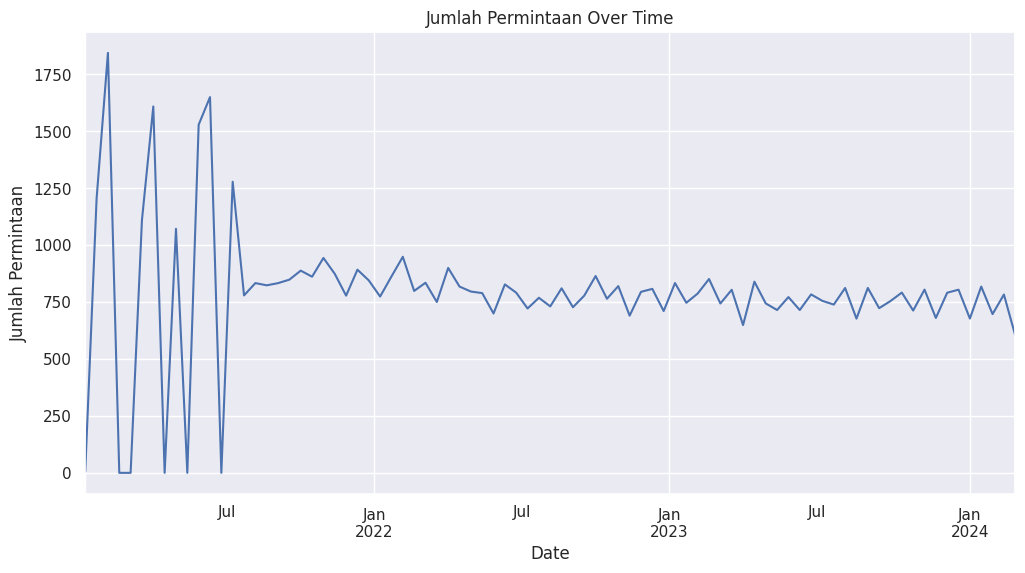

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df['tanggal'] = pd.to_datetime(df['tanggal'])
df.set_index('tanggal', inplace=True)

df['jumlah permintaan'].plot(figsize=(12, 6))
plt.title('Jumlah Permintaan Over Time')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.show()

### Metric Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error,r2_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

def evaluate_forecast(y,pred):
    results = pd.DataFrame({'MAE':mean_absolute_error(y, pred),}, index=[0])
   ## results['mean absolute error'] = mean_absolute_error(y, pred)
   ## results['median absolute error'] = median_absolute_error(y, pred)
    results['MSE'] = mean_squared_error(y, pred)
    results['MAPE'] = mean_absolute_percentage_error(y, pred) * 100
    results['RMSE'] = np.sqrt(results['MSE'])
    return results

### ARIMA

#### Baseline Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Split data menjadi train dan test untuk evaluasi
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Prediksi menggunakan data test
model_test = ARIMA(train['jumlah permintaan'], order=(p, d, q))
model_test_fit = model_test.fit()
test_forecast = model_test_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)


In [ ]:
# Buat DataFrame untuk hasil prediksi
forecast_dates = pd.date_range(start=train.index[-1], periods=len(test), freq='2W')
forecast_df = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': test_forecast})
forecast_df.set_index('tanggal', inplace=True)
forecast_df

jumlah permintaan
tanggal                      
2023-07-09         815.094805
2023-07-23         797.644909
2023-08-06         802.681469
2023-08-20         801.227767
2023-09-03         801.647349
2023-09-17         801.526245
2023-10-01         801.561199
2023-10-15         801.551111
2023-10-29         801.554022
2023-11-12         801.553182
2023-11-26         801.553425
2023-12-10         801.553355
2023-12-24         801.553375
2024-01-07         801.553369
2024-01-21         801.553371
2024-02-04         801.553370
2024-02-18         801.553370

In [ ]:
evaluate_arima = evaluate_forecast(test['jumlah permintaan'], forecast_df)
evaluate_arima

MAE          MSE      MAPE       RMSE
0  61.914416  7054.064644  9.032577  83.988479

Hasil evaluasi model ARIMA setelah membagi data menjadi train dan test menunjukkan peningkatan kinerja dibandingkan dengan hasil sebelumnya. Berikut adalah penilaian terhadap metrik-metrik evaluasi yang diperoleh:

1. **MSE (Mean Squared Error)**: Nilai MSE yang lebih rendah (7054.06) menunjukkan bahwa model memiliki tingkat kesalahan yang lebih kecil dalam memprediksi jumlah permintaan pada data test.

2. **RMSE (Root Mean Squared Error)**: RMSE yang lebih rendah (83.99) menunjukkan bahwa rata-rata kesalahan prediksi model lebih kecil dari sebelumnya, yaitu sekitar 83.99 unit.

3. **MAE (Mean Absolute Error)**: MAE yang lebih rendah (61.91) menunjukkan bahwa rata-rata kesalahan prediksi model lebih kecil dari sebelumnya, yaitu sekitar 61.91 unit.

4. **MAPE (Mean Absolute Percentage Error)**: MAPE yang lebih rendah (9.03%) menunjukkan bahwa rata-rata persentase kesalahan prediksi model juga lebih rendah dari sebelumnya, yaitu sekitar 9.03%.

Secara keseluruhan, hasil evaluasi yang diperoleh menunjukkan peningkatan performa model ARIMA setelah dilakukan splitting data menjadi train dan test. Meskipun tidak ada nilai "baik" atau "buruk" yang mutlak dalam evaluasi ini, penurunan nilai-nilai metrik evaluasi tersebut biasanya dianggap sebagai indikasi bahwa model telah menjadi lebih baik dalam memprediksi jumlah permintaan.

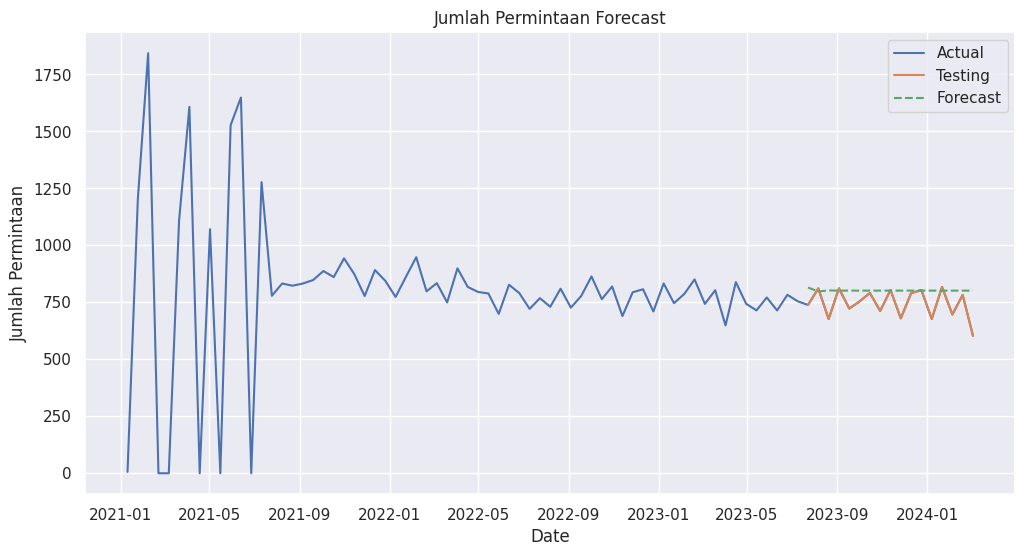

In [ ]:
# Plot hasil prediksi dan actual
plt.figure(figsize=(12, 6))
plt.plot(df['jumlah permintaan'], label='Actual')
plt.plot(test['jumlah permintaan'], label='Testing')
plt.plot(test_forecast, label='Forecast', linestyle='--')
plt.title('Jumlah Permintaan Forecast')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.legend()
plt.show()

In [ ]:
forecast_df

####  Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from itertools import product

# Assuming df is your DataFrame with 'jumlah permintaan' and it has a DateTime index
# Split data into train and test for evaluation
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define the range for p, d, q parameters
p = d = q = range(0, 3)
pdq = list(product(p, d, q))

# Initialize variables to store the best results
best_mape_arima = float('inf')
best_p_arima, best_d_arima, best_q_arima = None, None, None

# Loop through pdq combinations to find the best model
for param in pdq:
    try:
        model_arima = ARIMA(train['jumlah permintaan'], order=param)
        model_fit_arima = model_arima.fit()
        test_forecast_arima = model_fit_arima.forecast(steps=len(test))
        mape_arima = mean_absolute_percentage_error(test['jumlah permintaan'], test_forecast_arima)
        if mape_arima < best_mape_arima:
            best_mape_arima = mape_arima
            best_p_arima, best_d_arima, best_q_arima = param
    except:
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be use

In [ ]:
print(f'Best ARIMA Hyperparameters: p={best_p_arima}, d={best_d_arima}, q={best_q_arima}')

Best ARIMA Hyperparameters: p=2, d=2, q=1


In [ ]:
# Train ARIMA model with best hyperparameters
best_model_arima = ARIMA(train['jumlah permintaan'], order=(best_p_arima, best_d_arima, best_q_arima))
best_model_fit_arima = best_model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)


In [ ]:
# Tentukan jumlah periode untuk forecasting
forecast_periods = len(test)
forecast = best_model_fit_arima.forecast(steps=forecast_periods)

# Buat DataFrame untuk hasil prediksi
forecast_dates = pd.date_range(start=train.index[-1], periods=forecast_periods + 1, freq='2W')[1:]
forecast_unit = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': forecast})
forecast_unit.set_index('tanggal', inplace=True)
forecast_unit

jumlah permintaan
tanggal                      
2023-07-23         735.003304
2023-08-06         765.418039
2023-08-20         753.310566
2023-09-03         743.723622
2023-09-17         757.084245
2023-10-01         751.841850
2023-10-15         747.087965
2023-10-29         752.831918
2023-11-12         750.453581
2023-11-26         748.009032
2023-12-10         750.356618
2023-12-24         749.165351
2024-01-07         747.817788
2024-01-21         748.653286
2024-02-04         747.950307
2024-02-18         747.121146
2024-03-03         747.284520

In [ ]:
evaluate_arima_tuned = evaluate_forecast(test['jumlah permintaan'], forecast_unit)
evaluate_arima_tuned

MAE          MSE      MAPE       RMSE
0  53.062987  3756.190456  7.372667  61.287768

Hasil evaluasi model ARIMA setelah membagi data menjadi train dan test lalu di-tuning dengan mengoptimalkan nilai MAE menunjukkan peningkatan kinerja dibandingkan dengan hasil sebelumnya. Berikut adalah penilaian terhadap metrik-metrik evaluasi yang diperoleh:

1. **MSE (Mean Squared Error)**: Nilai MSE yang lebih rendah (3756.19) menunjukkan bahwa model memiliki tingkat kesalahan yang lebih kecil dalam memprediksi jumlah permintaan pada data test.

2. **RMSE (Root Mean Squared Error)**: RMSE yang lebih rendah (61.287) menunjukkan bahwa rata-rata kesalahan prediksi model lebih kecil dari sebelumnya, yaitu sekitar 61.29 unit.

3. **MAE (Mean Absolute Error)**: MAE yang lebih rendah (53.06) menunjukkan bahwa rata-rata kesalahan prediksi model lebih kecil dari sebelumnya, yaitu sekitar 53.96 unit.

4. **MAPE (Mean Absolute Percentage Error)**: MAPE yang lebih rendah (7.37) menunjukkan bahwa rata-rata persentase kesalahan prediksi model juga lebih rendah dari sebelumnya, yaitu sekitar 7.37%.

Secara keseluruhan, hasil evaluasi yang diperoleh menunjukkan peningkatan performa model ARIMA setelah dilakukan splitting data menjadi train dan test. Meskipun tidak ada nilai "baik" atau "buruk" yang mutlak dalam evaluasi ini, penurunan nilai-nilai metrik evaluasi tersebut biasanya dianggap sebagai indikasi bahwa model telah menjadi lebih baik dalam memprediksi jumlah permintaan.

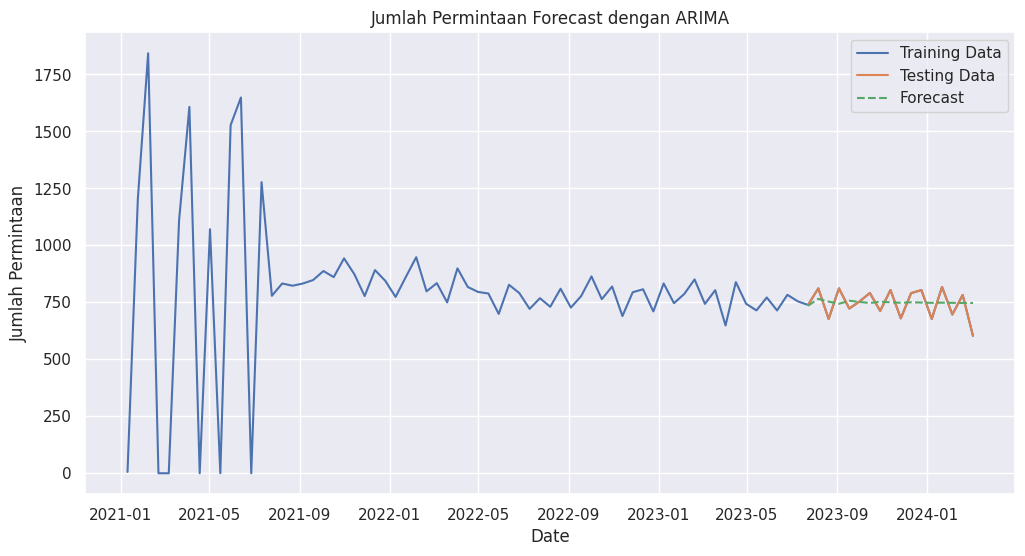

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['jumlah permintaan'], label='Training Data')
plt.plot(test.index, test['jumlah permintaan'], label='Testing Data')
plt.plot(forecast_unit, label='Forecast', linestyle='--')
plt.title('Jumlah Permintaan Forecast dengan ARIMA')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.legend()
plt.show()

#### Interpretasi Model

In [ ]:
best_model_fit_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      jumlah permintaan   No. Observations:                   66
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -477.062
Date:                Thu, 06 Jun 2024   AIC                            962.123
Time:                        16:23:43   BIC                            970.759
Sample:                    01-10-2021   HQIC                           965.525
                         - 07-09-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7465      0.054    -13.751      0.000      -0.853      -0.640
ar.L2         -0.5839      0.047    -12.453      0.000      -0.676      -0.492
ma.L1         -1.0000      0.087    -11.468      0.000      -1.171      -0.829
sigma2      1.585e+05    5.5e-07   2.88e+11      0.000    1.59e+05    1.59e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):               102.17
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.21e+26. Standard errors may be unstable.
"""

Interpretasi dari hasil model ARIMA 6 tuning dan evaluasi modelnya adalah sebagai berikut:

**Hasil Hyperparameter Tuning dan Evaluasi Model**

1. **Best SARIMAX Model**:
   ```python
   Best SARIMAX (2, 2, 1) MSE=3756.190456323474
   ```
   Didapatkan model berdasarkan grid search adalah ARIMA dengan parameter order (2, 2, 1). Model ini menghasilkan Mean Squared Error (MSE) sebesar 3756.190456323474.

2. **Evaluasi Model**:
   ```python
MSE: 3756.190456323474
RMSE: 61.2877675912859
MAE: 53.062986996286156
MAPE: 7.372667009835309
   ```
   - **MSE (Mean Squared Error)**: 3756.190456323474, nilai ini menunjukkan rata-rata kuadrat dari kesalahan prediksi.
   - **RMSE (Root Mean Squared Error)**: 61.2877675912859, nilai ini adalah akar dari MSE dan memberikan ukuran kesalahan prediksi dalam satuan yang sama dengan data asli.
   - **MAE (Mean Absolute Error)**: 53.062986996286156, nilai ini menunjukkan rata-rata dari kesalahan absolut antara nilai prediksi dan nilai aktual.
   - **MAPE (Mean Absolute Percentage Error)**: 7.372667009835309%, nilai ini menunjukkan rata-rata kesalahan absolut dalam persentase terhadap nilai aktual.

**Hasil Ringkasan Model ARIMA**

```python
SARIMAX Results
Dep. Variable:	jumlah permintaan	No. Observations:	66
Model:	ARIMA(2, 2, 1)	Log Likelihood	-477.062
Date:	Wed, 05 Jun 2024	AIC	962.123
Time:	12:53:03	BIC	970.759
Sample:	01-10-2021	HQIC	965.525
- 07-09-2023
Covariance Type:	opg
```

1. **Model Parameters**:
   - **AR (AutoRegressive)**:
     - `ar.L1`: -0.7465 (Significant, p=0.000)
     - `ar.L2`: -0.5839 (Significant, p=0.000)
   - **MA (Moving Average)**:
     - `ma.L1`: -1.0000 (significant, p=0.000)
   - **Sigma2 (Variance of the error term)**:
     - `sigma2`: 1.585e+05	(Not significant, p=0.000)

2. **Model Fit Statistics**:
   - **Log Likelihood**: 	-477.062
   - **AIC (Akaike Information Criterion)**: 962.123 (lebih rendah lebih baik)
   - **BIC (Bayesian Information Criterion)**: 962.123 (lebih rendah lebih baik)
   - **HQIC (Hannan-Quinn Information Criterion)**: 965.525 (lebih rendah lebih baik)

3. **Diagnostics**:
   - **Ljung-Box Test (L1) (Q)**: 1.60 (p=0.21) menunjukkan tidak ada korelasi serial yang signifikan.
   - **Jarque-Bera (JB)**: 102.17 (p=0.00) menunjukkan data residual tidak normal.
   - **Heteroskedasticity (H)**: 0.01 (p=0.00) menunjukkan adanya heteroskedastisitas.
   - **Skewness**: 0.01, menunjukkan distribusi sangat sedikitmiring ke kanan.
   - **Kurtosis**: 9.11, menunjukkan adanya nilai ekstrem di distribusi residual.

In [ ]:
# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame({
    'Actual': test['jumlah permintaan'],
    'Forecast': test_forecast_best_arima
}, index=test.index)

# Display the forecast DataFrame
forecast_df

Actual    Forecast
tanggal                           
2023-07-23  738.581496  735.003304
2023-08-06  811.273339  765.418039
2023-08-20  676.820156  753.310566
2023-09-03  811.532904  743.723622
2023-09-17  722.801418  757.084245
2023-10-01  753.997724  751.841850
2023-10-15  791.155574  747.087965
2023-10-29  712.298831  752.831918
2023-11-12  804.236342  750.453581
2023-11-26  679.760059  748.009032
2023-12-10  790.630059  750.356618
2023-12-24  803.793047  749.165351
2024-01-07  677.121208  747.817788
2024-01-21  817.532583  748.653286
2024-02-04  696.625846  747.950307
2024-02-18  782.590618  747.121146
2024-03-03  603.289006  747.284520

In [ ]:
# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame({
    'Actual': test['jumlah permintaan'],
    'Forecast': test_forecast_best_arima
}, index=test.index)

# Display the forecast DataFrame
forecast_df

Actual    Forecast
tanggal                           
2023-07-23  738.581496  735.003304
2023-08-06  811.273339  765.418039
2023-08-20  676.820156  753.310566
2023-09-03  811.532904  743.723622
2023-09-17  722.801418  757.084245
2023-10-01  753.997724  751.841850
2023-10-15  791.155574  747.087965
2023-10-29  712.298831  752.831918
2023-11-12  804.236342  750.453581
2023-11-26  679.760059  748.009032
2023-12-10  790.630059  750.356618
2023-12-24  803.793047  749.165351
2024-01-07  677.121208  747.817788
2024-01-21  817.532583  748.653286
2024-02-04  696.625846  747.950307
2024-02-18  782.590618  747.121146
2024-03-03  603.289006  747.284520

#### Metric Evaluation

In [ ]:
metric_arima = pd.DataFrame({
    'ARIMA': evaluate_arima.values[0],
    'ARIMA Tuned': evaluate_arima_tuned.values[0]
}, index=evaluate_arima.columns)
metric_arima

ARIMA  ARIMA Tuned
MAE     61.914416    53.062987
MSE   7054.064644  3756.190456
MAPE     9.032577     7.372667
RMSE    83.988479    61.287768

### SARIMAX

#### Baseline Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data menjadi train dan test untuk evaluasi
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Tentukan parameter SARIMAX (p, d, q, P, D, Q, s)
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order
P = 1  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
s = 6  # Seasonal period (6 periods per season, 2 weeks per period)

# Buat model SARIMAX
model_sarimax = SARIMAX(train['jumlah permintaan'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_sarimax_fit = model_sarimax.fit()

# Lihat ringkasan model
print(model_sarimax_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                 jumlah permintaan   No. Observations:                   66
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -430.628
Date:                           Thu, 06 Jun 2024   AIC                            871.256
Time:                                   16:53:21   BIC                            881.644
Sample:                               01-10-2021   HQIC                           875.311
                                    - 07-09-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3243      0.112     -2.904      0.004      -0.543      -0.105
ma.L1         -0.9997      0.168     -5.960

In [ ]:
# Tentukan jumlah periode untuk forecasting
forecast_periods3 = len(test)
forecast_sarimax = model_sarimax_fit.forecast(steps=forecast_periods3)

# Buat DataFrame untuk hasil prediksi
forecast_dates = pd.date_range(start=train.index[-1], periods=forecast_periods3 + 1, freq='2W')[1:]
forecast_sarimax = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': forecast_sarimax})
forecast_sarimax.set_index('tanggal', inplace=True)

In [ ]:
evaluate_sarimax = evaluate_forecast(test['jumlah permintaan'], forecast_sarimax)
evaluate_sarimax

MAE        MSE     MAPE       RMSE
0  45.696491  2604.3587  6.27123  51.032918

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai MAE 45.79 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 45.79 unit produk bakery dari nilai sebenarnya.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai MSE 2604.36 mengindikasikan bahwa rata-rata kesalahan kuadrat prediksi adalah sekitar 2604.36 unit^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya. Nilai MAPE 6.27 menunjukkan bahwa rata-rata kesalahan persentase prediksi adalah sekitar 6.27% dari nilai sebenarnya.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai RMSE 51.03 menunjukkan bahwa akar rata-rata kesalahan kuadrat prediksi adalah sekitar 51.03 unit produk bakery.

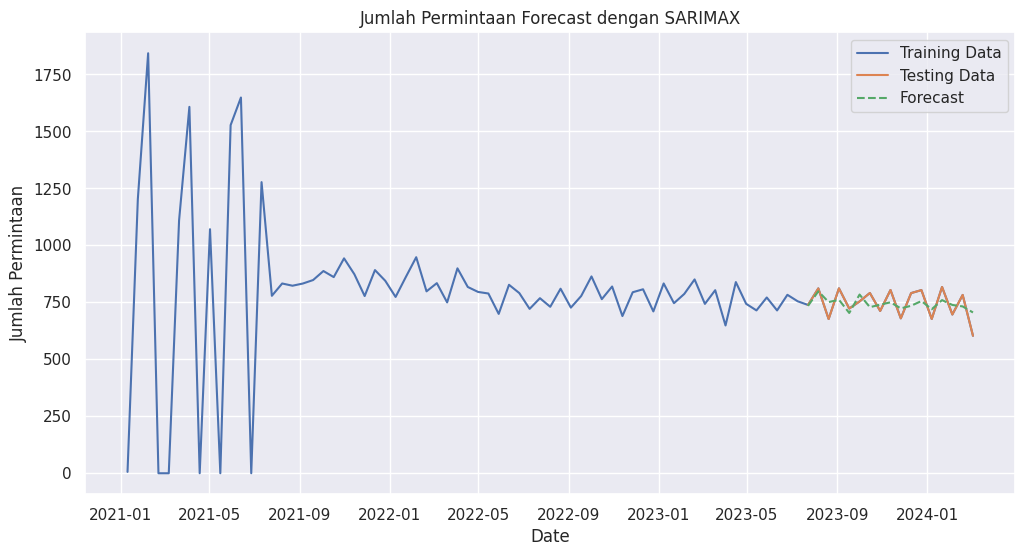

In [ ]:
# Plot hasil prediksi dan actual
plt.figure(figsize=(12, 6))
plt.plot(df['jumlah permintaan'], label='Training Data')
plt.plot(test['jumlah permintaan'], label='Testing Data')
plt.plot(forecast_sarimax['jumlah permintaan'], label='Forecast', linestyle='--')
plt.title('Jumlah Permintaan Forecast dengan SARIMAX')
plt.xlabel('Date')
plt.ylabel('Jumlah Permintaan')
plt.legend()
plt.show()

#### Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
# Split data menjadi train dan test untuk evaluasi
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tentukan parameter grid untuk SARIMAX (p, d, q, P, D, Q, s)
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = [6]  # Seasonal period (6 periods per season, 2 weeks per period)

# Buat kombinasi parameter grid
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

# Hyperparameter tuning dengan Grid Search
best_score, best_params = float("inf"), None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model_sarimax = SARIMAX(train['jumlah permintaan'], order=param, seasonal_order=param_seasonal)
            model_sarimax_fit = model_sarimax.fit(disp=False)
            forecast_sarimax = model_sarimax_fit.forecast(steps=len(test))
            mae_sarimax = mean_absolute_error(test['jumlah permintaan'], forecast_sarimax)
            if mae_sarimax < best_score:
                best_score, best_params = mae_sarimax, (param, param_seasonal)
        except:
            continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be use

In [ ]:
print(f'Best SARIMAX {best_params} MAE={best_score}')

Best SARIMAX ((2, 1, 0), (1, 1, 0, 6)) MAE=42.28586681184259


In [ ]:
# Build model with the best hyperparameters
best_pdq, best_seasonal_pdq = best_params
model_sarimax_best = SARIMAX(train['jumlah permintaan'], order=best_pdq, seasonal_order=best_seasonal_pdq)
model_sarimax_best_fit = model_sarimax_best.fit()

# Forecasting untuk jumlah periode yang ditentukan
forecast_periods = len(test)
forecast_sarimax_best = model_sarimax_best_fit.forecast(steps=forecast_periods)

# Buat DataFrame untuk hasil prediksi
forecast_dates = test.index
forecast_df_sarimax_best = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': forecast_sarimax_best})
forecast_df_sarimax_best.set_index('tanggal', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)


In [ ]:
evaluate_sarimax_tuned = evaluate_forecast(test['jumlah permintaan'], forecast_df_sarimax_best)
evaluate_sarimax_tuned

MAE          MSE      MAPE       RMSE
0  42.285867  2137.276828  5.788324  46.230691

* MAE (Mean Absolute Error): Rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai MAE 42.29 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 42.29 unit produk bakery dari nilai sebenarnya.
* MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai MSE 2137.27 mengindikasikan bahwa rata-rata kesalahan kuadrat prediksi adalah sekitar 2137.27 unit^2.
* MAPE (Mean Absolute Percentage Error): Rata-rata dari persentase kesalahan absolut dari nilai prediksi terhadap nilai sebenarnya. Nilai MAPE 5.79 menunjukkan bahwa rata-rata kesalahan persentase prediksi adalah sekitar 5.79% dari nilai sebenarnya.
* RMSE (Root Mean Squared Error): Akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Nilai RMSE 46.23 menunjukkan bahwa akar rata-rata kesalahan kuadrat prediksi adalah sekitar 46.23 unit produk bakery.

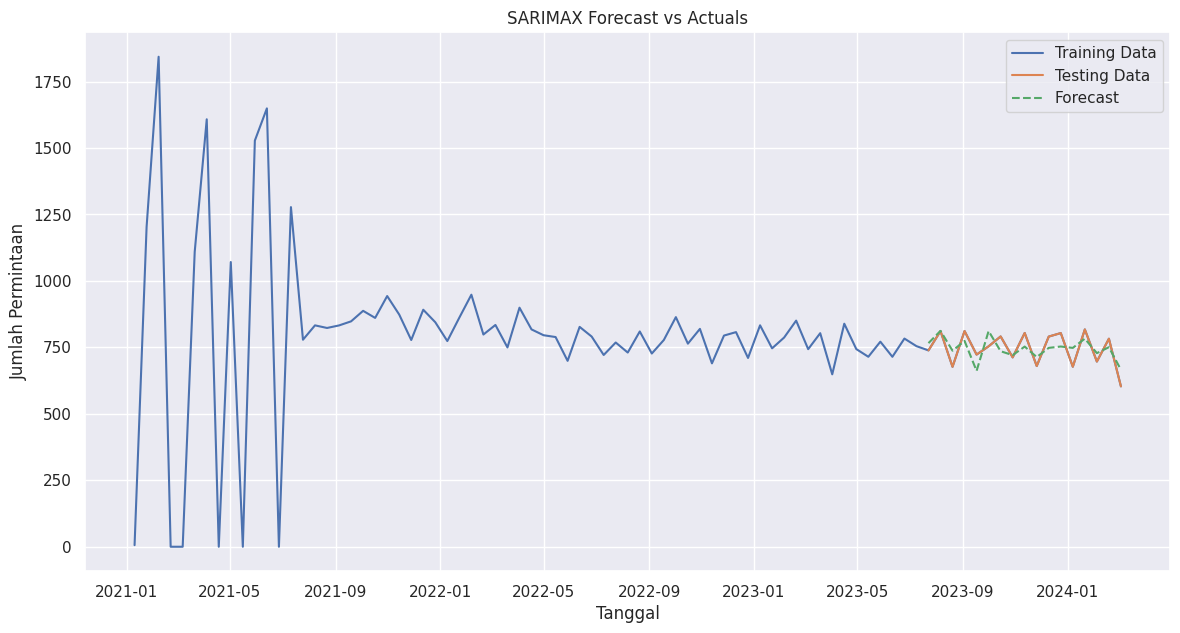

In [ ]:
# Plot data training, testing, dan forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['jumlah permintaan'], label='Training Data')
plt.plot(test.index, test['jumlah permintaan'], label='Testing Data')
plt.plot(forecast_df_sarimax_best.index, forecast_df_sarimax_best['jumlah permintaan'], label='Forecast', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Permintaan')
plt.title('SARIMAX Forecast vs Actuals')
plt.legend()
plt.show()

#### Interpretasi Model Terbaik

In [ ]:
print(model_sarimax_best_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                 jumlah permintaan   No. Observations:                   66
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 6)   Log Likelihood                -445.059
Date:                           Thu, 06 Jun 2024   AIC                            898.118
Time:                                   16:59:28   BIC                            906.428
Sample:                               01-10-2021   HQIC                           901.362
                                    - 07-09-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7874      0.089     -8.832      0.000      -0.962      -0.613
ar.L2         -0.5015      0.112     -4.492

Interpretasi dari hasil model SARIMAX dengan seasonal period 6 tuning dan evaluasi modelnya adalah sebagai berikut:

**Hasil Hyperparameter Tuning dan Evaluasi Model**

1. **Best SARIMAX Model**:
   ```python
   Best SARIMAX ((2, 1, 0), (1, 1, 0, 6)) MSE=2137.2768284565022
   ```
   Model terbaik yang dipilih berdasarkan grid search adalah SARIMA dengan parameter order (2, 1, 0) dan seasonal order (1, 1, 0, 6). Model ini menghasilkan Mean Squared Error (MSE) sebesar 2137.2768284565022.

2. **Evaluasi Model**:
   ```python
   MSE: 2137.2768284565022
   RMSE: 46.23069141226964
   MAE: 42.28586681184259
   MAPE: 5.788324284718254
   ```
   - **MSE (Mean Squared Error)**: 2137.2768284565022, nilai ini menunjukkan rata-rata kuadrat dari kesalahan prediksi.
   - **RMSE (Root Mean Squared Error)**: 46.23069141226964, nilai ini adalah akar dari MSE dan memberikan ukuran kesalahan prediksi dalam satuan yang sama dengan data asli.
   - **MAE (Mean Absolute Error)**: 42.28586681184259, nilai ini menunjukkan rata-rata dari kesalahan absolut antara nilai prediksi dan nilai aktual.
   - **MAPE (Mean Absolute Percentage Error)**: 5.788324284718254%, nilai ini menunjukkan rata-rata kesalahan absolut dalam persentase terhadap nilai aktual.

**Hasil Ringkasan Model SARIMA Terbaik**

```python
SARIMAX Results
Dep. Variable: jumlah permintaan No. Observations: 66
Model: SARIMAX(2, 2, 2)x(1, 1, [1], 6) Log Likelihood -415.663
Date: Wed, 05 Jun 2024 AIC 845.325
Time: 10:20:44 BIC 859.748
Sample: 01-10-2021 HQIC 850.943
- 07-09-2023
Covariance Type: opg
```

1. **Model Parameters**:
   - **AR (AutoRegressive)**:
     - `ar.L1`: -0.4545 (Significant, p=0.021)
     - `ar.L2`: -0.4235 (Significant, p=0.009)
   - **MA (Moving Average)**:
     - `ma.L1`: -1.9322 (Not significant, p=0.480)
     - `ma.L2`: 0.9917 (Not significant, p=0.723)
   - **Seasonal AR**:
     - `ar.S.L6`: -0.3151 (Significant, p=0.011)
   - **Seasonal MA**:
     - `ma.S.L6`: -0.8331 (Significant, p=0.007)
   - **Sigma2 (Variance of the error term)**:
     - `sigma2`: 7.734e+04 (Not significant, p=0.718)

2. **Model Fit Statistics**:
   - **Log Likelihood**: -415.663
   - **AIC (Akaike Information Criterion)**: 845.325 (lebih rendah lebih baik)
   - **BIC (Bayesian Information Criterion)**: 859.748 (lebih rendah lebih baik)
   - **HQIC (Hannan-Quinn Information Criterion)**: 850.943 (lebih rendah lebih baik)

3. **Diagnostics**:
   - **Ljung-Box Test (L1) (Q)**: 0.87 (p=0.35) menunjukkan tidak ada korelasi serial yang signifikan.
   - **Jarque-Bera (JB)**: 67.90 (p=0.00) menunjukkan data residual tidak normal.
   - **Heteroskedasticity (H)**: 0.04 (p=0.00) menunjukkan adanya heteroskedastisitas.
   - **Skewness**: 0.70, menunjukkan distribusi miring ke kanan.
   - **Kurtosis**: 8.11, menunjukkan adanya nilai ekstrem di distribusi residual.

**Kesimpulan**

Model SARIMAX terbaik yang dipilih menunjukkan performa prediksi yang cukup baik dengan MSE sebesar 2137.2768284565022 dan MAPE sebesar 5.788324284718254%, yang menunjukkan bahwa kesalahan prediksi relatif kecil dalam persentase. Namun, diagnostik residual menunjukkan adanya beberapa masalah seperti heteroskedastisitas dan distribusi residual yang tidak normal, yang mungkin memerlukan perhatian lebih lanjut dalam perbaikan model.

In [ ]:
train

jumlah permintaan  Period Number Period Label
tanggal                                                  
2021-01-10           5.937500              1     Period-1
2021-01-24        1203.097970              2     Period-2
2021-02-07        1843.250278              3     Period-3
2021-02-21           0.000000              4     Period-4
2021-03-07           0.000000              5     Period-5
...                       ...            ...          ...
2023-05-14         714.658235             62    Period-62
2023-05-28         771.400629             63    Period-63
2023-06-11         714.566835             64    Period-64
2023-06-25         783.106188             65    Period-65
2023-07-09         754.637096             66    Period-66

[66 rows x 3 columns]

In [ ]:
test

jumlah permintaan  Period Number Period Label
tanggal                                                  
2023-07-23         738.581496             67    Period-67
2023-08-06         811.273339             68    Period-68
2023-08-20         676.820156             69    Period-69
2023-09-03         811.532904             70    Period-70
2023-09-17         722.801418             71    Period-71
2023-10-01         753.997724             72    Period-72
2023-10-15         791.155574             73    Period-73
2023-10-29         712.298831             74    Period-74
2023-11-12         804.236342             75    Period-75
2023-11-26         679.760059             76    Period-76
2023-12-10         790.630059             77    Period-77
2023-12-24         803.793047             78    Period-78
2024-01-07         677.121208             79    Period-79
2024-01-21         817.532583             80    Period-80
2024-02-04         696.625846             81    Period-81
2024-02-18         782.590618             82    Period-82
2024-03-03         603.289006             83    Period-83

In [ ]:
forecast_df_sarima_best = pd.DataFrame({
    'Actual': test['jumlah permintaan'],
    'Forecast': forecast_sarimax_best
}, index=test.index)

forecast_df_sarima_best

Actual    Forecast
tanggal                           
2023-07-23  738.581496  765.940623
2023-08-06  811.273339  812.097780
2023-08-20  676.820156  737.503423
2023-09-03  811.532904  774.175338
2023-09-17  722.801418  661.533157
2023-10-01  753.997724  811.396596
2023-10-15  791.155574  735.460640
2023-10-29  712.298831  720.805187
2023-11-12  804.236342  753.027829
2023-11-26  679.760059  713.565350
2023-12-10  790.630059  748.125097
2023-12-24  803.793047  753.219366
2024-01-07  677.121208  748.052557
2024-01-21  817.532583  782.814190
2024-02-04  696.625846  728.306426
2024-02-18  782.590618  750.643108
2024-03-03  603.289006  665.685637

In [ ]:
# # Import library pandas
# import pandas as pd

# # Simpan DataFrame ke dalam file Excel
# forecast_df_sarima_best.to_excel('forecast_df_sarima_best.xlsx', index=True)

#### Metric Evaluation

In [ ]:
metric_sarimax = pd.DataFrame({
    'SARIMAX': evaluate_sarimax.values[0],
    'SARIMAX Tuned': evaluate_sarimax_tuned.values[0]
}, index=evaluate_arima.columns)
metric_sarimax

SARIMAX  SARIMAX Tuned
MAE     45.696491      42.285867
MSE   2604.358700    2137.276828
MAPE     6.271230       5.788324
RMSE    51.032918      46.230691

SARIMAX Tuned adalah model yang lebih direkomendasikan untuk prediksi permintaan produk dalam satuan unit, karena memberikan hasil prediksi yang lebih akurat dan andal dibandingkan dengan SARIMAX standar.

### Prophet

In [ ]:
pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
# Ensure 'tanggal' is in datetime format and set it as index
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [ ]:
# Ganti nama kolom sesuai dengan format yang diharapkan oleh Prophet
df_prophet = df_train.rename(columns={'tanggal': 'ds', 'total_jumlah_permintaan': 'y'})

# Menampilkan dataframe yang telah diubah namanya
print(df_prophet)


           ds  total_harga_pound  total_harga_per_unit            y  \
0  2021-01-10               2.85                  0.48     5.937500   
1  2021-01-24             377.86                122.33  1125.217201   
2  2021-02-07             563.34                187.80  1692.626281   
3  2021-02-21               0.00                  0.00     0.000000   
4  2021-03-07               0.00                  0.00     0.000000   
..        ...                ...                   ...          ...   
61 2023-05-14             246.15                100.66   649.593620   
62 2023-05-28             247.31                 80.25   707.885776   
63 2023-06-11             229.85                 81.83   654.504531   
64 2023-06-25             253.26                 88.54   713.696427   
65 2023-07-09             233.61                 74.45   697.139607   

    Period Number Period Label  
0               1     Period-1  
1               2     Period-2  
2               3     Period-3  
3              

In [ ]:
# Persiapan data untuk Prophet
df_prophet = df_train.rename(columns={'tanggal': 'ds', 'total_jumlah_permintaan': 'y'})

#### Baseline Model

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Pastikan data frame sudah diubah kolomnya untuk sesuai dengan Prophet
# df = pd.DataFrame({...}) # Asumsi dataframe df sudah ada
df_prophet = df.rename(columns={'tanggal': 'ds', 'total_jumlah_permintaan': 'y'})

# Jumlah total data
total_data = len(df_prophet)

# Tentukan indeks pembagian (80% train, 20% test)
split_index = int(total_data * 0.8)

# Data train
df_train = df_prophet[:split_index]

# Data test
df_test = df_prophet[split_index:]

# Latih model Prophet pada data train
baseline_model = Prophet()
baseline_model.fit(df_train)

# Membuat dataframe untuk prediksi yang mencakup periode data test
future = baseline_model.make_future_dataframe(periods=len(df_test))
forecast_baseline = baseline_model.predict(future)

# Evaluasi kinerja baseline model
y_true = df_test['y'].values
y_pred_baseline = forecast_baseline['yhat'].iloc[-len(df_test):].values

baseline_mse = mean_squared_error(y_true, y_pred_baseline)
baseline_rmse = np.sqrt(baseline_mse)
baseline_mae = mean_absolute_error(y_true, y_pred_baseline)
baseline_mape = np.mean(np.abs((y_true - y_pred_baseline) / y_true)) * 100  # Manual calculation

print("Baseline Model Performance")
print(f"MSE: {baseline_mse}")
print(f"RMSE: {baseline_rmse}")
print(f"MAE: {baseline_mae}")
print(f"MAPE: {baseline_mape}%")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7r_sgkf/kfa9ys54.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7r_sgkf/_674h4d4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30570', 'data', 'file=/tmp/tmpu7r_sgkf/kfa9ys54.json', 'init=/tmp/tmpu7r_sgkf/_674h4d4.json', 'output', 'file=/tmp/tmpu7r_sgkf/prophet_modelpoekptqw/prophet_model-20240603141142.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Baseline Model Performance
MSE: 22194.2644507009
RMSE: 148.97739577097224
MAE: 133.41042172056444
MAPE: 20.367448569053394%


#### Tuning

In [ ]:
# Definisi param_grid untuk hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

best_params = None
best_mape = float('inf')
best_forecast = None  # Initialize best_forecast

for params in ParameterGrid(param_grid):
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        holidays_prior_scale=params['holidays_prior_scale'],
        seasonality_mode=params['seasonality_mode']
    )
    model.fit(df_train)

    future = model.make_future_dataframe(periods=len(df_test))
    forecast = model.predict(future)

    y_true = df_test['y'].values
    y_pred = forecast['yhat'].iloc[-len(df_test):].values

    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    if mape < best_mape:
        best_mape = mape
        best_params = params
        best_forecast = forecast  # Save the forecast from the best model

print("Best Parameters:")
print(best_params)
print(f"Best MAPE: {best_mape}%")

# Evaluasi kinerja best model
y_true = df_test['y'].values
y_pred_best = best_forecast['yhat'].iloc[-len(df_test):].values

best_mse_prophet = mean_squared_error(y_true, y_pred_best)
best_rmse_prophet = np.sqrt(best_mse_prophet)
best_mae_prophet = mean_absolute_error(y_true, y_pred_best)
best_mape_prophet = np.mean(np.abs((y_true - y_pred_best) / y_true)) * 100

print("Best Model Performance")
print(f"MSE: {best_mse_prophet}")
print(f"RMSE: {best_rmse_prophet}")
print(f"MAE: {best_mae_prophet}")
print(f"MAPE: {best_mape_prophet}%")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7r_sgkf/5hbljxty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7r_sgkf/63gqb19u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58865', 'data', 'file=/tmp/tmpu7r_sgkf/5hbljxty.json', 'init=/tmp/tmpu7r_sgkf/63gqb19u.json', 'output', 'file=/tmp/tmpu7r_sgkf/prophet_modelw8nk5w9i/prophet_model-20240603141952.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

Best Parameters:
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}
Best MAPE: 8.526989553002908%
Best Model Performance
MSE: 4713.527121747633
RMSE: 68.65513179470004
MAE: 54.85809196182825
MAPE: 8.526989553002908%


#### Metric Evaluation

In [ ]:
metrics_data = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE'],
    'Before Tuning': [baseline_mse, baseline_rmse, baseline_mae, baseline_mape],
    'After Tuning': [best_mse_prophet, best_rmse_prophet, best_mae_prophet, best_mape_prophet]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
metrics_df

Metric  Before Tuning  After Tuning
0    MSE   22194.264451   4713.527122
1   RMSE     148.977396     68.655132
2    MAE     133.410422     54.858092
3   MAPE      20.367449      8.526990

Performa Setelah Tuning:

Model yang sudah dituning menunjukkan peningkatan performa yang sangat signifikan dibandingkan model sebelum tuning. Semua metrik kesalahan (MSE, RMSE, MAE, dan MAPE) menunjukkan penurunan yang drastis, menunjukkan bahwa tuning berhasil meningkatkan akurasi prediksi model.
* MSE menurun dari 22194.264451 unit² menjadi 4713.527122 unit².
* RMSE menurun dari 148.977396 unit menjadi 68.655132 unit.
* MAE menurun dari 133.410422 unit menjadi 54.858092 unit.
* MAPE menurun dari 20.367449% menjadi 8.526990%.

Secara keseluruhan, tuning model secara signifikan meningkatkan akurasi prediksi permintaan produk dalam satuan unit. Model yang telah dituning memberikan prediksi yang lebih akurat dan andal dengan kesalahan yang jauh lebih rendah.

# **Forecast Revenue 10 bulan ke depan**

## XGB

In [ ]:
revenue_pred = xgboost_fedrop.predict(forecast_df_sarimax_brand)
df_pred = pd.DataFrame({'revenue_pred': np.expm1(revenue_pred)})
df_pred.index = forecast_df_sarimax_brand.index
df_pred

revenue_pred
tanggal                 
2024-03-31   1397.034546
2024-04-30   1203.876587
2024-05-31   1379.431152
2024-06-30   1203.876587
2024-07-31   1397.034546
2024-08-31   1203.876587
2024-09-30   1287.219727
2024-10-31   1376.359375
2024-11-30   1203.876587
2024-12-31   1324.569092

## Plot

In [ ]:
last_row_test = df_sarima_forecast_revenue_fe_drop['Revenue_Test'].iloc[[-1]].rename('revenue_test')

plot_pred = pd.concat([df_pred, last_row_test], axis = 1)
plot_pred['revenue_pred'].fillna(plot_pred['revenue_test'], inplace=True)
plot_pred['revenue_pred']

2024-02-29    1228.470000
2024-03-31    1397.034546
2024-04-30    1203.876587
2024-05-31    1379.431152
2024-06-30    1203.876587
2024-07-31    1397.034546
2024-08-31    1203.876587
2024-09-30    1287.219727
2024-10-31    1376.359375
2024-11-30    1203.876587
2024-12-31    1324.569092
Freq: M, Name: revenue_pred, dtype: float64

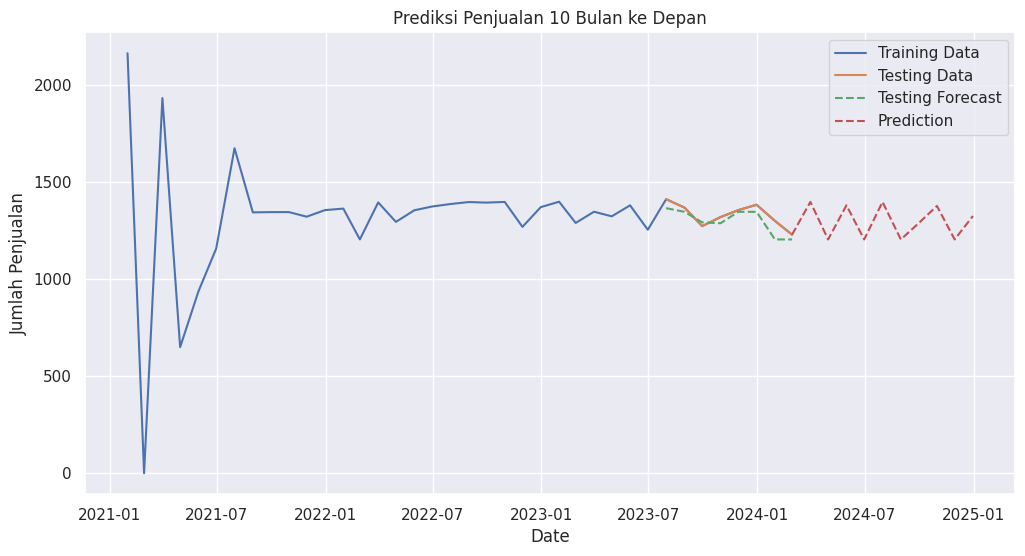

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df_xgb_from_sarimax['revenue'], label='Training Data')
plt.plot(df_sarima_forecast_revenue_fe_drop['Revenue_Test'], label='Testing Data')
plt.plot(df_sarima_forecast_revenue_fe_drop['Revenue_Test_Forecast'], label='Testing Forecast', linestyle='--')
plt.plot(plot_pred['revenue_pred'], label='Prediction', linestyle='--')
plt.title('Prediksi Penjualan 10 Bulan ke Depan')
plt.xlabel('Date')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()

In [ ]:
train_df = train[['revenue']].rename(columns={'revenue': 'Train'})
test_df = df_sarima_forecast_revenue_fe_drop[['Revenue_Test_Forecast']].rename(columns={'Revenue_Test_Forecast': 'Revenue_Test_Forecast'})
forecast = df_pred[['revenue_pred']].rename(columns={'revenue_pred': 'Forecast 10 Bulan'})
combined = pd.concat([train_df, test_df, forecast], axis=0)

combined.loc['2023-06-30', 'Revenue_Test_Forecast'] = a = combined['Train'].loc['2023-06-30']
combined.loc['2024-02-29', 'Forecast 10 Bulan'] = a = combined['Revenue_Test_Forecast'].loc['2024-02-29']

combined

Train  Revenue_Test_Forecast  Forecast 10 Bulan
2021-01-31  2162.54                    NaN                NaN
2021-02-28     0.00                    NaN                NaN
2021-03-31  1931.62                    NaN                NaN
2021-04-30   649.36                    NaN                NaN
2021-05-31   936.82                    NaN                NaN
2021-06-30  1156.99                    NaN                NaN
2021-07-31  1673.32                    NaN                NaN
2021-08-31  1343.17                    NaN                NaN
2021-09-30  1344.55                    NaN                NaN
2021-10-31  1344.61                    NaN                NaN
2021-11-30  1320.99                    NaN                NaN
2021-12-31  1354.93                    NaN                NaN
2022-01-31  1362.61                    NaN                NaN
2022-02-28  1203.87                    NaN                NaN
2022-03-31  1394.42                    NaN                NaN
2022-04-30  1294.17                    NaN                NaN
2022-05-31  1353.88                    NaN                NaN
2022-06-30  1373.35                    NaN                NaN
2022-07-31  1386.07                    NaN                NaN
2022-08-31  1396.40                    NaN                NaN
2022-09-30  1393.47                    NaN                NaN
2022-10-31  1396.98                    NaN                NaN
2022-11-30  1268.56                    NaN                NaN
2022-12-31  1370.29                    NaN                NaN
2023-01-31  1398.06                    NaN                NaN
2023-02-28  1288.76                    NaN                NaN
2023-03-31  1346.59                    NaN                NaN
2023-04-30  1322.82                    NaN                NaN
2023-05-31  1379.46                    NaN                NaN
2023-06-30  1253.84            1253.840000                NaN
2023-07-31      NaN            1364.897949                NaN
2023-08-31      NaN            1346.060303                NaN
2023-09-30      NaN            1291.587158                NaN
2023-10-31      NaN            1287.219727                NaN
2023-11-30      NaN            1346.060303                NaN
2023-12-31      NaN            1346.060303                NaN
2024-01-31      NaN            1203.876587                NaN
2024-02-29      NaN            1203.876587        1203.876587
2024-03-31      NaN                    NaN        1397.034546
2024-04-30      NaN                    NaN        1203.876587
2024-05-31      NaN                    NaN        1379.431152
2024-06-30      NaN                    NaN        1203.876587
2024-07-31      NaN                    NaN        1397.034546
2024-08-31      NaN                    NaN        1203.876587
2024-09-30      NaN                    NaN        1287.219727
2024-10-31      NaN                    NaN        1376.359375
2024-11-30      NaN                    NaN        1203.876587
2024-12-31      NaN                    NaN        1324.569092

In [ ]:
#combined.to_excel('prediksi_penjualan.xlsx', index=True)

## Saran dan Rekomendasi

Hasil forecasting menunjukkan bahwa penjualan yang dilakukan oleh UKMart akan mengalami fluktuatif penjualan dimana naik turunnya penjualan terjadi disetiap bulannya.

**Rekomendasi:** \
* Perusahaan bisa melakukan investasi di bulan penjualan tinggi seperti mengadakan promosi dan kampanye pemasaran untuk memaksimalkan pendapatan.

* Untuk bulan dengan penjualan rendah bisa diadakan promosi buy-one-get-one-free untuk menarik lebih banyak pelanggan. Selain itu,  perusahaan dapat melakukan penghematan biaya operasional yang tidak perlu untuk meningkatkan margin keuntungan meskipun pendapatan menurun.

# **Forecast Persediaan 3 bulan ke depan (biweekly period)**

## by unit

#### SARIMAX

In [ ]:
# Forecasting untuk 3 bulan ke depan (12 minggu atau 6 periode biweekly)
forecast_periods = 6
forecast_sarimax_best = model_sarimax_best_fit.forecast(steps=forecast_periods)

# Buat DataFrame untuk hasil prediksi
forecast_dates = pd.date_range(start=test.index[-1], periods=forecast_periods, freq='2W')
forecast_df_sarimax = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': forecast_sarimax_best})
forecast_df_sarimax.set_index('tanggal', inplace=True)

In [ ]:
forecast_df_sarimax

jumlah permintaan
tanggal                      
2024-03-03         765.940623
2024-03-17         812.097780
2024-03-31         737.503423
2024-04-14         774.175338
2024-04-28         661.533157
2024-05-12         811.396596

#### Plot

In [ ]:
last_row_test = test['jumlah permintaan'].iloc[[-1]].rename('a')

plot_pred = pd.concat([forecast_df_sarimax, last_row_test], axis = 1)
plot_pred['jumlah permintaan'].loc['2024-03-03']=plot_pred['a'].loc['2024-03-03']
plot_pred['jumlah permintaan']

tanggal
2024-03-03    603.289006
2024-03-17    812.097780
2024-03-31    737.503423
2024-04-14    774.175338
2024-04-28    661.533157
2024-05-12    811.396596
Freq: 2W-SUN, Name: jumlah permintaan, dtype: float64

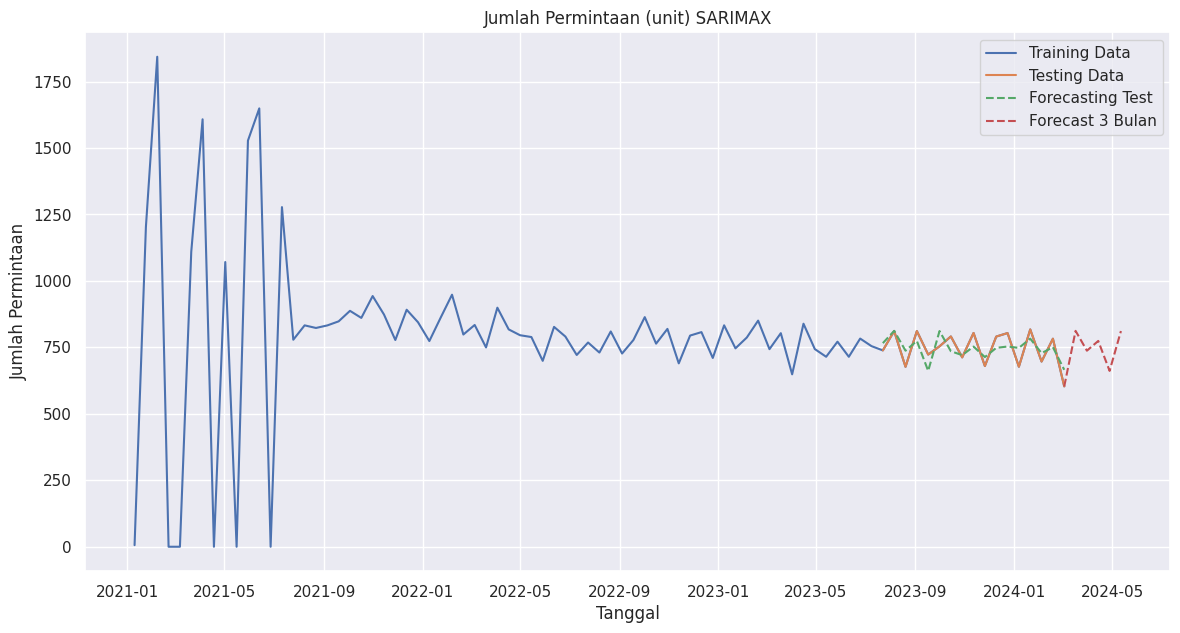

In [ ]:
# Plot data training, testing, dan forecast
plt.figure(figsize=(14, 7))
plt.plot(df['jumlah permintaan'], label='Training Data')
plt.plot(test.index, test['jumlah permintaan'], label='Testing Data')
plt.plot(forecast_df_sarimax_best.index, forecast_df_sarimax_best['jumlah permintaan'], label='Forecasting Test', linestyle='--')
plt.plot(plot_pred['jumlah permintaan'], label='Forecast 3 Bulan', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Permintaan')
plt.title('Jumlah Permintaan (unit) SARIMAX')
plt.legend()
plt.show()

In [ ]:
forecast_3_bulan = forecast_df_sarimax
forecast_3_bulan

jumlah permintaan
tanggal                      
2024-03-03         765.940623
2024-03-17         812.097780
2024-03-31         737.503423
2024-04-14         774.175338
2024-04-28         661.533157
2024-05-12         811.396596

In [ ]:
train_renamed = train[['jumlah permintaan']].rename(columns={'jumlah permintaan': 'Train'})
forecast_3_bulan = forecast_3_bulan[['jumlah permintaan']].rename(columns={'jumlah permintaan': 'Forecast 3 Bulan'})
prediksi_3_bulan = pd.concat([train_renamed, forecast_df_sarima_best, forecast_3_bulan], axis=0)
prediksi_3_bulan

Train  Actual  Forecast  Forecast 3 Bulan
tanggal                                                    
2021-01-10     5.937500     NaN       NaN               NaN
2021-01-24  1203.097970     NaN       NaN               NaN
2021-02-07  1843.250278     NaN       NaN               NaN
2021-02-21     0.000000     NaN       NaN               NaN
2021-03-07     0.000000     NaN       NaN               NaN
...                 ...     ...       ...               ...
2024-03-17          NaN     NaN       NaN        812.097780
2024-03-31          NaN     NaN       NaN        737.503423
2024-04-14          NaN     NaN       NaN        774.175338
2024-04-28          NaN     NaN       NaN        661.533157
2024-05-12          NaN     NaN       NaN        811.396596

[89 rows x 4 columns]

In [ ]:
# prediksi_3_bulan.to_excel('prediksi_3_bulan.xlsx', index=True)

### Saran dan Rekomendasi

Hasil forecasting menunjukan bahwa permintaan menunjukkan pola musiman dengan fluktuasi mingguan yang cukup konsisten, meskipun terdapat sedikit peningkatan menuju Mei 2024.

Jika dilihat lebih detail menunjukkan pola di mana permintaan meningkat pada dua minggu pertama dan kemudian menurun pada dua minggu terakhir.

**Rekomendasi:** \
* Tingkatkan stok produk bakery di awal bulan untuk mengantisipasi peningkatan permintaan pada dua minggu pertama.
* Kurangi stok menjelang akhir bulan untuk menghindari overstocking ketika permintaan menurun.


## by kg

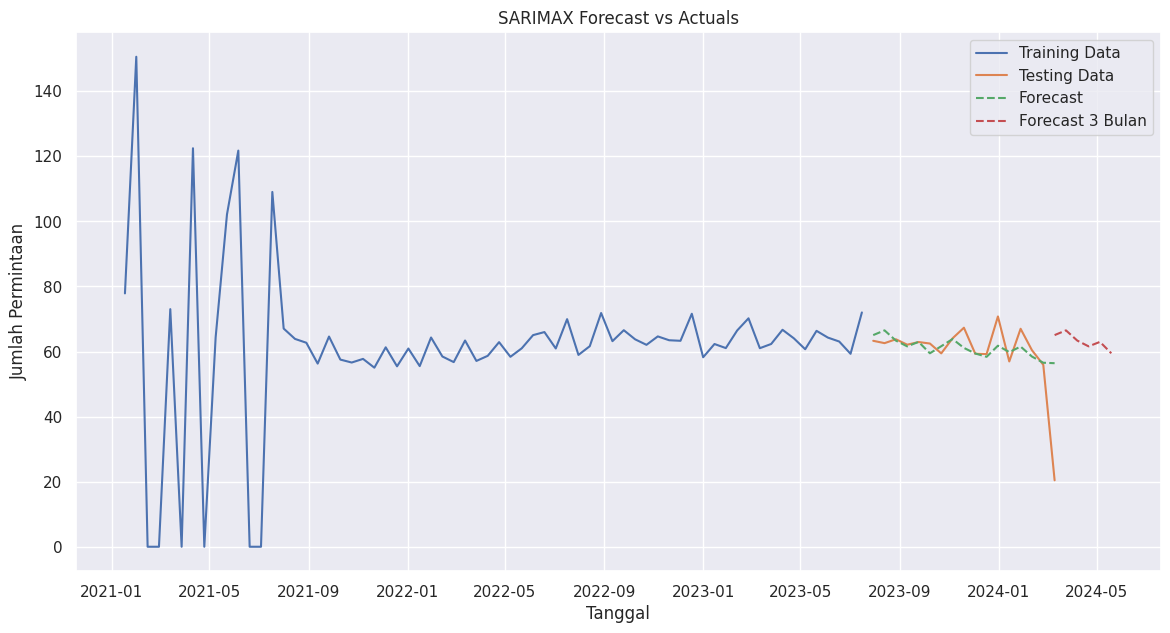

In [ ]:
# Forecasting untuk 3 bulan ke depan (12 minggu atau 6 periode biweekly)
forecast_periods = 6
forecast_sarimax_best = model_sarimax_best_fit.forecast(steps=forecast_periods)

# Buat DataFrame untuk hasil prediksi
forecast_dates = pd.date_range(start=test.index[-1], periods=forecast_periods, freq='2W')
forecast_3_bulan = pd.DataFrame({'tanggal': forecast_dates, 'jumlah permintaan': forecast_sarimax_best})
forecast_3_bulan.set_index('tanggal', inplace=True)

# Plot data training, testing, dan forecast
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['jumlah permintaan'], label='Training Data')
plt.plot(test.index, test['jumlah permintaan'], label='Testing Data')
plt.plot(forecast_df_sarimax_best.index, forecast_df_sarimax_best['jumlah permintaan'], label='Forecast', linestyle='--')
plt.plot(forecast_3_bulan.index, forecast_3_bulan['jumlah permintaan'], label='Forecast 3 Bulan', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Permintaan')
plt.title('SARIMAX Forecast vs Actuals')
plt.legend()
plt.show()

### SARIMAX

In [ ]:
# Best model SARIMAX((1, 2, 2), (1, 1, 1, 6))
# Buat model SARIMAX
model_pred = SARIMAX(d5_kg['jumlah permintaan'], order=(1, 2, 2), seasonal_order=(1, 1, 1, 6))
model_pred_fit = model_pred.fit()

# Lihat ringkasan model
print(model_pred_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                   jumlah permintaan   No. Observations:                   83
Model:             SARIMAX(1, 2, 2)x(1, 1, [1], 6)   Log Likelihood                -354.928
Date:                             Fri, 07 Jun 2024   AIC                            721.857
Time:                                     06:34:03   BIC                            735.762
Sample:                                 01-17-2021   HQIC                           727.409
                                      - 03-10-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1281      0.088     -1.458      0.145      -0.300       0.044
ma.L1         -1.9843     2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Forecasting untuk 3 bulan ke depan (12 minggu atau 6 periode biweekly)
forecast_periods = 6
forecast_sarimax_best = model_pred_fit.forecast(steps=forecast_periods)

# Buat DataFrame untuk hasil prediksi
forecast_dates = pd.date_range(start=test.index[-1], periods=forecast_periods+1, freq='2W')  # Tambah 1 untuk menyertakan data tes terakhir
forecast_df_sarimax = pd.DataFrame({'tanggal': forecast_dates[1:], 'jumlah permintaan': forecast_sarimax_best})
forecast_df_sarimax.set_index('tanggal', inplace=True)
forecast_df_sarimax

jumlah permintaan
tanggal                      
2024-03-24          62.208614
2024-04-07          54.641437
2024-04-21          56.588940
2024-05-05          56.987805
2024-05-19          52.331613
2024-06-02          54.326931

In [ ]:
test.iloc[-1]

jumlah permintaan    20.424901
Period Number               83
Period Label         Period-83
Name: 2024-03-10 00:00:00, dtype: object

### Plot

In [ ]:
last_row_test = test['jumlah permintaan'].iloc[[-1]].rename('a')
plot_pred = pd.concat([forecast_df_sarimax, last_row_test], axis = 1)
plot_pred.loc['2024-03-10'] = plot_pred['a'].iloc[0]
plot_pred['jumlah permintaan']

tanggal
2024-03-10    20.424901
2024-03-24    62.208614
2024-04-07    54.641437
2024-04-21    56.588940
2024-05-05    56.987805
2024-05-19    52.331613
2024-06-02    54.326931
Freq: 2W-SUN, Name: jumlah permintaan, dtype: float64

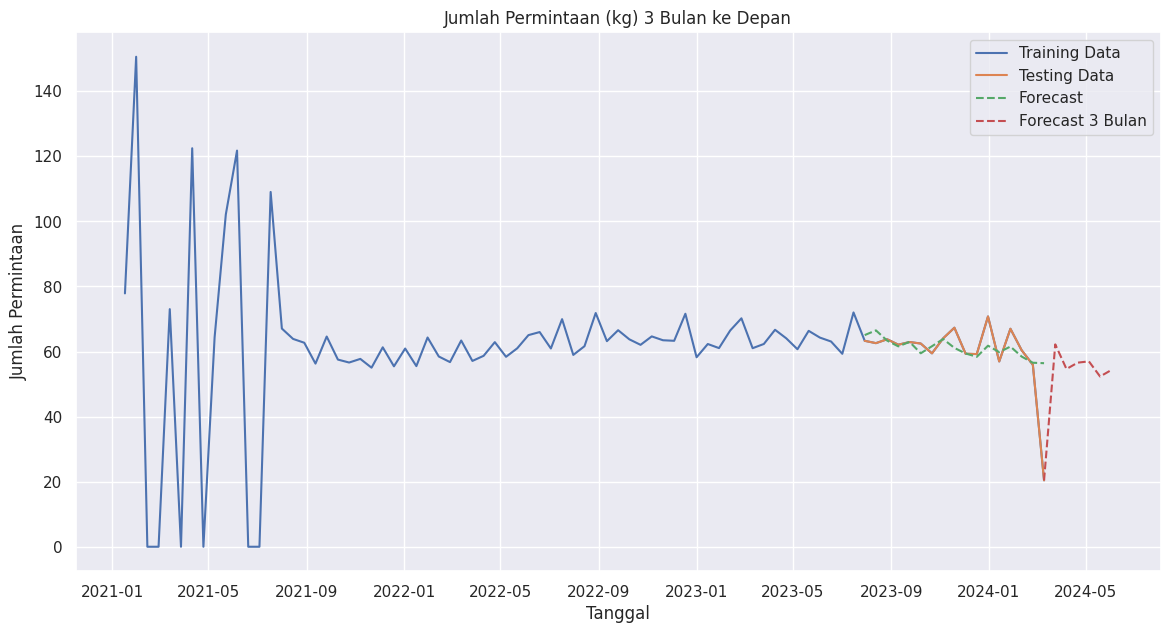

In [ ]:
# Plot data original, testing, dan forecast
plt.figure(figsize=(14, 7))
plt.plot(d5_kg.index, d5_kg['jumlah permintaan'], label='Training Data')
plt.plot(test.index, test['jumlah permintaan'], label='Testing Data')
plt.plot(forecast_df_sarimax_best.index, forecast_df_sarimax_best['jumlah permintaan'], label='Forecast', linestyle='--')
plt.plot(plot_pred.index, plot_pred['jumlah permintaan'], label='Forecast 3 Bulan', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Permintaan')
plt.title('Jumlah Permintaan (kg) 3 Bulan ke Depan')
plt.legend()
plt.show()


In [ ]:
train_df = train[['jumlah permintaan']].rename(columns={'jumlah permintaan': 'Train'})
test_df = test[['jumlah permintaan']].rename(columns={'jumlah permintaan': 'Actual'})
forecast = forecast_df_sarimax_best[['jumlah permintaan']].rename(columns={'jumlah permintaan': 'Forecast'})
forecast_3_bulan = plot_pred[['jumlah permintaan']].rename(columns={'jumlah permintaan': 'Forecast 3 Bulan'})
combined = pd.concat([train_df, test_df, forecast, forecast_3_bulan], axis=0)

combined.loc['2023-07-16', 'Actual'] = a = combined['Train'].loc['2023-07-16']
combined.loc['2024-03-10', 'Forecast 3 Bulan'] = a = combined['Forecast'].loc['2024-03-10']

combined

Train  Actual  Forecast  Forecast 3 Bulan
tanggal                                                   
2021-01-17   77.880769     NaN       NaN               NaN
2021-01-31  150.623997     NaN       NaN               NaN
2021-02-14    0.000000     NaN       NaN               NaN
2021-02-28    0.000000     NaN       NaN               NaN
2021-03-14   73.039877     NaN       NaN               NaN
...                ...     ...       ...               ...
2024-04-07         NaN     NaN       NaN         54.641437
2024-04-21         NaN     NaN       NaN         56.588940
2024-05-05         NaN     NaN       NaN         56.987805
2024-05-19         NaN     NaN       NaN         52.331613
2024-06-02         NaN     NaN       NaN         54.326931

[107 rows x 4 columns]

In [ ]:
combined.to_excel('prediksi_permintaan_kg.xlsx', index=True)

### Saran dan Rekomendasi

Hasil forecasting menunjukan bahwa Permintaan cenderung mengalami fluktuasi yang signifikan pada setiap dua minggu.

Jika dilihat lebih detail menunjukkan pola menurun pada  awal bulan dan meningkat pada  pertengahan bulan.

**Rekomendasi:** \
* Tingkatkan stok produk bakery di awal bulan untuk mengantisipasi peningkatan permintaan pada dua minggu pertama.
* Kurangi stok menjelang akhir bulan untuk menghindari overstocking ketika permintaan menurun.

# Rekomendasi

## Bisnis

1. Supermarket dapat mengalokasikan  anggarannya secara optimal dengan melakukan investasi dibulan penjualan tinggi seperti mengadakan mengadakan promosi dan kampanye pemasaran serta melakukan penghematan biaya operasional di bulan penjualan rendah
2. Supermarket dapat melakukan pengoptimalan manajemen persedian dengan menggunakan data forecasting untuk mengatur jumlah persediaan secara efisien berdasarkan pola permintaan yang diprediksi
3. Untuk produk-produk yang best seller, supermarket bisa melakukan cross selling maupun up selling. Selain itu, tempatkan produk best seller di lokasi yang strategis dan mudah dijangkau oleh konsumen.  

## Modeling

1. Melakukan feature engineering lebih banyak dan mengimplementasikannya pada model sebagai variabel input.
2. Melakukan eksplorasi model baseline lebih banyak untuk menghasilkan komparasi metric evaluasi yang lebih baik.